### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We'll also use `tabulate` library, make sure it's present:
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

# Make sure we can see all columns for comprehensive review
pd.options.display.max_columns = 40

# Set Seaborn theme
sns.set_theme(style="darkgrid")

In [3]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
2             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
3             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
4             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       NaN                  4~8              1~3   
1  never       never       NaN                  4~8              1~3   
2  never       never       NaN                  4~8              1~3   
3  never       never       NaN                  4~8              1~3   
4  never       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Y  
0              1  1  
1              1  0  
2              1  1  
3              1  0  
4              1  0

2. Investigate the dataset for missing or problematic data.

In [4]:
# make a copy of the original data set for future comparison purposes,
# keeping `data` as the cleansed/transformed set
data_original = data.copy()

# Understand the size of the dataset
shape_original = data_original.shape
shape_original

(12684, 26)

---
> ##### 2.1. Evaluate the dataset for duplicates
---

In [5]:
# What percentage of the dataset has duplicate data, if any?
# If insignificant, may consider dropping them.
duplicated = data.duplicated().mean() * 100
print("Percentage of duplicated observations is: " + str(round(duplicated, 3)) + "%")

Percentage of duplicated observations is: 0.583%


In [6]:
# From above duplicates review, less than 1% of the rows are duplicates, drop duplicates
data = data.drop_duplicates()
shape_cleaned = data.shape

print("Dropped " + str(shape_original[0] - shape_cleaned[0]) + " duplicated observations.") 

Dropped 74 duplicated observations.


---
> ##### 2.2. Evaluate structural composition of dataset for errors/corrections
---

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

In [8]:
# Pet Peeve: Correct a mispelling `passenger`
data = data.rename(columns={'passanger':'passenger'})

In [9]:
# Review if `time` should be re-casted to integers
data["time"].value_counts()

# It may be interesting to translate into a 24-hour integer representation for numerical review, 
# though likely best to keep it as categorical


6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: time, dtype: int64

In [10]:
# Review if `expiration` should be re-casted to integers
data["expiration"].value_counts()

# Decision: Leave it as categorical

1d    7031
2h    5579
Name: expiration, dtype: int64

---
> ###### We'll need to transform some data features into cohorts or more plottable summaries, let's do that now
---

In [11]:
### Corhorting Preferences: group values into two cohorts to use in a later question:
    # cohort 1: 3 or fewer (includes: ["never", "less1", "1~3"])
    # cohort 2: greater than 3 (includes: ["4~8", "gt8"])



# Apply a lambda function to assign cohort values ["> 3" or "<= 3"] based on list matches for the following
# "preference" features:
#   * Bar
#   * CoffeeHouse
#   * CarryAway
#   * RestaurantLessThan20
#   * Restaurant20To50

def evaluateCohorts (pref):
    '''
    Return the cohort/grouping value based on the value passed in
    If value is NaN, return NaN
    '''
    if pref is np.nan:
        # If no value is passed in, return None
        return np.nan
    else:
        # We'll create a list of one cohort set, and imply the other
        cohort_frequently = ["4~8", "gt8"]

        return "> 3" if pref in cohort_frequently else "<= 3"

    
data.insert(20, "Restaurant20To50_Cohort", data["Restaurant20To50"].apply(evaluateCohorts))
data.insert(19, "RestaurantLessThan20_Cohort", data["RestaurantLessThan20"].apply(evaluateCohorts))
data.insert(18, "CarryAway_Cohort", data["CarryAway"].apply(evaluateCohorts))
data.insert(17, "CoffeeHouse_Cohort", data["CoffeeHouse"].apply(evaluateCohorts))
data.insert(16, "Bar_Cohort", data["Bar"].apply(evaluateCohorts))
    
data.sample(20)

destination  passenger weather  temperature  time  \
4303              Work      Alone   Sunny           80   7AM   
10500             Home      Alone   Snowy           30  10PM   
9448   No Urgent Place  Friend(s)   Sunny           30  10PM   
9284              Home      Alone   Sunny           80  10PM   
3283   No Urgent Place    Partner   Sunny           80   6PM   
6668   No Urgent Place      Alone   Sunny           80  10AM   
9726              Work      Alone   Sunny           80   7AM   
9531              Work      Alone   Snowy           30   7AM   
5616              Home      Alone   Sunny           80   6PM   
8575              Home      Alone   Snowy           30   6PM   
8731              Home    Partner   Sunny           80   6PM   
4064   No Urgent Place      Alone   Sunny           80  10AM   
5271              Home      Alone   Sunny           80   6PM   
10486  No Urgent Place      Alone   Sunny           80  10AM   
3874   No Urgent Place    Partner   Sunny           80  10AM   
1112   No Urgent Place     Kid(s)   Sunny           55   6PM   
12424             Home     Kid(s)   Sunny           55  10PM   
11558             Home     Kid(s)   Sunny           55  10PM   
622    No Urgent Place     Kid(s)   Sunny           55   2PM   
214               Work      Alone   Sunny           55   7AM   

                      coupon expiration  gender      age      maritalStatus  \
4303   Carry out & Take away         1d    Male       21  Unmarried partner   
10500        Restaurant(<20)         2h    Male  below21             Single   
9448   Carry out & Take away         1d    Male   50plus  Unmarried partner   
9284       Restaurant(20-50)         1d  Female       26  Unmarried partner   
3283         Restaurant(<20)         2h  Female       31    Married partner   
6668            Coffee House         2h    Male       21             Single   
9726            Coffee House         1d  Female       46             Single   
9531   Carry out & Take away         1d    Male       31  Unmarried partner   
5616            Coffee House         1d    Male       26             Single   
8575            Coffee House         1d  Female       21    Married partner   
8731            Coffee House         1d  Female       31    Married partner   
4064                     Bar         1d  Female       36    Married partner   
5271            Coffee House         1d    Male   50plus    Married partner   
10486           Coffee House         2h    Male  below21             Single   
3874       Restaurant(20-50)         1d  Female       26    Married partner   
1112            Coffee House         2h  Female       41    Married partner   
12424      Restaurant(20-50)         1d    Male       31    Married partner   
11558      Restaurant(20-50)         2h    Male       31    Married partner   
622          Restaurant(<20)         1d  Female       21    Married partner   
214             Coffee House         2h    Male       21             Single   

       has_children                               education  \
4303              0                        Bachelors degree   
10500             0                Some college - no degree   
9448              0                    High School Graduate   
9284              0                    High School Graduate   
3283              0                Some college - no degree   
6668              0                        Bachelors degree   
9726              0                Some college - no degree   
9531              0                        Bachelors degree   
5616              0                       Associates degree   
8575              1                       Associates degree   
8731              0                Some college - no degree   
4064              1                Some college - no degree   
5271              1  Graduate degree (Masters or Doctorate)   
10486             0                Some college - no degree   
3874              0                        Bachelors degree  

---
> ###### The distance (`toCoupon_GEQ5min`, `toCoupon_GEQ15min`, `toCoupon_GEQ25min`) and direction (`direction_same`, `direction_opp`) fields could potentially be more plottable/relevant if we condense them all into a single field representing both distance and direction
---

In [12]:
# Create composite categorical features representing the following cohorts:
# * Cohort: direction, distance (`distanceDirection`)
# * Cohort: direction, distance, time of day (`distanceDirectionTime`)
# * Cohort: direction, distance, time of day, expiration time (`distanceDirectionTimeExpiration`)
# * Cohort: direction, distance, time of day, passenger (`distanceDirectionTimePassenger`)
# * Cohort: direction, distance, time of day, passengers, coupon (`distanceDirectionTimePassengerCoupon`)
# * Cohort: direction, distance, time of day, passengers, coupon, expiration time (`distanceDirectionTimePassengerCouponExpiration`)

# Establish mapping definitions
distances = {1:"5min", 2:"15min", 3:"25min"}
directions = ["behind", "ahead"]

# Create the first new column that will map the distance by taking a sum of the distance indicator columns 
# and mapping against `distances`
data.insert(30, "distanceDirection", data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].sum(axis=1).map(distances))

# Append the direction to the new composite column based on direction indicated
# Reminder, we can use just one of the direction fields based on univariate findings below
data["distanceDirection"] = data["distanceDirection"] + " " + data["direction_same"].apply(lambda x: directions[x])

# From the `distanceDirection` column, create a new column (appends `time`)
data["distanceDirectionTime"] = data["distanceDirection"] + " " + data["time"]

# From the `distanceDirectionTime` column, create a new column (appends `expiration`)
data["distanceDirectionTimeExpiration"] = data["distanceDirectionTime"] + " " + data["expiration"]

# From the `distanceDirectionTime` column, create a new column (appends `passenger`)
data["distanceDirectionTimePassenger"] = data["distanceDirectionTime"] + " " + data["passenger"]

# From the `distanceDirectionTimePassenger` column, create a new column (appends `passenger`)
data["distanceDirectionTimePassengerCoupon"] = data["distanceDirectionTimePassenger"] + " " + data["coupon"]

# From the `distanceDirectionTimePassengerCoupon` column, create a new column (appends `expiration`)
data["distanceDirectionTimePassengerCouponExpiration"] = data["distanceDirectionTimePassengerCoupon"] + " " + data["expiration"]

data.head()

destination  passenger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
2             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
3             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
4             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   

     Bar Bar_Cohort CoffeeHouse CoffeeHouse_Cohort CarryAway CarryAway_Cohort  \
0  never       <= 3       never               <= 3       NaN              NaN   
1  never       <= 3       never               <= 3       NaN              NaN   
2  never       <= 3       never               <= 3       NaN              NaN   
3  never       <= 3       never               <= 3       NaN              NaN   
4  never       <= 3       never               <= 3       NaN              NaN   

  RestaurantLessThan20 RestaurantLessThan20_Cohort Restaurant20To50  \
0                  4~8                         > 3              1~3   
1                  4~8                         > 3              1~3   
2                  4~8                         > 3              1~3   
3                  4~8                         > 3              1~3   
4                  4~8                         > 3              1~3   

  Restaurant20To50_Cohort  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0                    <= 3                 1                  0   
1                    <= 3                 1                  0   
2                    <= 3                 1                  1   
3                    <= 3                 1                  1   
4                    <= 3                 1                  1   

   toCoupon_GEQ25min  direction_same  direction_opp distanceDirection  Y  \
0                  0               0              1       5min behind  1   
1                  0               0              1       5min behind  0   
2                  0               0              1      15min behind  1   
3                  0               0              1      15min behind  0   
4                  0               0              1      15min behind  0   

  distanceDirectionTime distanceDirectionTimeExpiration  \
0       5min behind 2PM              5min behind 2PM 1d   
1      5min behind 10AM             5min behind 10AM 2h   
2     15min behind 10AM            15min behind 10AM 2h   
3      15min behind 2PM             15min behind 2PM 2h   
4      15min behind 2PM             15min behind 2PM 1d   

  distanceDirectionTimePassenger  \
0          5min behind 2PM Alone   
1     5min behind 10AM Friend(s)   
2    15min behind 10AM Friend(s)   
3     15min behind 2PM Friend(s)   
4     15min behind 2PM Friend(s)   

                distanceDirectionTimePassengerCoupon  \
0              5min behind 2PM Alone Restaurant(<20)   
1            5min behind 10AM Friend(s) Coffee House   
2  15min behind 10AM Friend(s) Carry out & Take away   
3            15min behind 2PM Friend(s) Coffee House   
4            15min behind 2PM Friend(s) Coffee House   

      distanceDirectionTimePassengerCouponExpiration  
0           5min b

---
> ##### 2.3. Evaluate dataset for missing data
---

In [13]:
# Review data features missing data for modeling impact
# Values are in percentages (%)
missing_data = (data.isna().mean()*100).sort_values(ascending=False)
missing_data


car                                               99.143537
CoffeeHouse_Cohort                                 1.720856
CoffeeHouse                                        1.720856
Restaurant20To50                                   1.498810
Restaurant20To50_Cohort                            1.498810
CarryAway_Cohort                                   1.189532
CarryAway                                          1.189532
RestaurantLessThan20_Cohort                        1.022998
RestaurantLessThan20                               1.022998
Bar                                                0.848533
Bar_Cohort                                         0.848533
direction_same                                     0.000000
toCoupon_GEQ25min                                  0.000000
direction_opp                                      0.000000
toCoupon_GEQ5min                                   0.000000
distanceDirection                                  0.000000
Y                                       

Text(0.5, 0, 'Data Features Within Dataset')

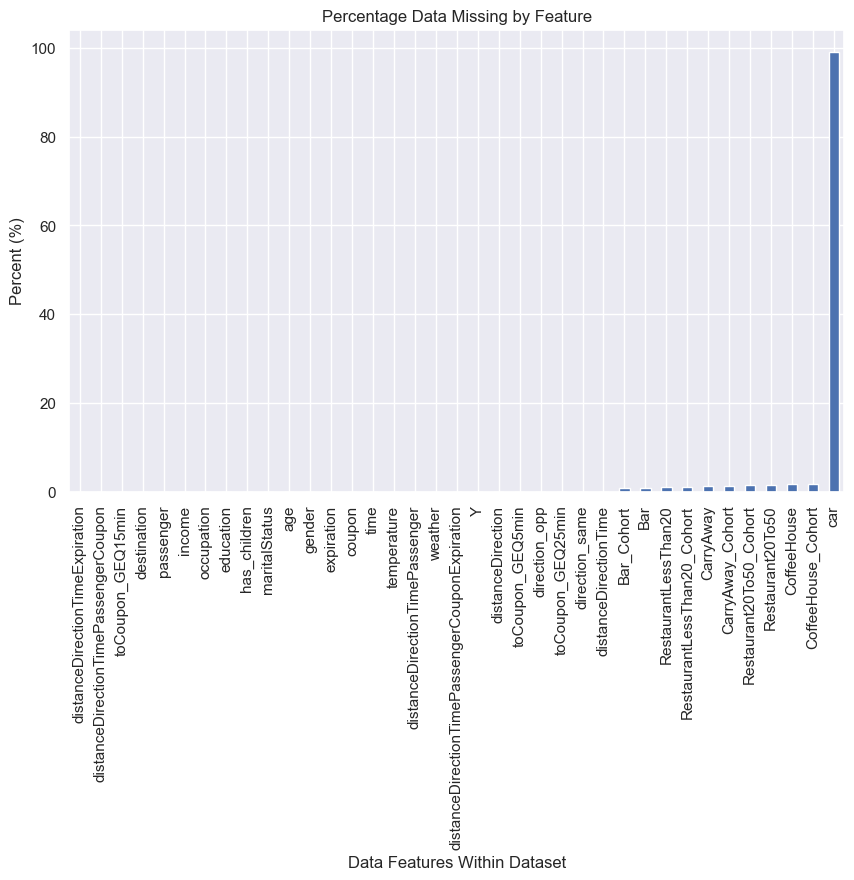

In [14]:
# Let's visualize missing data across any data feature to understand quantitatively which may require additional review
plt.figure(figsize=(10,6))
missing_data.sort_values().plot(kind="bar", title="Percentage Data Missing by Feature")
plt.ylabel("Percent (%)")
plt.xlabel("Data Features Within Dataset")


Text(117.24999999999999, 0.5, 'Observation Number')

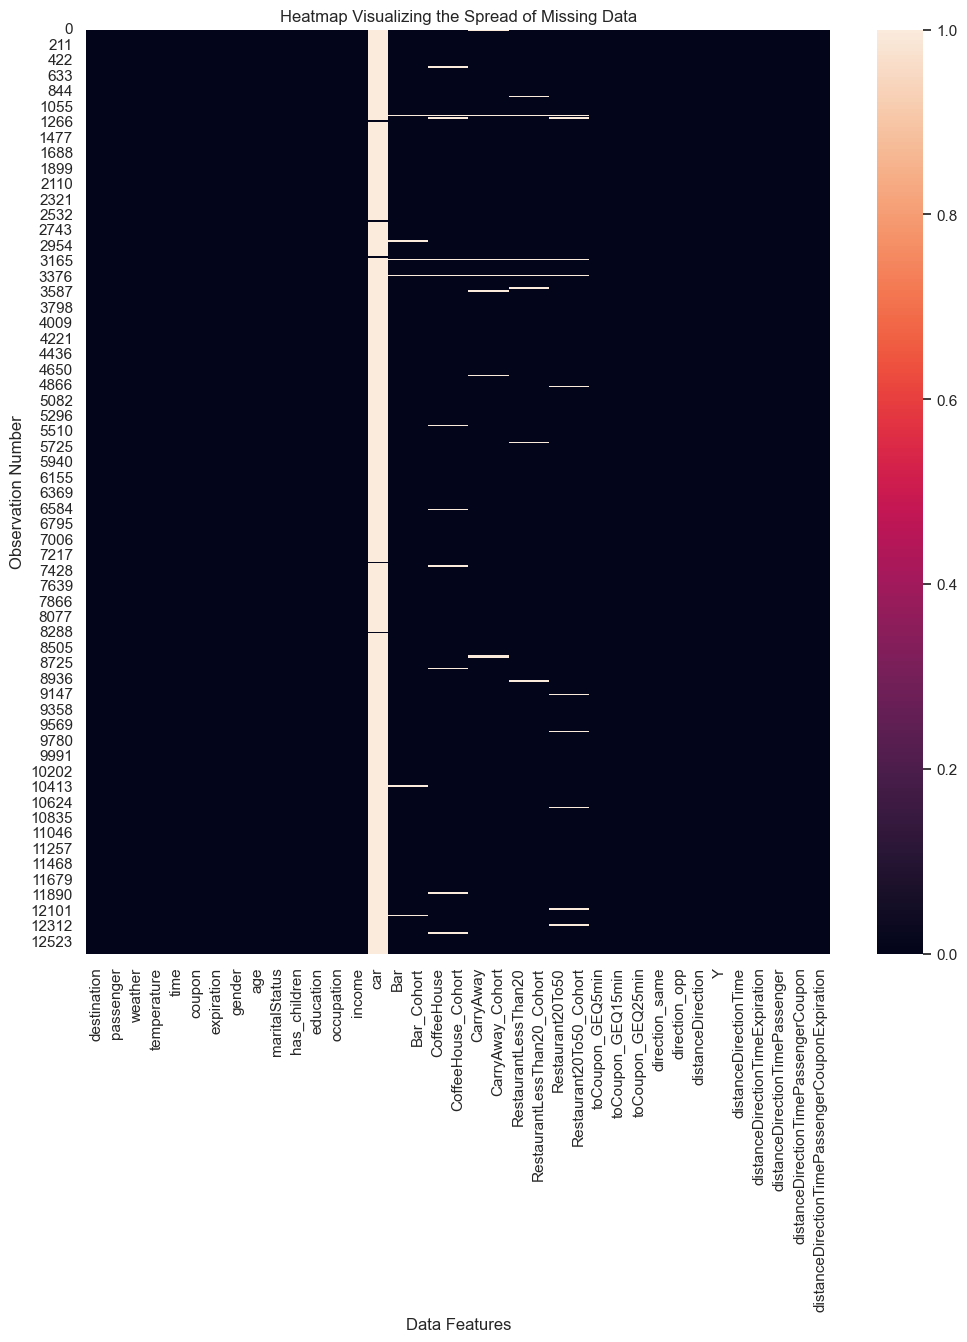

In [15]:
# Let's visually evaluate the missing data across any data feature to understand distribution, 
# for any additional insights
plt.figure(figsize=(12,12))
sns.heatmap(data.isna()).set_title("Heatmap Visualizing the Spread of Missing Data")
plt.xlabel("Data Features")
plt.ylabel("Observation Number")


---
> ##### Insights/Observations: Missing Data 
From the above review of **_percentage data missing by feature_** (above), the following is observed:
> * `car` feature is largely missing (> 99%), and will either need to be imputed or removed from consideration. It may be valuable to drop the column or exclude it if determined to drop NaNs from other features missing data, otherwise we'd drop over 99% of our dataset as a result.
> * `CoffeeHouse`, `Restaurant20to50`, `CarryAway`, `RestaurantLessThan20`, and `Bar` quantitatively have less than 2% missing data and a seemingly uninteresting distribution; therefore we can either keep but ignore the missing data, or drop incomplete records.
---

---
> ##### 2.4. Evaluate and plot each data feature with a context of coupon acceptance  (Bivariate analysis)
---

In [16]:
# Add some runtime configurations (RC) to suppress accepted warnings
plt.rcParams['figure.max_open_warning'] = 50


/────────────────────────────────────────  Feature: DESTINATION  ────────────────────────────────────────/

|    | Values for "destination"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  1 | No Urgent Place            |       3969 |       2297 |            6266 |                    63 |
|  0 | Home                       |       1635 |       1595 |            3230 |                    51 |
|  2 | Work                       |       1553 |       1561 |            3114 |                    50 |


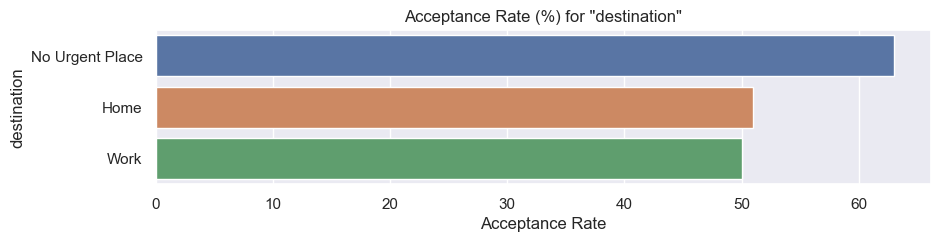

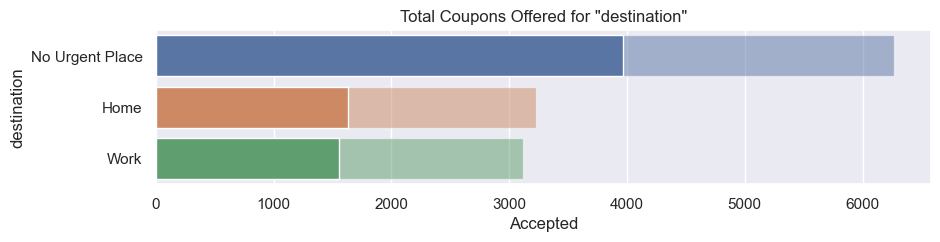


/────────────────────────────────────────  Feature: PASSENGER  ────────────────────────────────────────/

|    | Values for "passenger"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------+------------+------------+-----------------+-----------------------|
|  1 | Friend(s)                |       2216 |       1076 |            3292 |                    67 |
|  3 | Partner                  |        635 |        434 |            1069 |                    59 |
|  0 | Alone                    |       3801 |       3447 |            7248 |                    52 |
|  2 | Kid(s)                   |        505 |        496 |            1001 |                    50 |


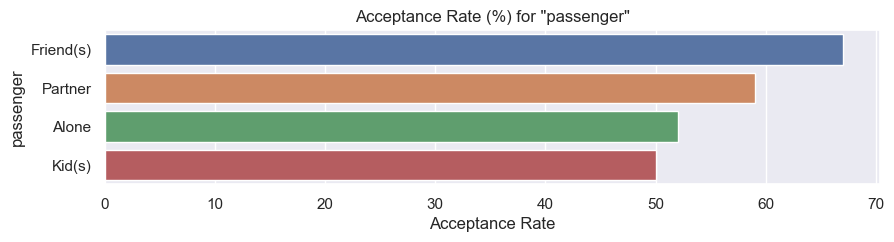

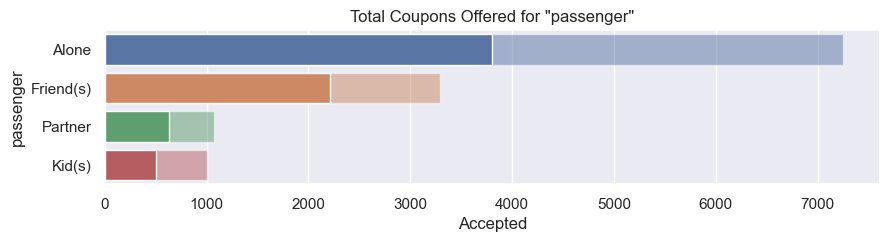


/────────────────────────────────────────  Feature: WEATHER  ────────────────────────────────────────/

|    | Values for "weather"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------+------------+------------+-----------------+-----------------------|
|  2 | Sunny                  |       5941 |       4070 |           10011 |                    59 |
|  1 | Snowy                  |        659 |        738 |            1397 |                    47 |
|  0 | Rainy                  |        557 |        645 |            1202 |                    46 |


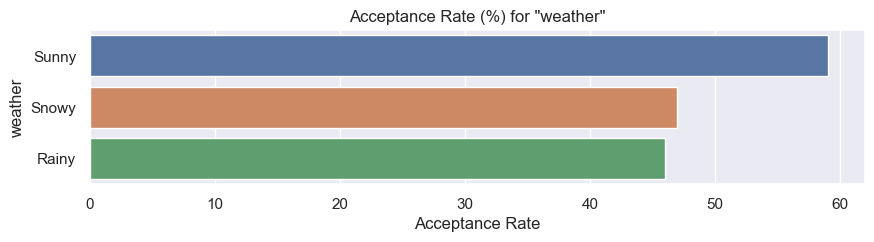

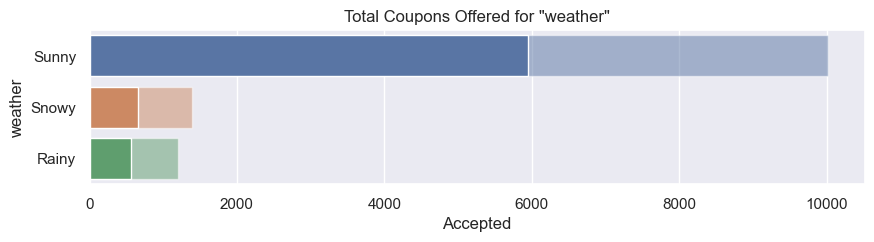


/────────────────────────────────────────  Feature: TEMPERATURE  ────────────────────────────────────────/

|    |   Values for "temperature" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  2 |                         80 |       3876 |       2599 |            6475 |                    60 |
|  1 |                         55 |       2056 |       1774 |            3830 |                    54 |
|  0 |                         30 |       1225 |       1080 |            2305 |                    53 |


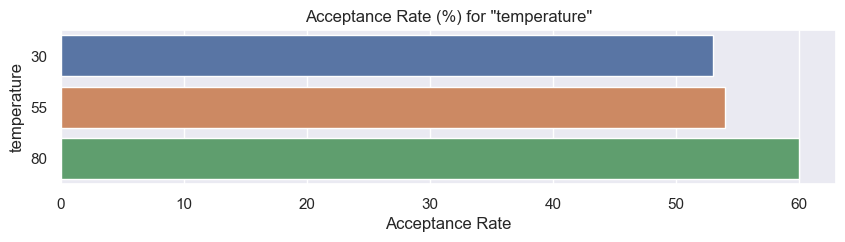

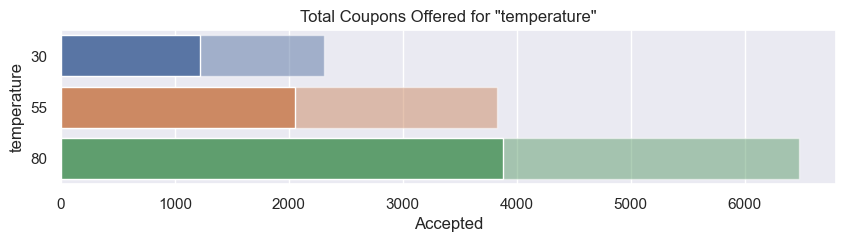


/────────────────────────────────────────  Feature: TIME  ────────────────────────────────────────/

|    | Values for "time"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------+------------+------------+-----------------+-----------------------|
|  2 | 2PM                 |       1327 |        679 |            2006 |                    66 |
|  0 | 10AM                |       1380 |        891 |            2271 |                    61 |
|  3 | 6PM                 |       1881 |       1339 |            3220 |                    58 |
|  1 | 10PM                |       1016 |        983 |            1999 |                    51 |
|  4 | 7AM                 |       1553 |       1561 |            3114 |                    50 |


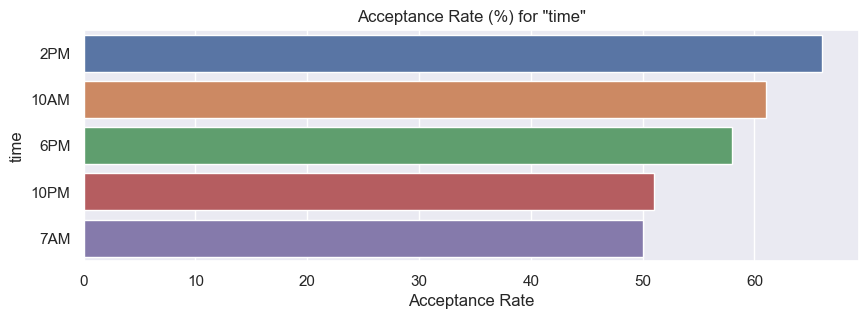

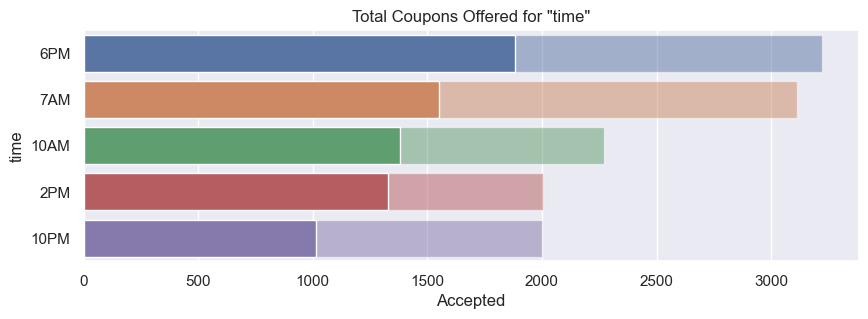


/────────────────────────────────────────  Feature: COUPON  ────────────────────────────────────────/

|    | Values for "coupon"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  1 | Carry out & Take away |       1720 |        624 |            2344 |                    73 |
|  4 | Restaurant(<20)       |       1967 |        812 |            2779 |                    71 |
|  2 | Coffee House          |       1989 |       2000 |            3989 |                    50 |
|  3 | Restaurant(20-50)     |        657 |        831 |            1488 |                    44 |
|  0 | Bar                   |        824 |       1186 |            2010 |                    41 |


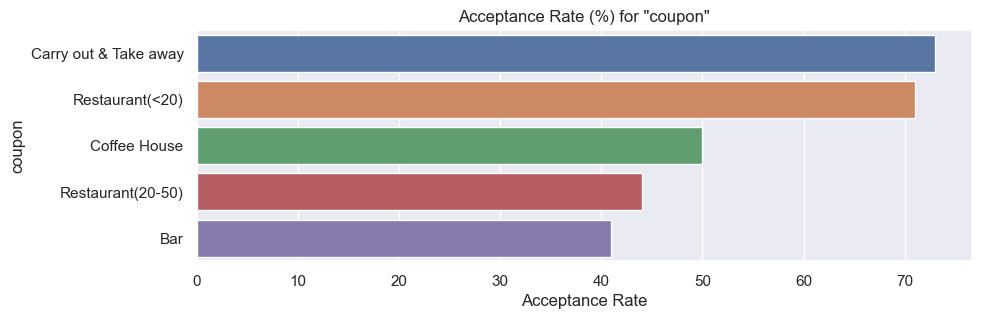

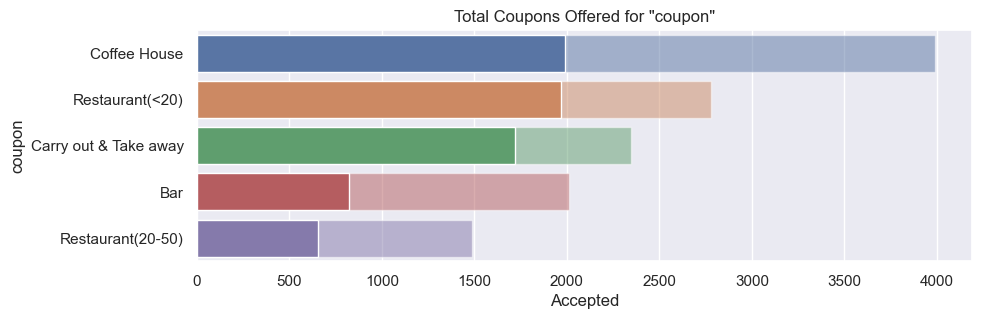


/────────────────────────────────────────  Feature: EXPIRATION  ────────────────────────────────────────/

|    | Values for "expiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------+------------+------------+-----------------+-----------------------|
|  0 | 1d                        |       4390 |       2641 |            7031 |                    62 |
|  1 | 2h                        |       2767 |       2812 |            5579 |                    50 |


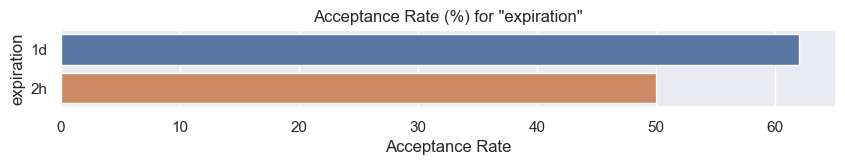

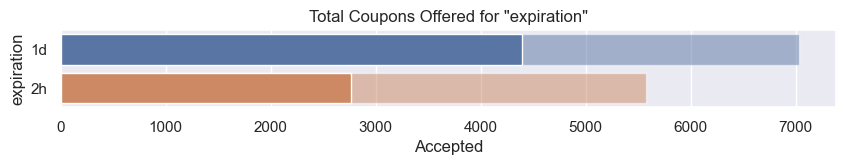


/────────────────────────────────────────  Feature: GENDER  ────────────────────────────────────────/

|    | Values for "gender"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  1 | Male                  |       3622 |       2519 |            6141 |                    59 |
|  0 | Female                |       3535 |       2934 |            6469 |                    55 |


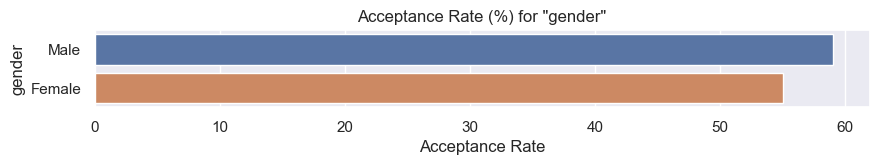


/────────────────────────────────────────  Feature: AGE  ────────────────────────────────────────/

|    | Values for "age"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------+------------+------------+-----------------+-----------------------|
|  7 | below21            |        344 |        200 |             544 |                    63 |
|  0 | 21                 |       1579 |       1063 |            2642 |                    60 |
|  1 | 26                 |       1517 |       1031 |            2548 |                    60 |
|  4 | 41                 |        623 |        466 |            1089 |                    57 |
|  5 | 46                 |        384 |        286 |             670 |                    57 |
|  2 | 31                 |       1102 |        917 |            2019 |                    55 |
|  3 | 36                 |        705 |        612 |            1317 |                    54 |
|  6 | 50plus             |        

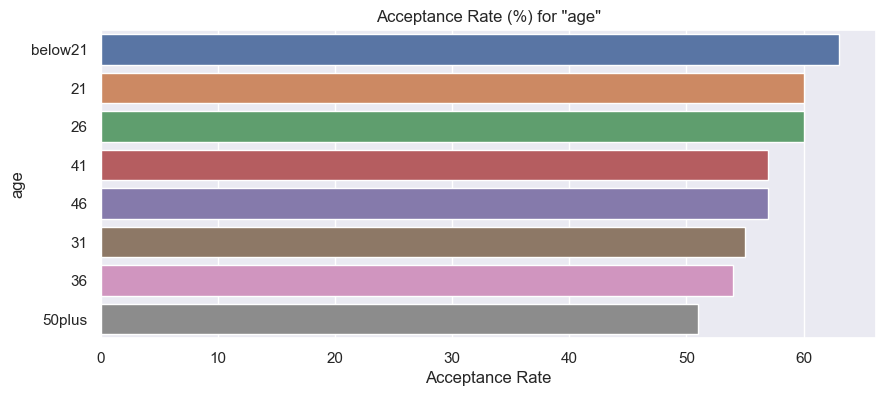

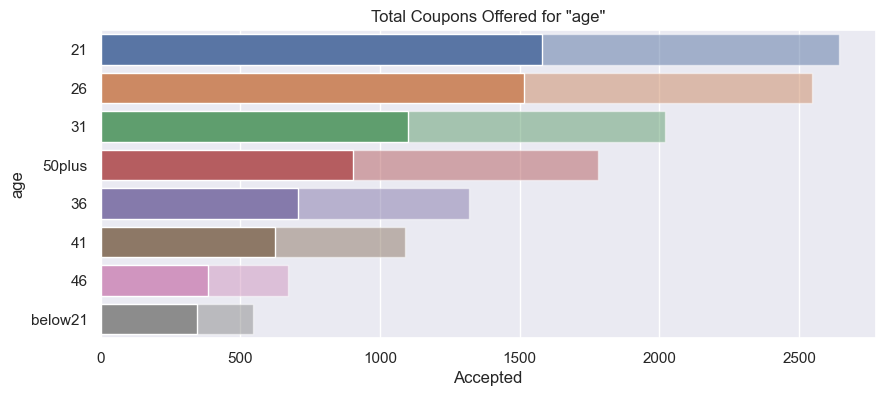


/────────────────────────────────────────  Feature: MARITALSTATUS  ────────────────────────────────────────/

|    | Values for "maritalStatus"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------+------------+------------+-----------------+-----------------------|
|  2 | Single                       |       2851 |       1865 |            4716 |                    60 |
|  3 | Unmarried partner            |       1226 |        959 |            2185 |                    56 |
|  1 | Married partner              |       2749 |       2319 |            5068 |                    54 |
|  0 | Divorced                     |        269 |        242 |             511 |                    53 |
|  4 | Widowed                      |         62 |         68 |             130 |                    48 |


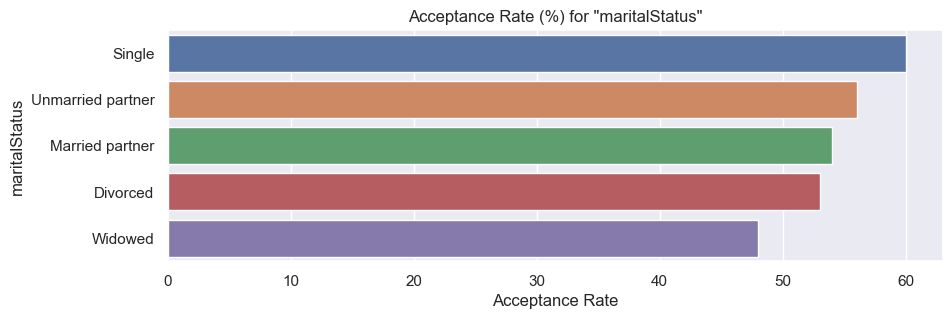

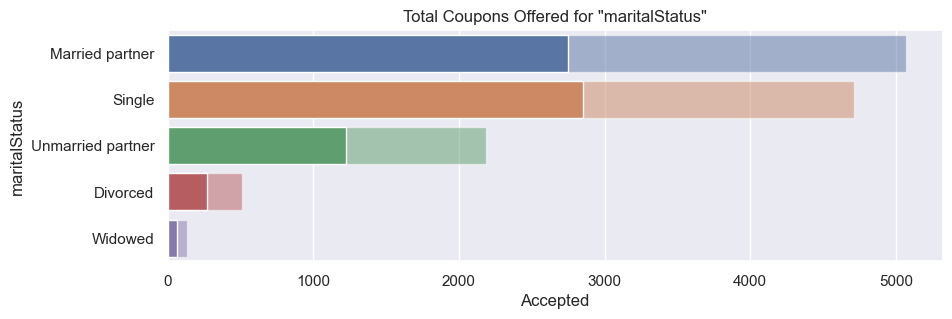


/────────────────────────────────────────  Feature: HAS_CHILDREN  ────────────────────────────────────────/

|    |   Values for "has_children" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------+------------+------------+-----------------+-----------------------|
|  0 |                           0 |       4329 |       3054 |            7383 |                    59 |
|  1 |                           1 |       2828 |       2399 |            5227 |                    54 |


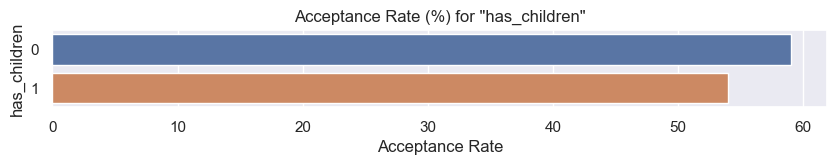

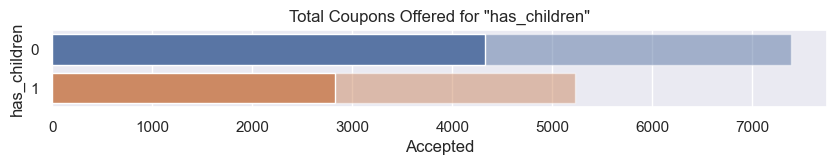


/────────────────────────────────────────  Feature: EDUCATION  ────────────────────────────────────────/

|    | Values for "education"                 |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------------+------------+------------+-----------------+-----------------------|
|  4 | Some High School                       |         63 |         25 |              88 |                    72 |
|  5 | Some college - no degree               |       2577 |       1748 |            4325 |                    60 |
|  3 | High School Graduate                   |        532 |        367 |             899 |                    59 |
|  0 | Associates degree                      |        634 |        514 |            1148 |                    55 |
|  1 | Bachelors degree                       |       2395 |       1928 |            4323 |                    55 |
|  2 | Graduate degree (Masters or Doctorate) |        956 |        871 |        

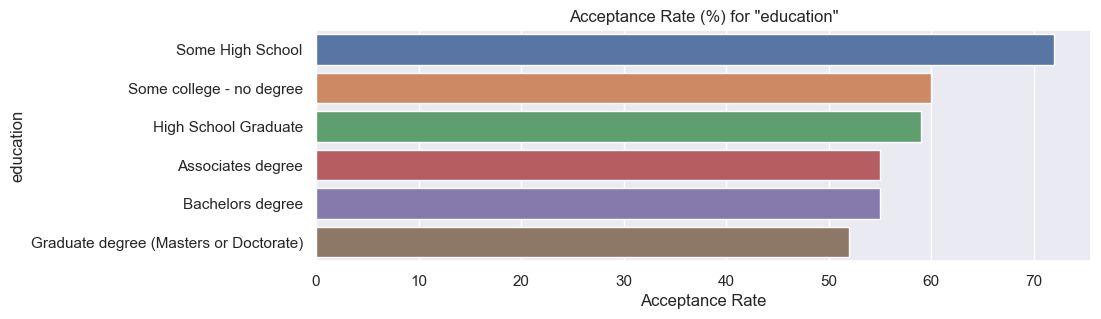

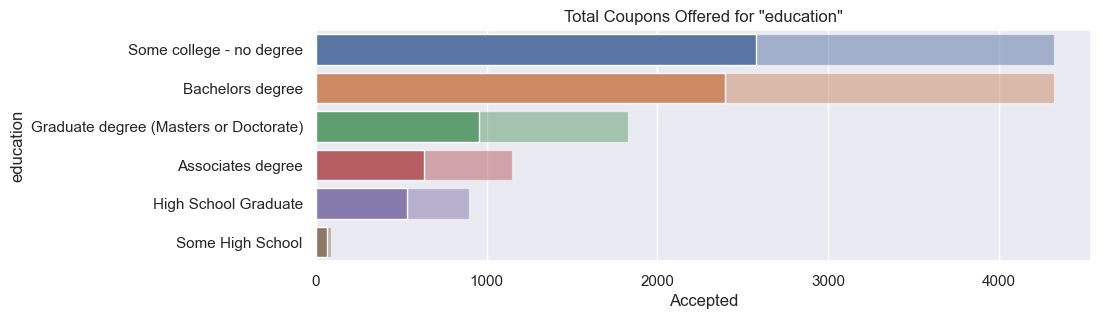


/────────────────────────────────────────  Feature: OCCUPATION  ────────────────────────────────────────/

|    | Values for "occupation"                   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------------------+------------+------------+-----------------+-----------------------|
| 11 | Healthcare Support                        |        169 |         73 |             242 |                    70 |
|  6 | Construction & Extraction                 |        106 |         48 |             154 |                    69 |
| 10 | Healthcare Practitioners & Technical      |        165 |         79 |             244 |                    68 |
| 19 | Protective Service                        |        112 |         62 |             174 |                    64 |
|  0 | Architecture & Engineering                |        111 |         64 |             175 |                    63 |
| 18 | Production Occupations                    |         

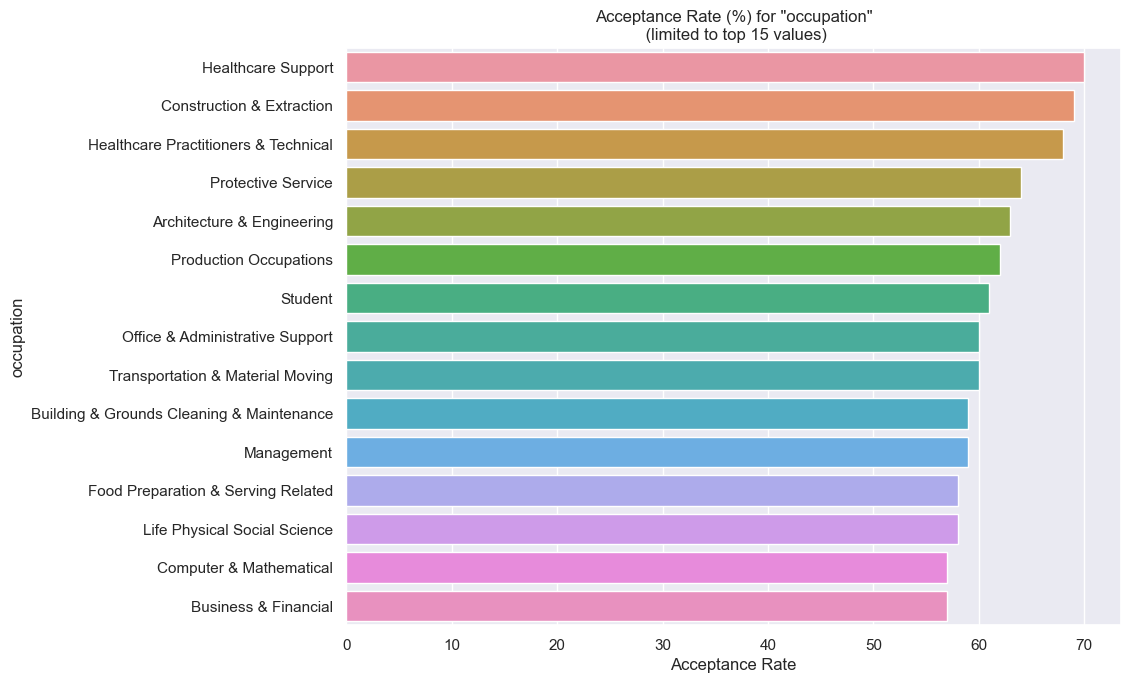

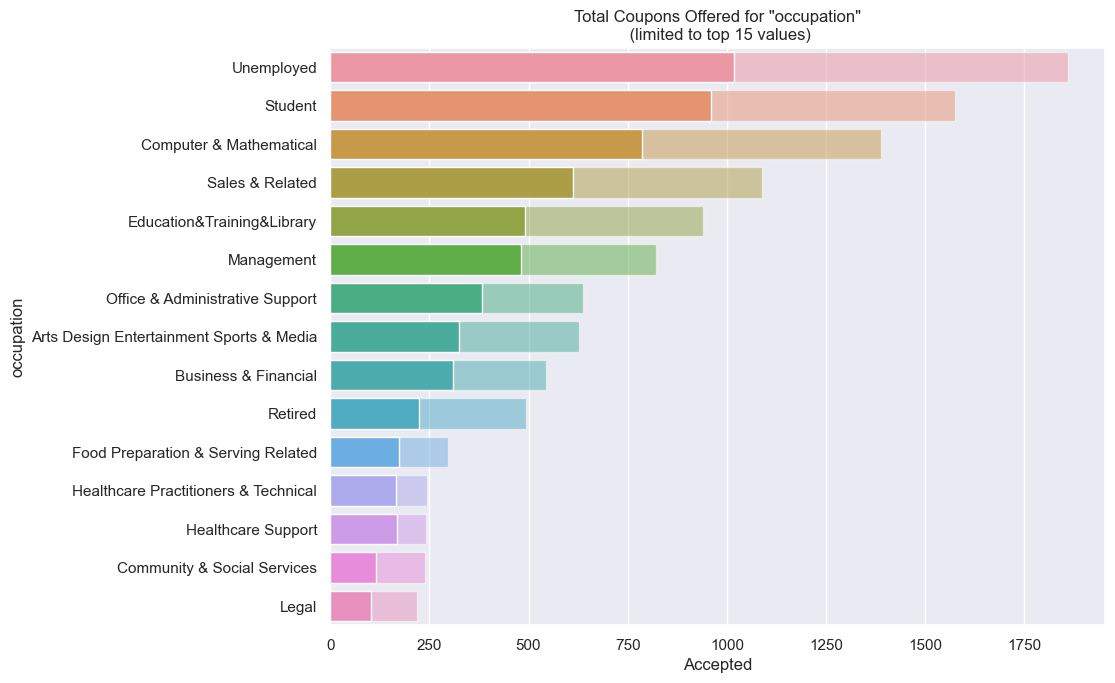


/────────────────────────────────────────  Feature: INCOME  ────────────────────────────────────────/

|    | Values for "income"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  2 | $25000 - $37499       |       1190 |        816 |            2006 |                    59 |
|  4 | $50000 - $62499       |        984 |        671 |            1655 |                    59 |
|  8 | Less than $12500      |        612 |        422 |            1034 |                    59 |
|  0 | $100000 or More       |        992 |        725 |            1717 |                    58 |
|  1 | $12500 - $24999       |       1047 |        778 |            1825 |                    57 |
|  3 | $37500 - $49999       |       1010 |        785 |            1795 |                    56 |
|  5 | $62500 - $74999       |        443 |        400 |             843 |                    53 |
|  7 

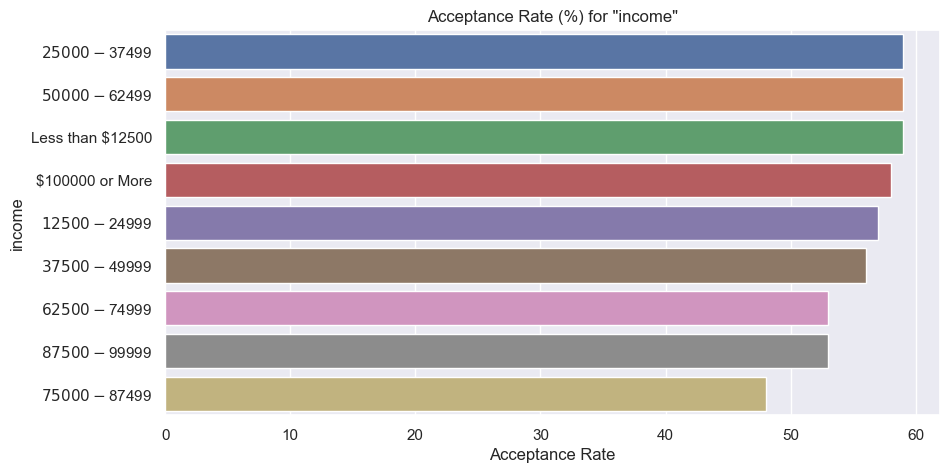

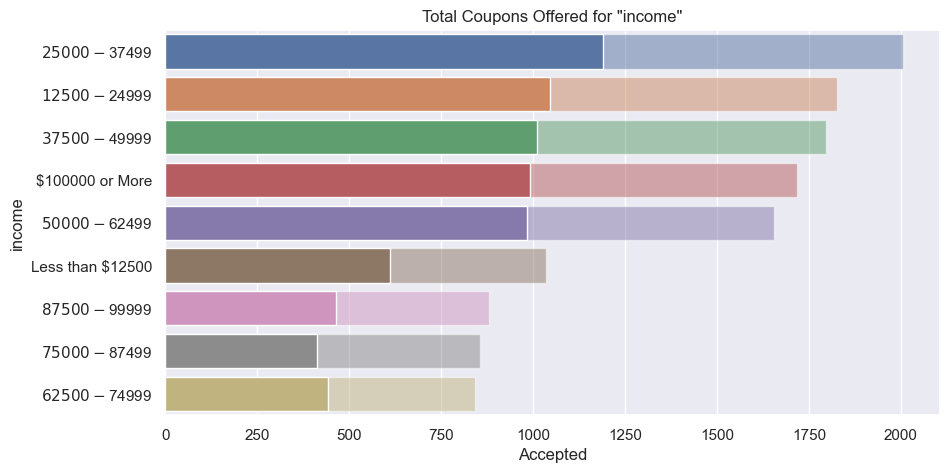


/────────────────────────────────────────  Feature: CAR  ────────────────────────────────────────/

|    | Values for "car"                         |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------------------+------------+------------+-----------------+-----------------------|
|  0 | Car that is too old to install Onstar :D |         17 |          4 |              21 |                    81 |
|  1 | Mazda5                                   |         16 |          6 |              22 |                    73 |
|  2 | Scooter and motorcycle                   |         11 |         11 |              22 |                    50 |
|  4 | do not drive                             |         10 |         12 |              22 |                    45 |
|  3 | crossover                                |          8 |         13 |              21 |                    38 |


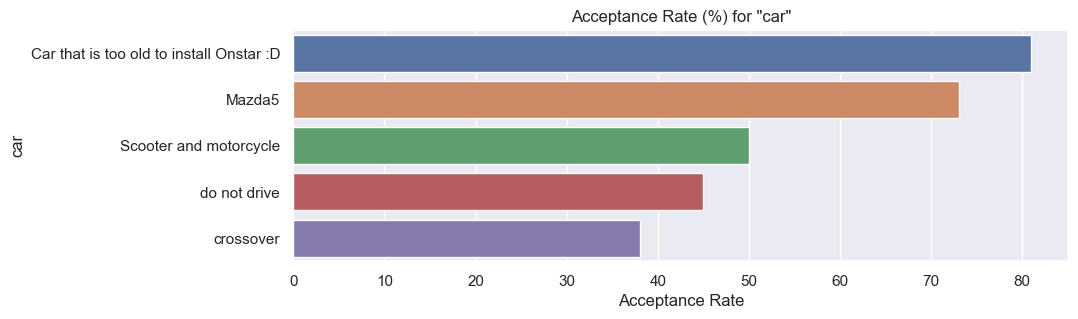

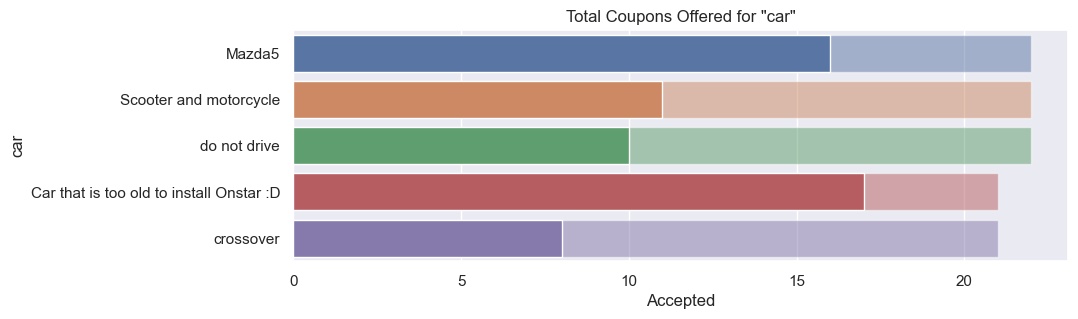


/────────────────────────────────────────  Feature: BAR  ────────────────────────────────────────/

|    | Values for "Bar"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------+------------+------------+-----------------+-----------------------|
|  1 | 4~8                |        681 |        390 |            1071 |                    64 |
|  0 | 1~3                |       1533 |        935 |            2468 |                    62 |
|  2 | gt8                |        201 |        147 |             348 |                    58 |
|  3 | less1              |       1936 |       1502 |            3438 |                    56 |
|  4 | never              |       2751 |       2427 |            5178 |                    53 |


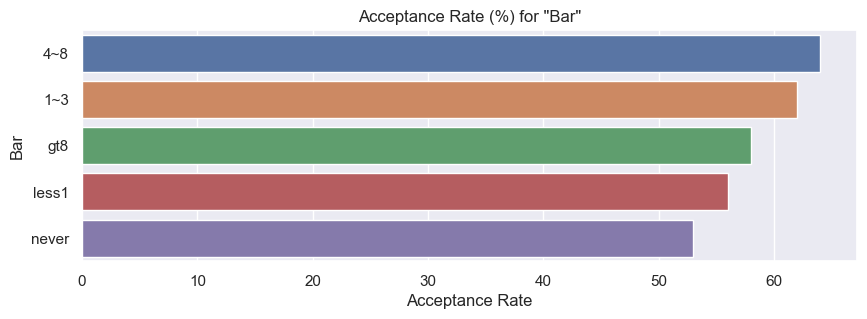

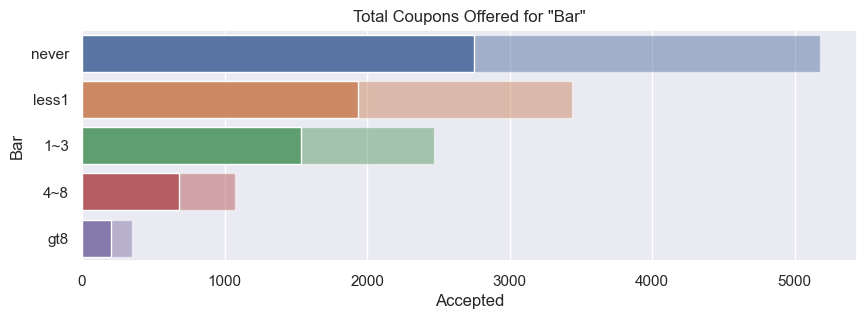


/────────────────────────────────────────  Feature: BAR_COHORT  ────────────────────────────────────────/

|    | Values for "Bar_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                       |        882 |        537 |            1419 |                    62 |
|  0 | <= 3                      |       6220 |       4864 |           11084 |                    56 |


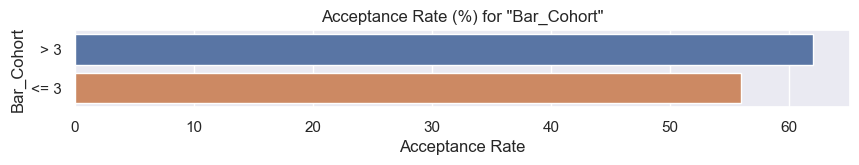

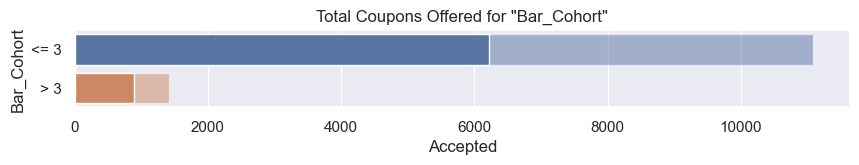


/────────────────────────────────────────  Feature: COFFEEHOUSE  ────────────────────────────────────────/

|    | Values for "CoffeeHouse"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  0 | 1~3                        |       2089 |       1110 |            3199 |                    65 |
|  1 | 4~8                        |       1125 |        654 |            1779 |                    63 |
|  2 | gt8                        |        646 |        461 |            1107 |                    58 |
|  3 | less1                      |       1839 |       1523 |            3362 |                    55 |
|  4 | never                      |       1348 |       1598 |            2946 |                    46 |


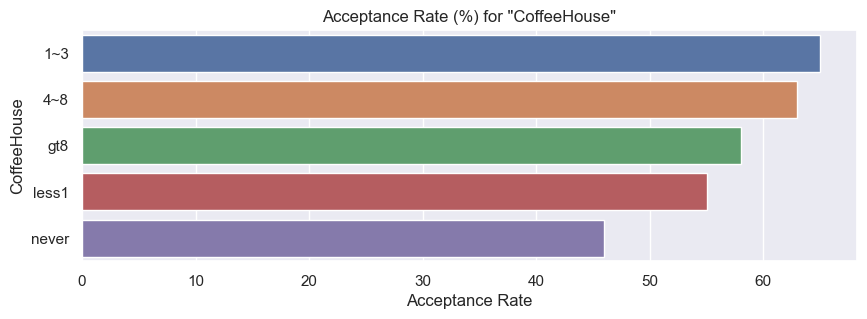

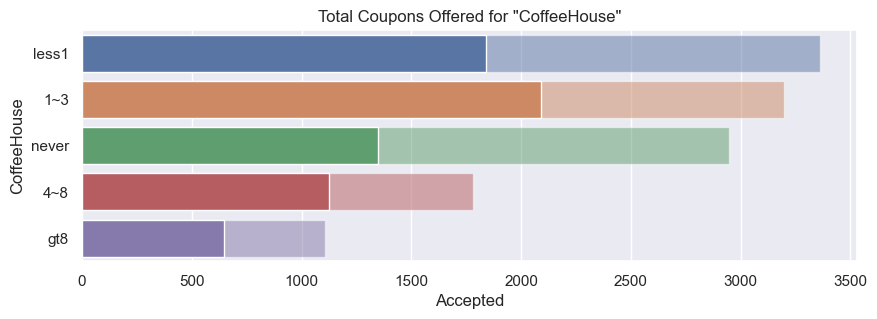


/────────────────────────────────────────  Feature: COFFEEHOUSE_COHORT  ────────────────────────────────────────/

|    | Values for "CoffeeHouse_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                               |       1771 |       1115 |            2886 |                    61 |
|  0 | <= 3                              |       5276 |       4231 |            9507 |                    55 |


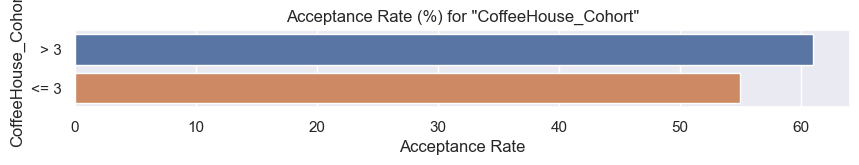

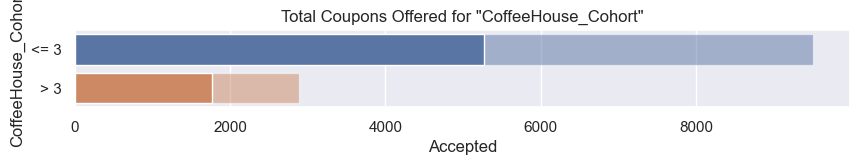


/────────────────────────────────────────  Feature: CARRYAWAY  ────────────────────────────────────────/

|    | Values for "CarryAway"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------+------------+------------+-----------------+-----------------------|
|  0 | 1~3                      |       2693 |       1952 |            4645 |                    58 |
|  1 | 4~8                      |       2462 |       1780 |            4242 |                    58 |
|  2 | gt8                      |        900 |        672 |            1572 |                    57 |
|  4 | never                    |         81 |         71 |             152 |                    53 |
|  3 | less1                    |        921 |        928 |            1849 |                    50 |


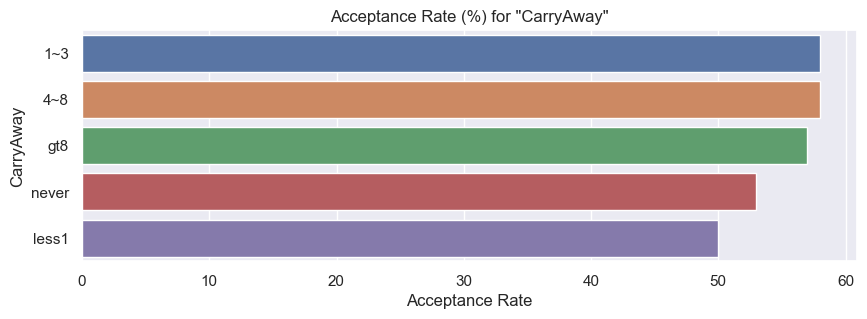

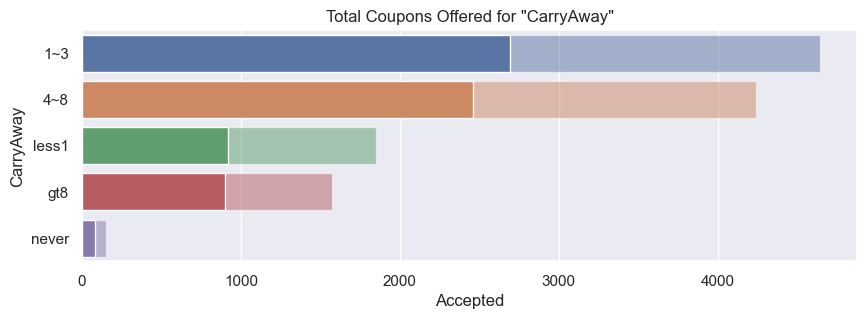


/────────────────────────────────────────  Feature: CARRYAWAY_COHORT  ────────────────────────────────────────/

|    | Values for "CarryAway_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                             |       3362 |       2452 |            5814 |                    58 |
|  0 | <= 3                            |       3695 |       2951 |            6646 |                    56 |


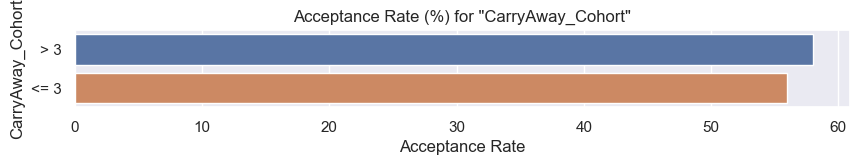

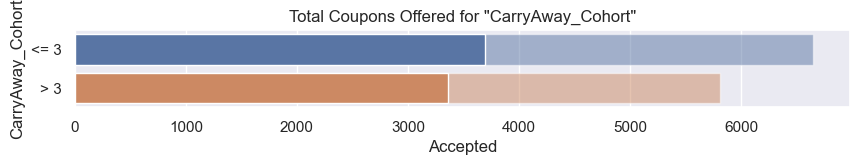


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20  ────────────────────────────────────────/

|    | Values for "RestaurantLessThan20"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------------+------------+------------+-----------------+-----------------------|
|  2 | gt8                                 |        779 |        503 |            1282 |                    61 |
|  1 | 4~8                                 |       2075 |       1478 |            3553 |                    58 |
|  0 | 1~3                                 |       2994 |       2362 |            5356 |                    56 |
|  3 | less1                               |       1103 |        968 |            2071 |                    53 |
|  4 | never                               |        117 |        102 |             219 |                    53 |


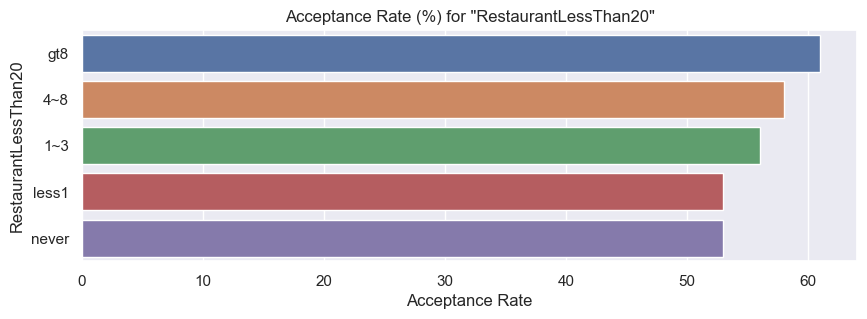

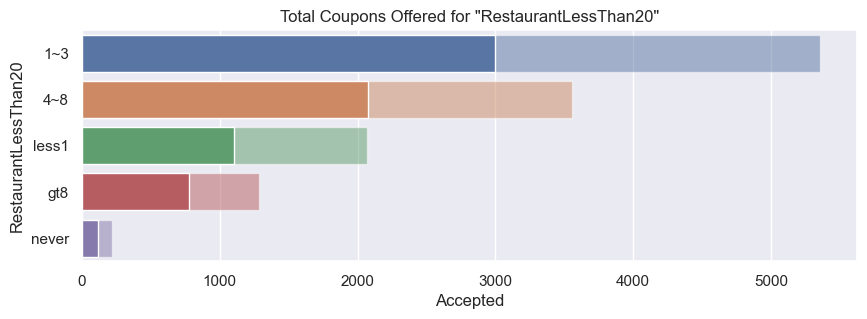


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20_COHORT  ────────────────────────────────────────/

|    | Values for "RestaurantLessThan20_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                                        |       2854 |       1981 |            4835 |                    59 |
|  0 | <= 3                                       |       4214 |       3432 |            7646 |                    55 |


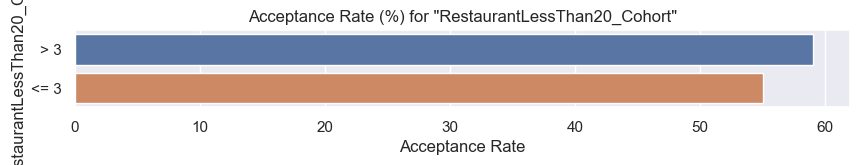

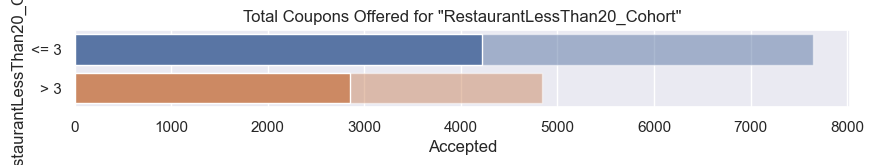


/────────────────────────────────────────  Feature: RESTAURANT20TO50  ────────────────────────────────────────/

|    | Values for "Restaurant20To50"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  1 | 4~8                             |        477 |        251 |             728 |                    66 |
|  2 | gt8                             |        175 |         89 |             264 |                    66 |
|  0 | 1~3                             |       1942 |       1324 |            3266 |                    59 |
|  3 | less1                           |       3363 |       2678 |            6041 |                    56 |
|  4 | never                           |       1095 |       1027 |            2122 |                    52 |


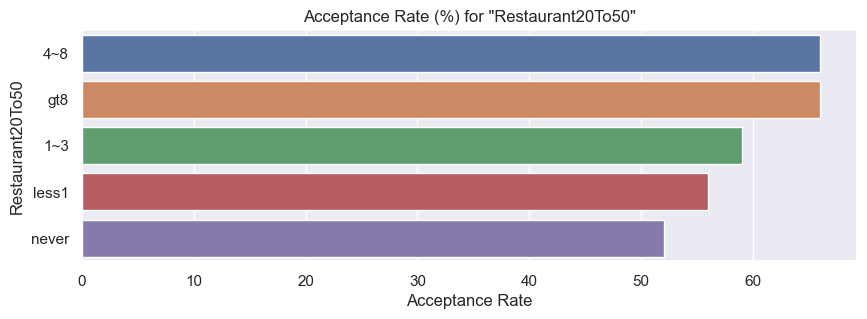

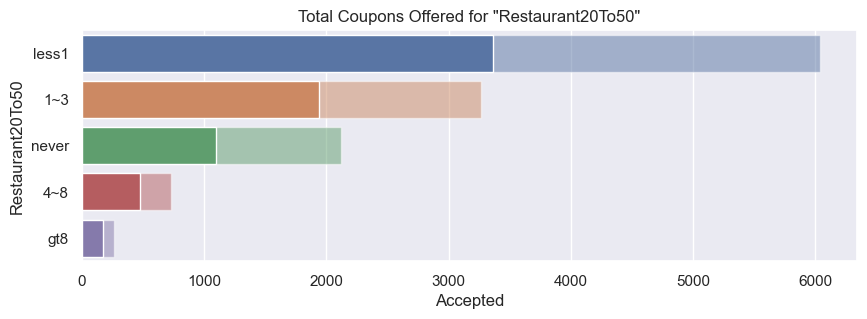


/────────────────────────────────────────  Feature: RESTAURANT20TO50_COHORT  ────────────────────────────────────────/

|    | Values for "Restaurant20To50_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                                    |        652 |        340 |             992 |                    66 |
|  0 | <= 3                                   |       6400 |       5029 |           11429 |                    56 |


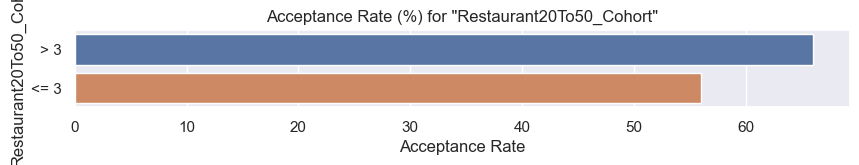

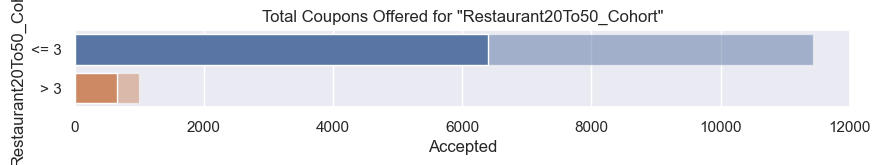


/────────────────────────────────────────  Feature: TOCOUPON_GEQ5MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ5min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                               1 |       7157 |       5453 |           12610 |                    57 |


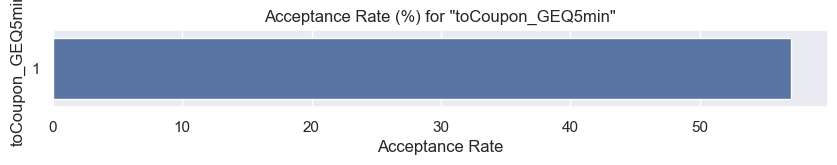

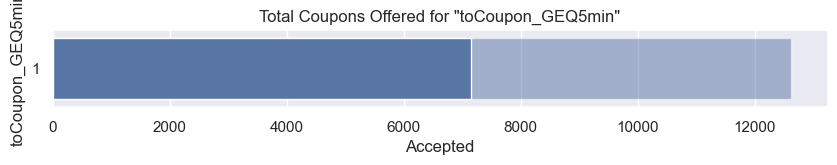


/────────────────────────────────────────  Feature: TOCOUPON_GEQ15MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ15min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                                0 |       3407 |       2144 |            5551 |                    61 |
|  1 |                                1 |       3750 |       3309 |            7059 |                    53 |


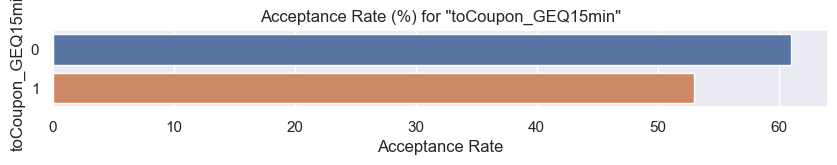

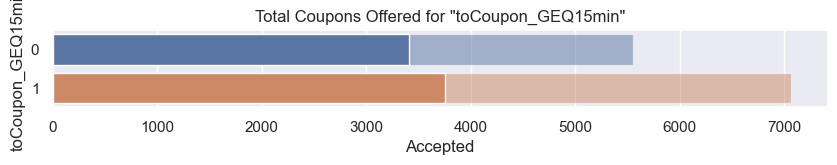


/────────────────────────────────────────  Feature: TOCOUPON_GEQ25MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ25min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                                0 |       6543 |       4604 |           11147 |                    59 |
|  1 |                                1 |        614 |        849 |            1463 |                    42 |


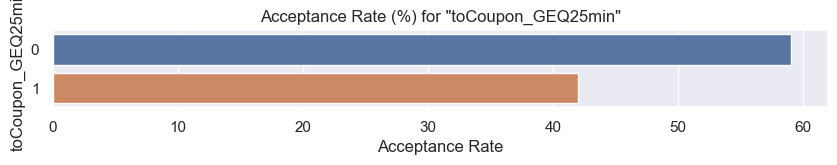

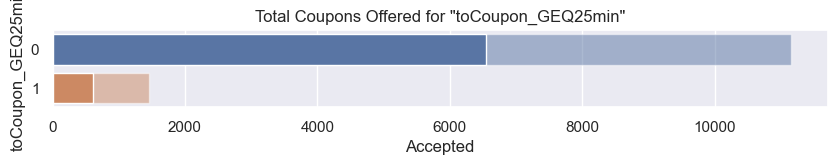


/────────────────────────────────────────  Feature: DIRECTION_SAME  ────────────────────────────────────────/

|    |   Values for "direction_same" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------+------------+------------+-----------------+-----------------------|
|  1 |                             1 |       1581 |       1137 |            2718 |                    58 |
|  0 |                             0 |       5576 |       4316 |            9892 |                    56 |


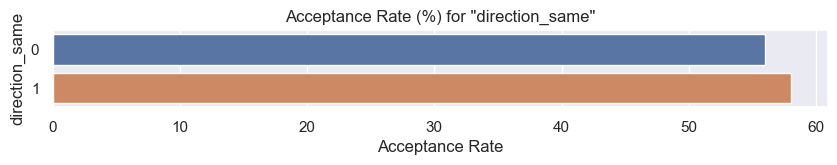

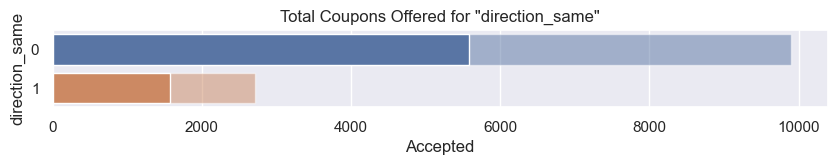


/────────────────────────────────────────  Feature: DIRECTION_OPP  ────────────────────────────────────────/

|    |   Values for "direction_opp" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                            0 |       1581 |       1137 |            2718 |                    58 |
|  1 |                            1 |       5576 |       4316 |            9892 |                    56 |


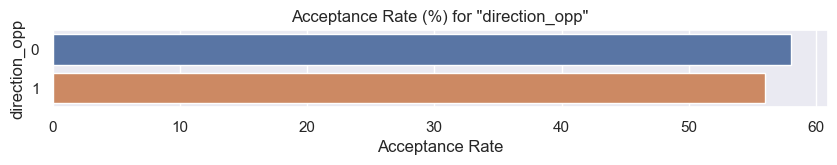

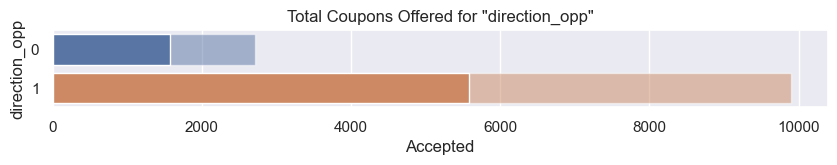


/────────────────────────────────────────  Feature: DISTANCEDIRECTION  ────────────────────────────────────────/

|    | Values for "distanceDirection"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  4 | 5min behind                      |       2223 |       1354 |            3577 |                    62 |
|  3 | 5min ahead                       |       1184 |        790 |            1974 |                    60 |
|  1 | 15min behind                     |       2739 |       2113 |            4852 |                    56 |
|  0 | 15min ahead                      |        397 |        347 |             744 |                    53 |
|  2 | 25min behind                     |        614 |        849 |            1463 |                    42 |


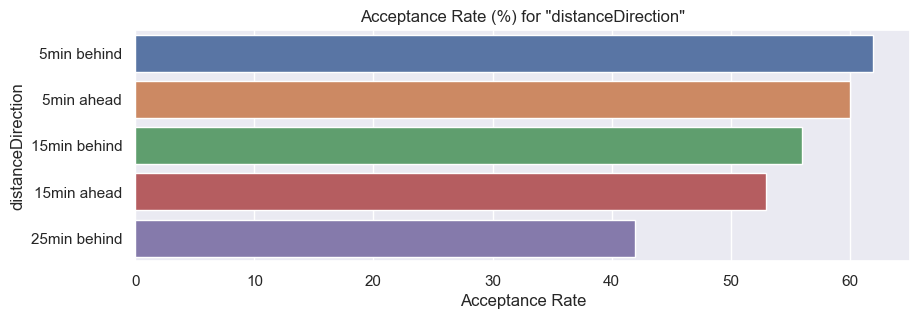

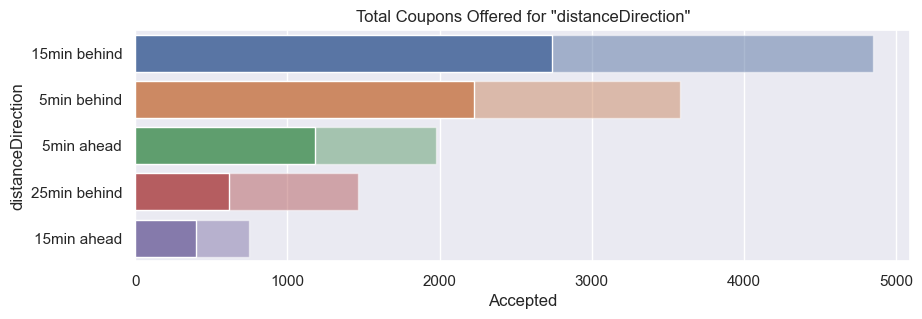


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIME  ────────────────────────────────────────/

|    | Values for "distanceDirectionTime"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------------------+------------+------------+-----------------+-----------------------|
| 18 | 5min behind 7AM                      |        236 |         95 |             331 |                    71 |
|  1 | 15min ahead 6PM                      |        170 |         68 |             238 |                    71 |
| 16 | 5min behind 2PM                      |        614 |        291 |             905 |                    68 |
|  5 | 15min behind 2PM                     |        713 |        388 |            1101 |                    65 |
| 14 | 5min behind 10AM                     |        633 |        378 |            1011 |                    63 |
| 13 | 5min ahead 7AM                       |        494 |        304 |            

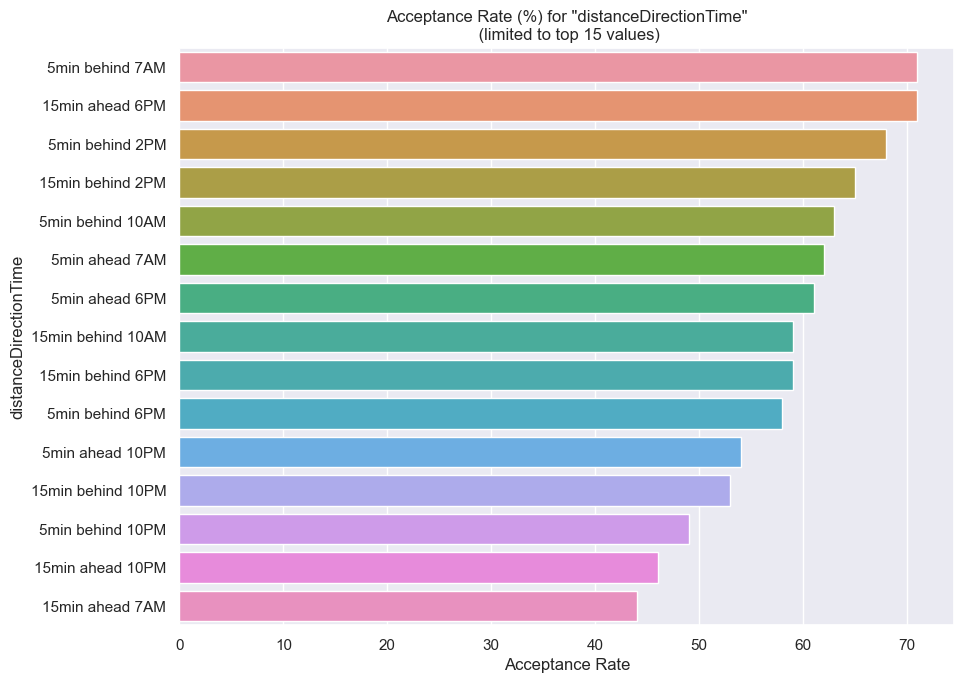

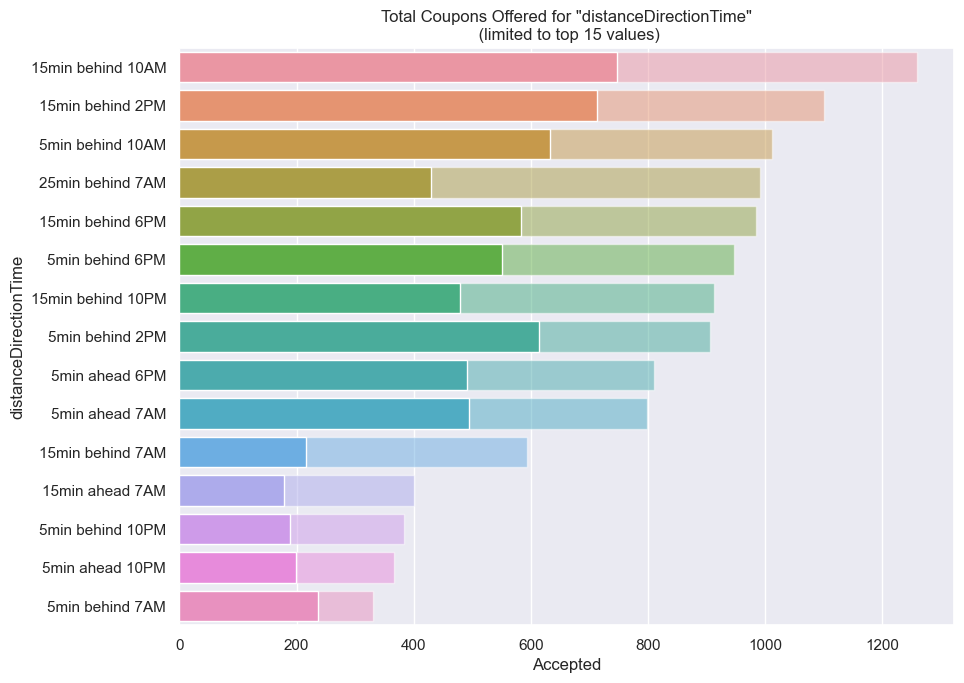


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEEXPIRATION  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimeExpiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------------------------+------------+------------+-----------------+-----------------------|
| 22 | 5min ahead 10PM 1d                             |        126 |         38 |             164 |                    77 |
| 26 | 5min ahead 7AM 1d                              |        283 |         91 |             374 |                    76 |
|  3 | 15min ahead 6PM 2h                             |        155 |         54 |             209 |                    74 |
| 10 | 15min behind 2PM 1d                            |        421 |        156 |             577 |                    73 |
| 32 | 5min behind 2PM 1d                             |        510 |        211 |             721 |                    71 |
| 3

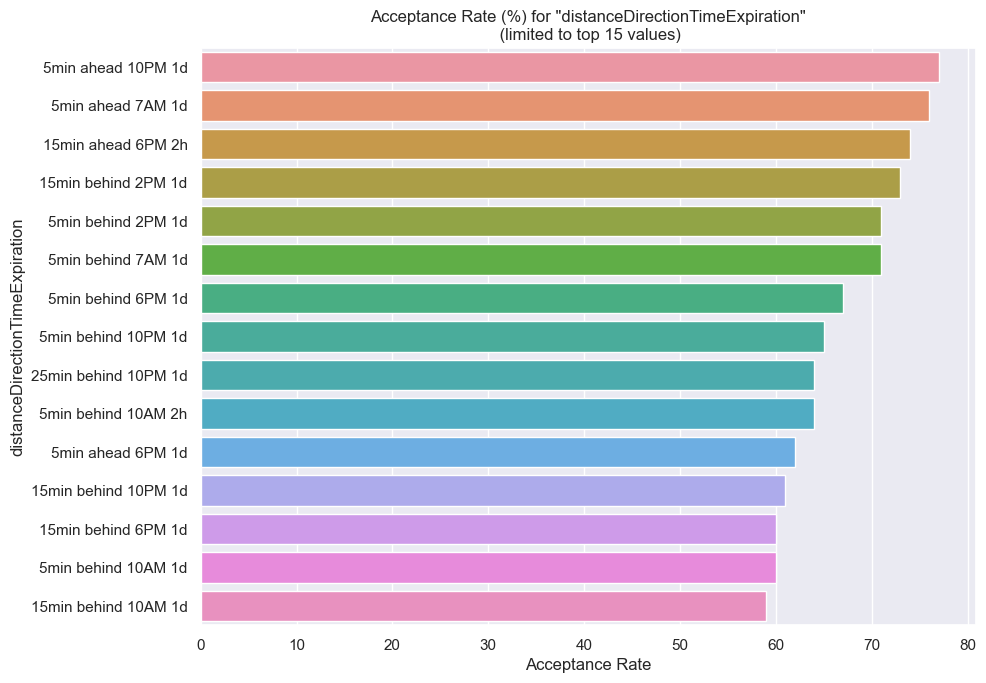

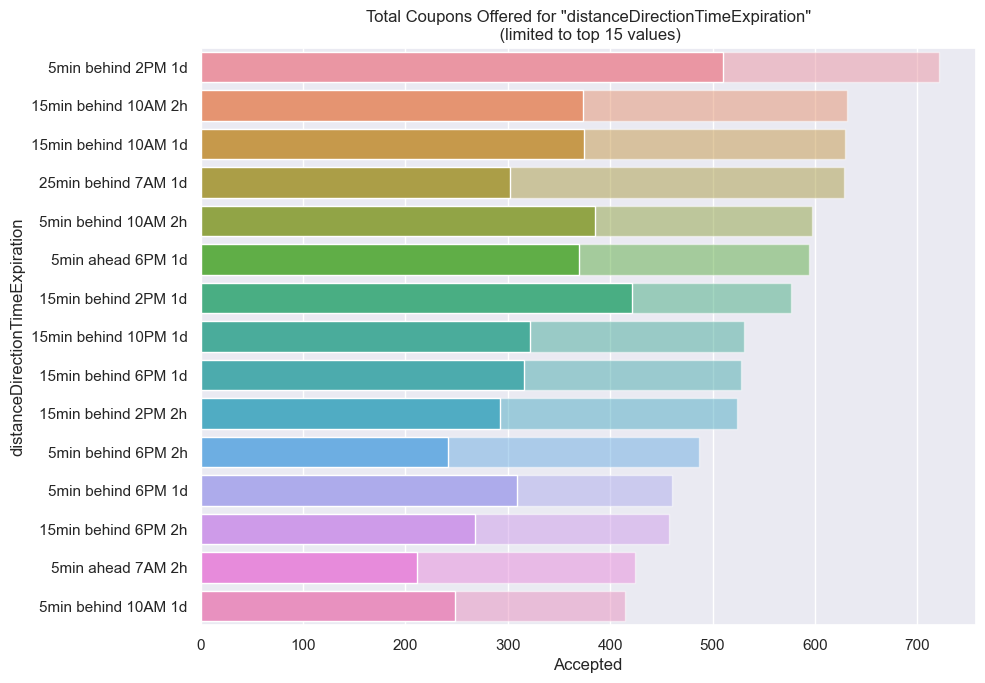


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGER  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimePassenger"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------------------------+------------+------------+-----------------+-----------------------|
| 49 | 5min behind 6PM Partner                       |         81 |          3 |              84 |                    96 |
| 27 | 25min behind 6PM Partner                      |         24 |          4 |              28 |                    86 |
| 19 | 15min behind 6PM Friend(s)                    |        282 |         45 |             327 |                    86 |
| 42 | 5min behind 2PM Alone                         |        231 |         77 |             308 |                    75 |
| 13 | 15min behind 10PM Partner                     |         48 |         18 |              66 |                    73 |
|  3 | 15mi

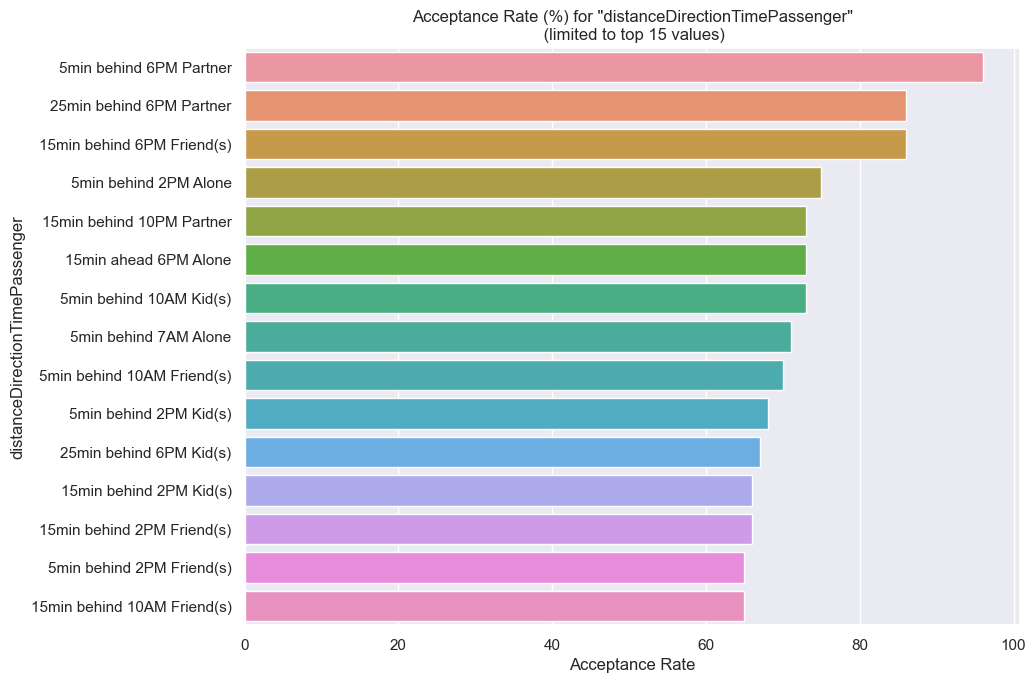

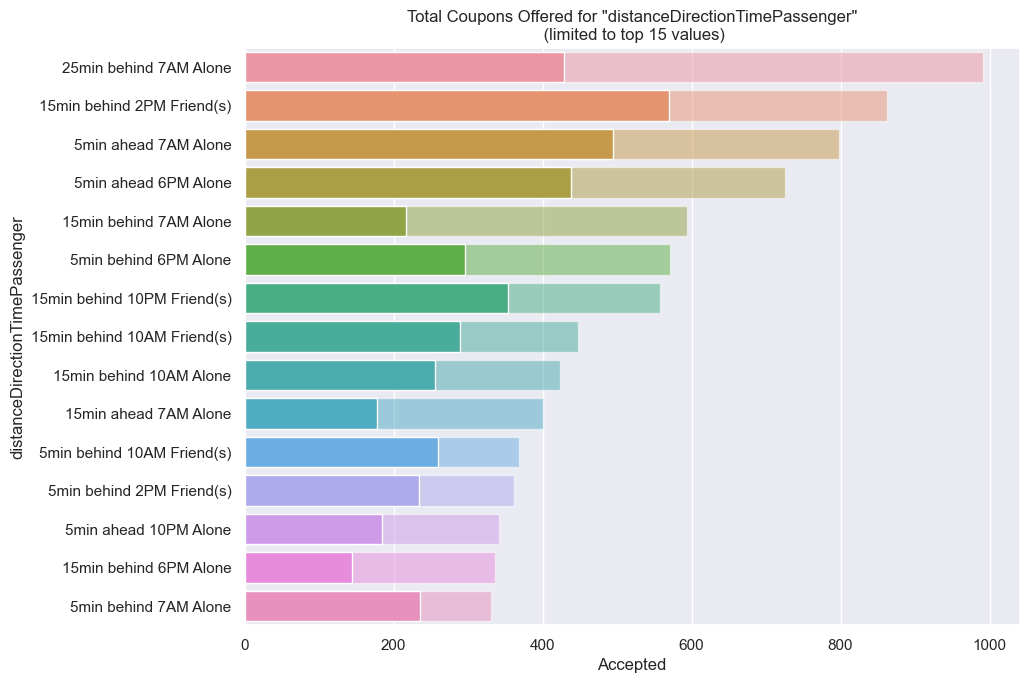


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGERCOUPON  ────────────────────────────────────────/

|     | Values for "distanceDirectionTimePassengerCoupon"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|-----+-----------------------------------------------------+------------+------------+-----------------+-----------------------|
| 119 | 5min behind 6PM Partner Restaurant(<20)             |         81 |          3 |              84 |                    96 |
| 105 | 5min behind 2PM Alone Restaurant(<20)               |        173 |          8 |             181 |                    96 |
|  11 | 15min behind 10AM Alone Carry out & Take away       |         35 |          3 |              38 |                    92 |
|  45 | 15min behind 6PM Friend(s) Carry out & Take away    |         21 |          2 |              23 |                    91 |
|  34 | 15min behind 2PM Friend(s) Carry out & Take away    |        161 |         20 

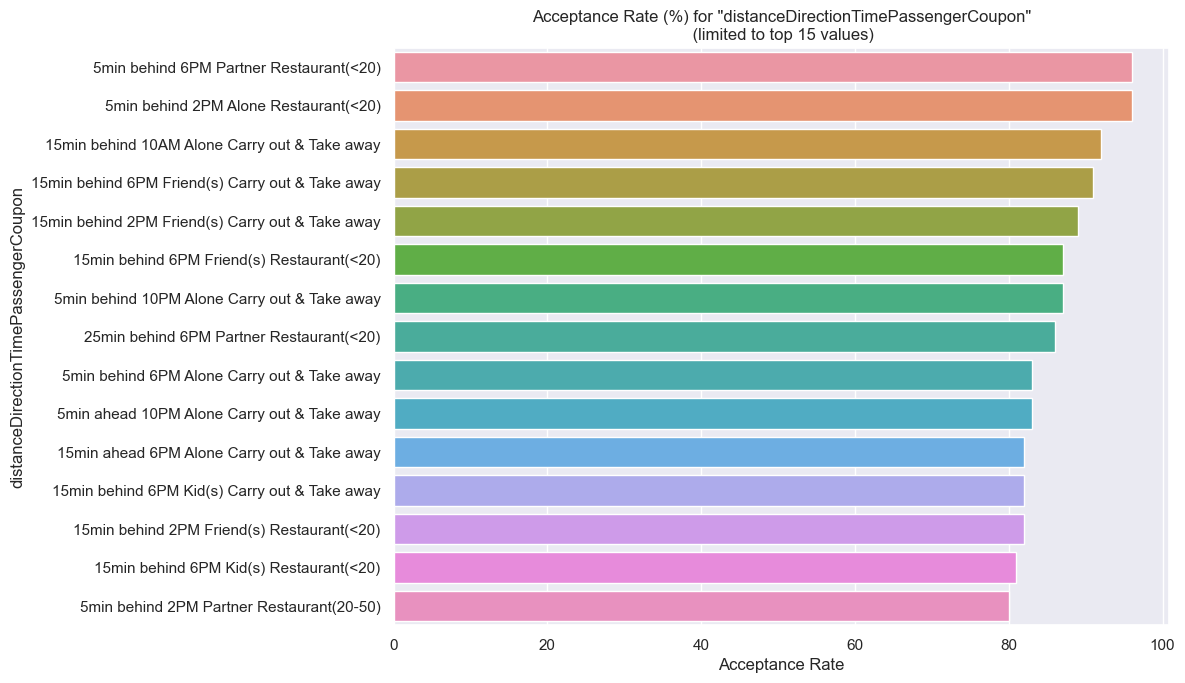

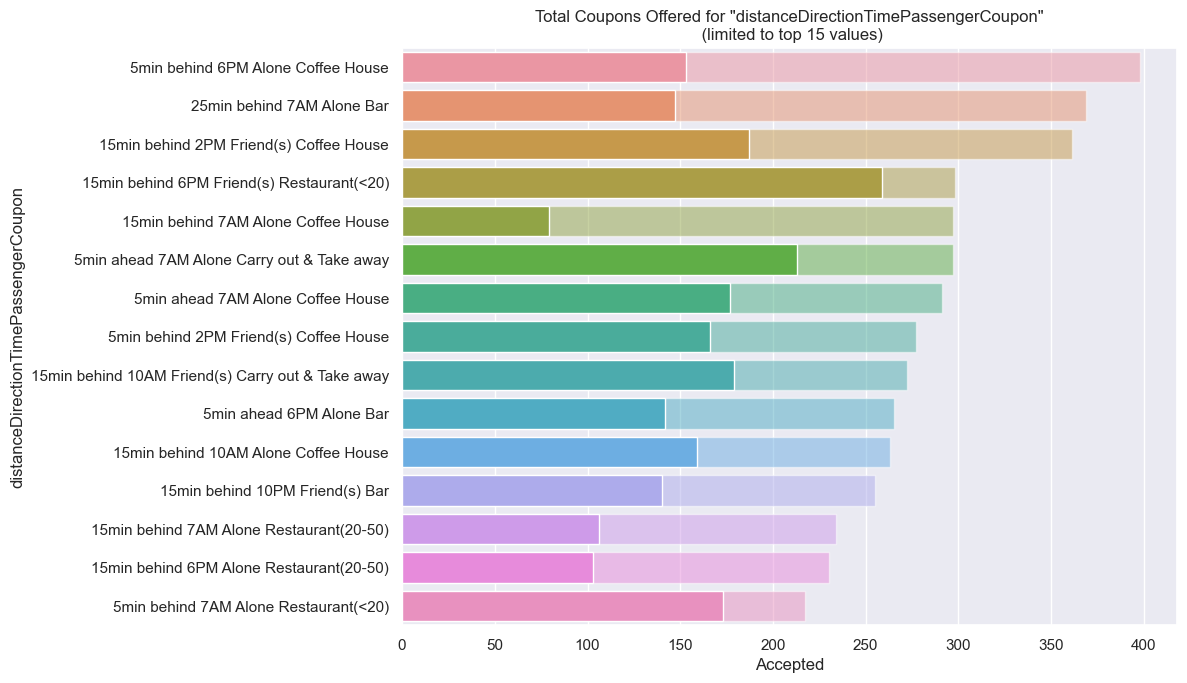


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGERCOUPONEXPIRATION  ────────────────────────────────────────/

|     | Values for "distanceDirectionTimePassengerCouponExpiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|-----+---------------------------------------------------------------+------------+------------+-----------------+-----------------------|
| 160 | 5min behind 6PM Partner Restaurant(<20) 1d                    |         42 |          1 |              43 |                    98 |
|  50 | 15min behind 2PM Friend(s) Restaurant(<20) 1d                 |         77 |          2 |              79 |                    97 |
| 142 | 5min behind 2PM Alone Restaurant(<20) 1d                      |        173 |          8 |             181 |                    96 |
| 161 | 5min behind 6PM Partner Restaurant(<20) 2h                    |         39 |          2 |              41 |                    95 |
|  63 | 15min be

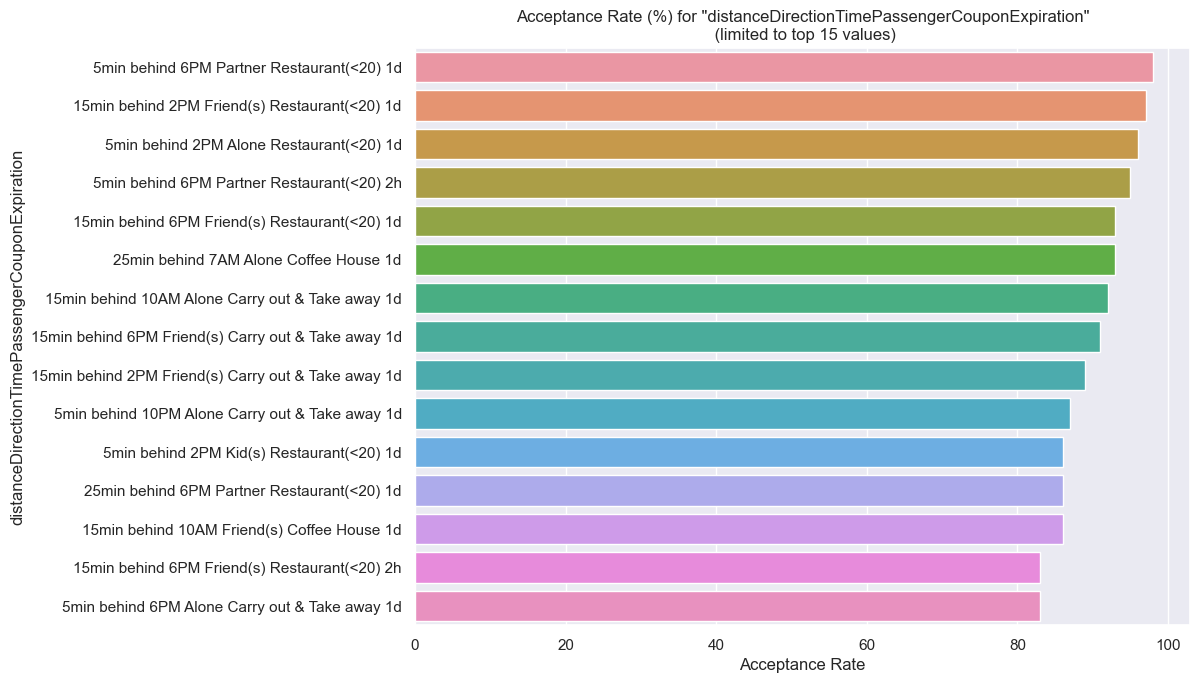

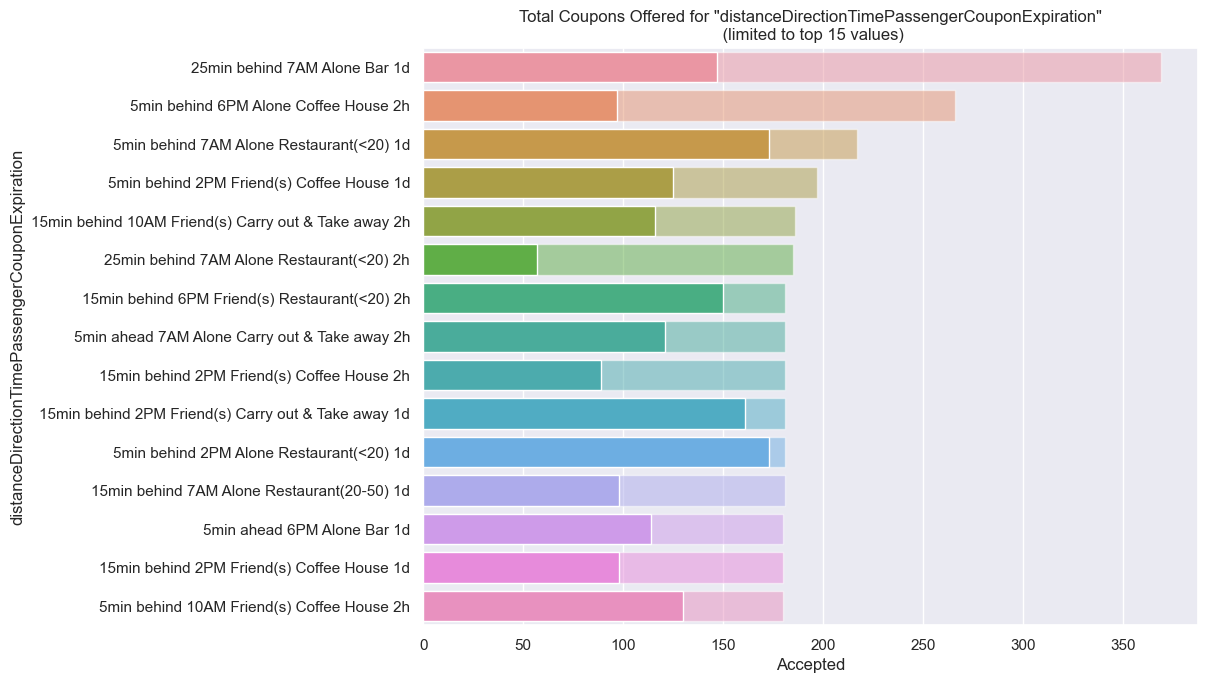

In [17]:
# Evaluate bivariate plots for total population
# TODO - set up the following code snippet as a reusable function
for i in data.columns:
    
    # Since we'll group by "Y", skip when we're evaluating "Y" as a feature column
    if i == "Y":
        continue
    
    # For each column:
    # 1. Visual separation between iterated columns/features
    print('\n/' + ('─' * 40) + f'  Feature: {i.upper()}  ' + ('─' * 40) + "/\n")

    # 2. create temporary dataframes subsetting accepted and rejected counts by unique feature value
    data_value_accept = pd.DataFrame(data.query("Y == 1").groupby([i]).size()).reset_index()\
                .rename(columns={0:"Accepted"})
    data_value_reject = pd.DataFrame(data.query("Y == 0").groupby([i]).size()).reset_index()\
                .rename(columns={0:"Rejected"})
    
    # 3. merge databases on feature value index
    data_values = pd.merge(data_value_accept, data_value_reject, on=i)
    
    # 4. create new columns for "total offered" (as a count) and "acceptance rate" (as a percentage)
    data_values["Total Offered"] = data_values["Accepted"] + data_values["Rejected"]
    data_values["Acceptance Rate"] = round(data_values["Accepted"] / ( data_values["Accepted"] + data_values["Rejected"]) * 100)
    
    # 5. sort values by `Acceptance Rate` to maintain visual reading consistency in each plot (descending)
    data_values.sort_values("Acceptance Rate", ascending=False, inplace=True)
    
    # 6. print the values and their occurrence counts for tabular reference
    print(tabulate(data_values, headers=[f'Values for "{i}"', 'Accepted', 'Rejected','Total Offered','Acceptance Rate (%)'], tablefmt="orgtbl"))
    
    # 7. reset the index such that the values are plottable
    data_values = data_values.reset_index()

    # 8. generate the plot for each feature value counts and acceptance rates
    #    limit to top 15 for larger cohorts
    value_limit = 15
    plot_width = np.ceil(len(data_values.index)/2)
    data_title_rate = 'Acceptance Rate (%) for "' + i + '"'
    data_title_count = 'Total Coupons Offered for "' + i + '"'
    
    # tune plot with and added disclaimer if we're limiting the set to top "value_limit" accepted values
    if (len(data_values.index) > value_limit):
        plot_width = value_limit / 2
        append_title = '\n (limited to top 15 values)'
        data_title_rate += append_title
        data_title_count += append_title
        
    # plot the acceptance rate
    plt.figure(figsize=(10,plot_width))
    sns.barplot(data=data_values[0:value_limit], y=i, x="Acceptance Rate", orient='h').set_title(data_title_rate)
    #plt.savefig(f'images/pa1-{i.lower()}-acceptance-rates.svg', format="svg")
    plt.show()
    
    # resort for `Total Offered`
    data_values.sort_values("Total Offered", ascending=False, inplace=True)


    # plot the total offered
    plt.figure(figsize=(10,plot_width))
    sns.barplot(data=data_values[0:value_limit], y=i, x="Total Offered", orient='h', alpha=0.5).set_title(data_title_count)
    sns.barplot(data=data_values[0:value_limit], y=i, x="Accepted", orient='h')
    #plt.savefig(f'images/pa1-{i.lower()}-counts.svg', format="svg")
    plt.show()
    
    
# Clean up: Release the plots from memory
plt.close()

---
> ##### Insights/Observations: Bivariate Analysis
From reviewing the feature plots representing occurrences of each's unique values (above), the following is observed:
> * Most targeted drivers/customers:
>   * were either unemployed or students (`occupation`)
>   * were young adults, between ages 21-31 (`age`)
>   * were driving predominantly driving alone, with no urgent place to go, in hot and sunny weather (`passenger`, `destination`, `weather`, `temperature`)
>   * were fairly comparable in gender and slightly favored those without children (`gender`, `has_children`)
>   * either had some college education or held an undergraduate degree (`education`)
>   * made almost, or less than half of the [average US Househould income](https://www.statista.com/statistics/203183/percentage-distribution-of-household-income-in-the-us/ "from: Statista.com") (`income`)
> * Most coupons offered were:
>   * for businesses at least 5 minutes away, largely between 15-25 minutes from the driver's location, but in the opposite direction they were travelling in (`toCoupon_GEQ*`, `direction*`)
>   * largely offered during peak driving times (in the US), at 7am and 6pm (`time`)
>   * to coffee shops, followed by less expensive restaurants (`coupon`)
>   * targeting drivers that infrequently went the different businesses types offered (`Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantsLessThan20`, `Restaurant20To50`)
> * Coupon acceptance was ***more likely*** when:
>   * The driver wasn't rushing to work or back home (`destination`)
>   * The weather was both sunny and hot (`weather`, `temperature`)
>   * Friend(s) were in the car, suggesting perhaps they noticed the coupon soon after it was offered, minimizing time to business destination. (`passengers`)
>   * The type of coupon was for cheaper restaurants or carry out/take away
>   * The driver could go back later to use the coupon within one day (`expiration`)
>   * It were offered to drivers in their 20s and early 30s and single (`age`, `maritalStatus`)
>   * The driver only had some college, but not yet a degree (though those with undergrad degree still had higher acceptance than rejection) (`education`)
>   * The driver was a student, though the highest amount of coupons targeted those that were unemployed (`occupation`)
>   * The driver's income was below the national average (US), though oddly drivers making the highest incomes also accepted coupons (`income`)
>   * The driver visits the businesses aligned with the coupon type a few times per month (consistent across all coupon types) (`Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantsLessThan20`, `Restaurant20To50`)
>   * The driver was less than 15 minutes past the coupon's location (`distanceDirection`)
>   * The driver was offered a coupon either mid-morning (10am) or mid-afternoon (2pm), and within 25 minutes from the business location (`distanceDirectionTime`). The likelihood of accepting the coupon increases further if it also allowed for 1 day before expiring. (`distanceDirectionTimeExpiration`)
> * Coupon acceptance was ***less likely*** when:
>   * It was offered early morning or late at night (`time`)
>   * The driver has children (not necessarily in the car, TBD) (`has_children`)
>   * The driver had already driven 25 minutes or more past the coupon's location (`distanceDirection`)
> * As previously mentioned:
>   * we can only consider one of the two `direction*` features as they are inverses of each other
>   * we will treat `car` feature as anecdotal information, due to significant missing data
---

---
> ##### 2.5. Explore numerical features for correlations (Multivariate analysis)
---

In [18]:
# Explore statistical analysis of numerical values within features
data.describe([.6, .7, .8, .9, .95, .99])

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12610.000000  12610.000000           12610.0       12610.000000   
mean      63.267248      0.414512               1.0           0.559794   
std       19.153386      0.492657               0.0           0.496432   
min       30.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
60%       80.000000      1.000000               1.0           1.000000   
70%       80.000000      1.000000               1.0           1.000000   
80%       80.000000      1.000000               1.0           1.000000   
90%       80.000000      1.000000               1.0           1.000000   
95%       80.000000      1.000000               1.0           1.000000   
99%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12610.000000    12610.000000   12610.000000  12610.000000  
mean            0.116019        0.215543       0.784457      0.567565  
std             0.320260        0.411215       0.411215      0.495434  
min             0.000000        0.000000       0.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
60%             0.000000        0.000000       1.000000      1.000000  
70%             0.000000        0.000000       1.000000      1.000000  
80%             0.000000        1.000000       1.000000      1.000000  
90%             1.000000        1.000000       1.000000      1.000000  
95%             1.000000        1.000000       1.000000      1.000000  
99%             1.000000        1.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

<Figure size 1000x600 with 0 Axes>

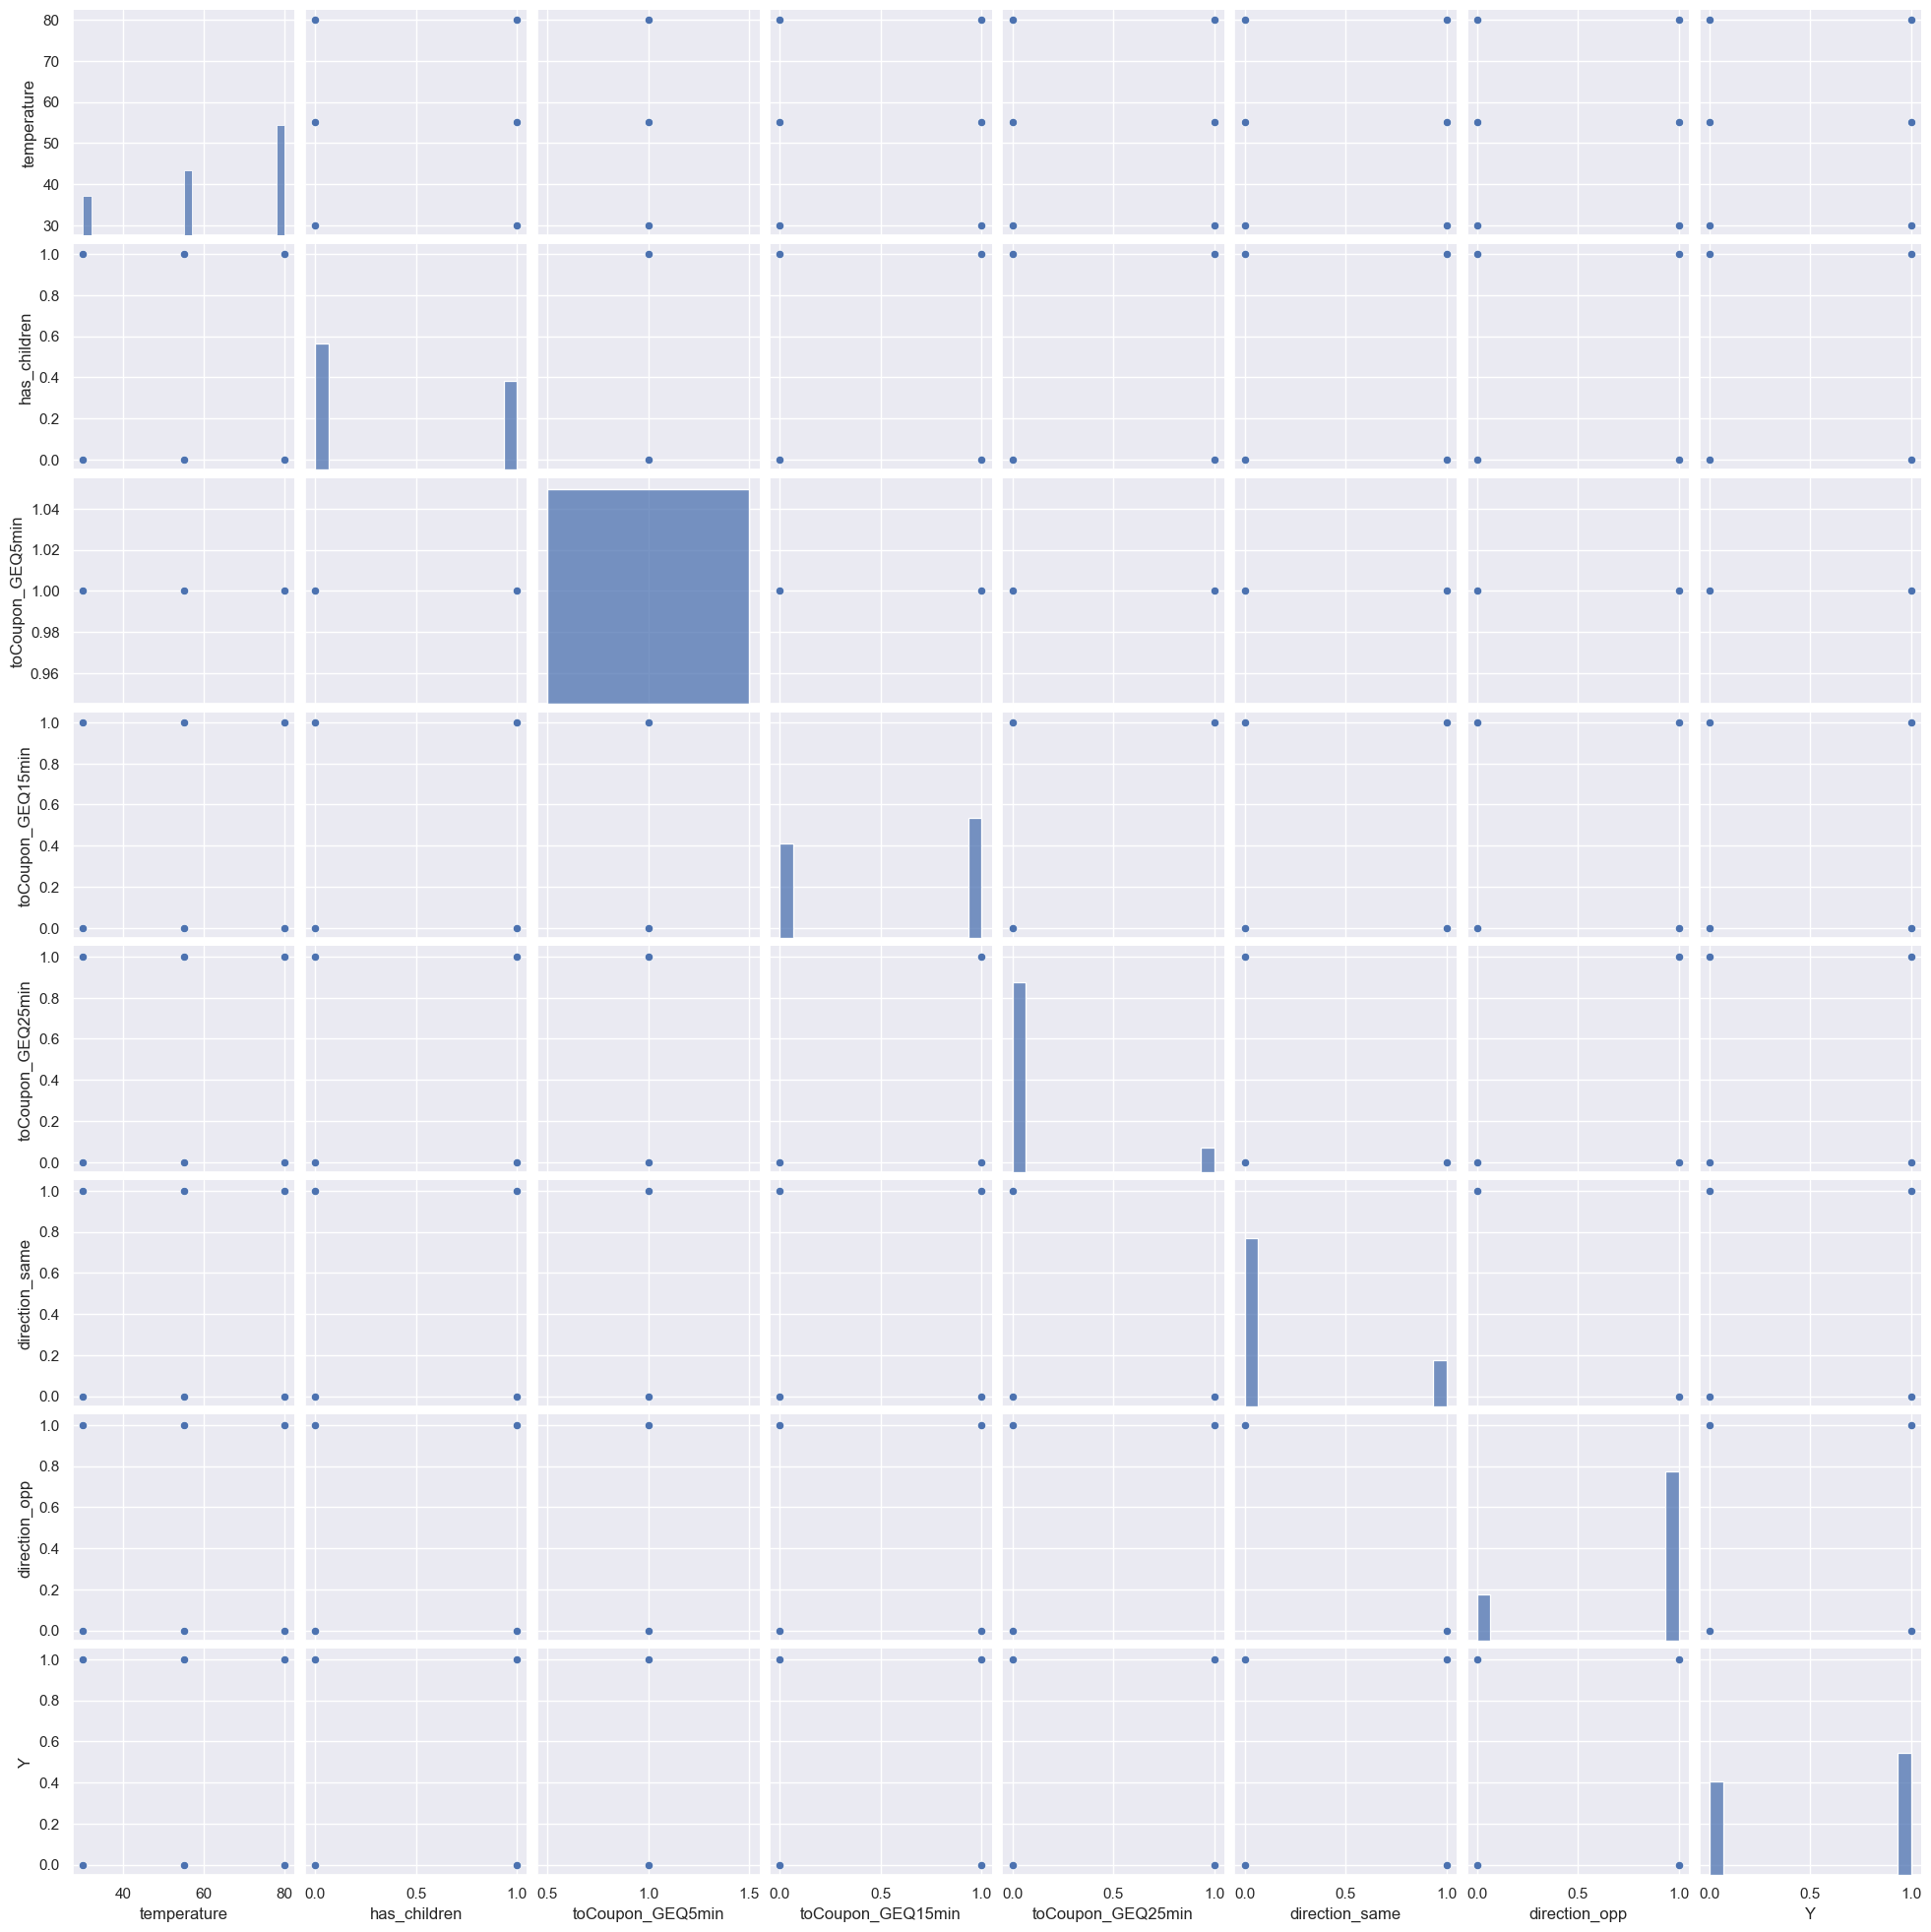

In [19]:
# Let's take a multivariate visual reference of numerical features through pairplotting
plt.figure(figsize=(10,6));
sns.pairplot(data);

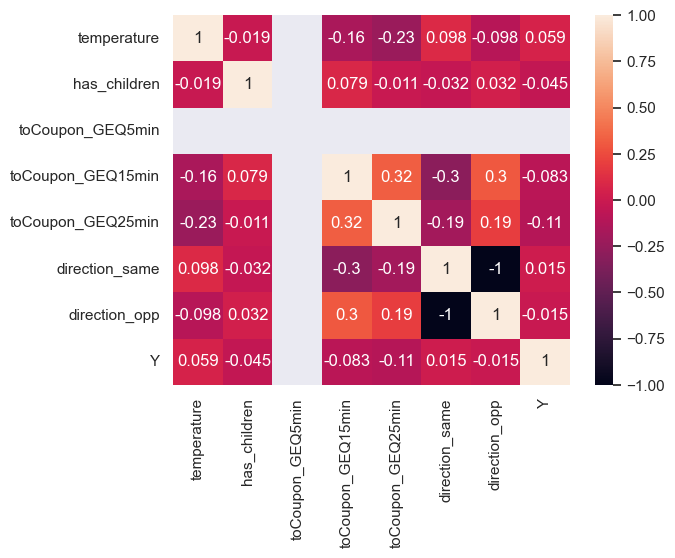

In [20]:
# Let's understand any correlations via heatmap
sns.heatmap(data.corr(), annot=True);


In [21]:
# Dive into the distance feature, which currently seems to be represented by 3 different columns.
# Examine all three columns to understand the population logic.

# First, let's get the relevant columns that contain "toCoupon_GEQ" in their name, 
# and then convert the object to a list
distance_cols = data.columns[data.columns.str.contains("toCoupon_GEQ")].tolist()

# Now, let's see how these values are populated for both coupon accepted/not accepted cohorts,
# reviewing the sum and mean
data.groupby("Y")[distance_cols].agg(["sum", "mean"])

toCoupon_GEQ5min      toCoupon_GEQ15min           toCoupon_GEQ25min  \
               sum mean               sum      mean               sum   
Y                                                                       
0             5453  1.0              3309  0.606822               849   
1             7157  1.0              3750  0.523963               614   

             
       mean  
Y            
0  0.155694  
1  0.085790

---
> ##### Insights/Observations: Numerical Multivariate Analysis
> * The strong (1:1) negative correlation between `direction_same` and `direction_opp` is expected (by design), thus we can ignore one of the columns in futher reviews.
> * From the above review of **_numerical features_**, there are no other valuable strong negative or positive correlations observed. 
> * The `toCoupon_GEQ*` maching columns seem to be inclusive of the smaller distances (e.g. "5min" = 1 when distance was "15min". There may be benefit to creating a new categorical data feature from the "GEQ" collection of columns that derives the furthest tallied distance
---

---
> ##### 2.6. Explore categorical features for correlations (Multivariate analysis)
---

In [22]:
# What does the total population look like, by volume?
# Indicates the baseline for highest value for each feature served any coupon
data.describe(include="O")


destination passenger weather   time        coupon expiration  \
count             12610     12610   12610  12610         12610      12610   
unique                3         4       3      5             5          2   
top     No Urgent Place     Alone   Sunny    6PM  Coffee House         1d   
freq               6266      7248   10011   3220          3989       7031   

        gender    age    maritalStatus                 education  occupation  \
count    12610  12610            12610                     12610       12610   
unique       2      8                5                         6          25   
top     Female     21  Married partner  Some college - no degree  Unemployed   
freq      6469   2642             5068                      4325        1861   

                 income                     car    Bar Bar_Cohort CoffeeHouse  \
count             12610                     108  12503      12503       12393   
unique                9                       5      5          2           5   
top     $25000 - $37499  Scooter and motorcycle  never       <= 3       less1   
freq               2006                      22   5178      11084        3362   

       CoffeeHouse_Cohort CarryAway CarryAway_Cohort RestaurantLessThan20  \
count               12393     12460            12460                12481   
unique                  2         5                2                    5   
top                  <= 3       1~3             <= 3                  1~3   
freq                 9507      4645             6646                 5356   

       RestaurantLessThan20_Cohort Restaurant20To50 Restaurant20To50_Cohort  \
count                        12481            12421                   12421   
unique                           2                5                       2   
top                           <= 3            less1                    <= 3   
freq                          7646             6041                   11429   

       distanceDirection distanceDirectionTime  \
count              12610                 12610   
unique                 5                    19   
top         15min behind     15min behind 10AM   
freq                4852                  1260   

       distanceDirectionTimeExpiration distanceDirectionTimePassenger  \
count                            12610                          12610   
unique                              37                             51   
top                 5min behind 2PM 1d         25min behind 7AM Alone   
freq                               721                            991   

       distanceDirectionTimePassengerCoupon  \
count                                 12610   
unique                                  128   
top      5min behind 6PM Alone Coffee House   
freq                                    398   

       distanceDirectionTimePassengerCouponExpiration  
count                                           12610  
unique                                            171  
top                     25min behind 7AM Alone Bar 1d  
freq                                              369

In [23]:
# How about for only those that accepted a coupon?
# Indicates the baseline for highest value for each feature accepting any coupon
data.query("Y == 1").describe(include="O")

destination passenger weather  time        coupon expiration  \
count              7157      7157    7157  7157          7157       7157   
unique                3         4       3     5             5          2   
top     No Urgent Place     Alone   Sunny   6PM  Coffee House         1d   
freq               3969      3801    5941  1881          1989       4390   

       gender   age maritalStatus                 education  occupation  \
count    7157  7157          7157                      7157        7157   
unique      2     8             5                         6          25   
top      Male    21        Single  Some college - no degree  Unemployed   
freq     3622  1579          2851                      2577        1019   

                 income                                       car    Bar  \
count              7157                                        62   7102   
unique                9                                         5      5   
top     $25000 - $37499  Car that is too old to install Onstar :D  never   
freq               1190                                        17   2751   

       Bar_Cohort CoffeeHouse CoffeeHouse_Cohort CarryAway CarryAway_Cohort  \
count        7102        7047               7047      7057             7057   
unique          2           5                  2         5                2   
top          <= 3         1~3               <= 3       1~3             <= 3   
freq         6220        2089               5276      2693             3695   

       RestaurantLessThan20 RestaurantLessThan20_Cohort Restaurant20To50  \
count                  7068                        7068             7052   
unique                    5                           2                5   
top                     1~3                        <= 3            less1   
freq                   2994                        4214             3363   

       Restaurant20To50_Cohort distanceDirection distanceDirectionTime  \
count                     7052              7157                  7157   
unique                       2                 5                    19   
top                       <= 3      15min behind     15min behind 10AM   
freq                      6400              2739                   747   

       distanceDirectionTimeExpiration distanceDirectionTimePassenger  \
count                             7157                           7157   
unique                              37                             51   
top                 5min behind 2PM 1d     15min behind 2PM Friend(s)   
freq                               510                            570   

              distanceDirectionTimePassengerCoupon  \
count                                         7157   
unique                                         125   
top     15min behind 6PM Friend(s) Restaurant(<20)   
freq                                           259   

       distanceDirectionTimePassengerCouponExpiration  
count                                            7157  
unique                                            168  
top          5min behind 2PM Alone Restaurant(<20) 1d  
freq                                              173

In [24]:
# And conversely, how about for only those that did not accept any coupon?
# Indicates the baseline for highest value for each feature rejecting any coupon
data.query("Y == 0").describe(include="O")

destination passenger weather  time        coupon expiration  \
count              5453      5453    5453  5453          5453       5453   
unique                3         4       3     5             5          2   
top     No Urgent Place     Alone   Sunny   7AM  Coffee House         2h   
freq               2297      3447    4070  1561          2000       2812   

        gender   age    maritalStatus         education  occupation  \
count     5453  5453             5453              5453        5453   
unique       2     8                5                 6          25   
top     Female    21  Married partner  Bachelors degree  Unemployed   
freq      2934  1063             2319              1928         842   

                 income        car    Bar Bar_Cohort CoffeeHouse  \
count              5453         46   5401       5401        5346   
unique                9          5      5          2           5   
top     $25000 - $37499  crossover  never       <= 3       never   
freq                816         13   2427       4864        1598   

       CoffeeHouse_Cohort CarryAway CarryAway_Cohort RestaurantLessThan20  \
count                5346      5403             5403                 5413   
unique                  2         5                2                    5   
top                  <= 3       1~3             <= 3                  1~3   
freq                 4231      1952             2951                 2362   

       RestaurantLessThan20_Cohort Restaurant20To50 Restaurant20To50_Cohort  \
count                         5413             5369                    5369   
unique                           2                5                       2   
top                           <= 3            less1                    <= 3   
freq                          3432             2678                    5029   

       distanceDirection distanceDirectionTime  \
count               5453                  5453   
unique                 5                    19   
top         15min behind      25min behind 7AM   
freq                2113                   562   

       distanceDirectionTimeExpiration distanceDirectionTimePassenger  \
count                             5453                           5453   
unique                              37                             51   
top                25min behind 7AM 1d         25min behind 7AM Alone   
freq                               326                            562   

       distanceDirectionTimePassengerCoupon  \
count                                  5453   
unique                                  126   
top      5min behind 6PM Alone Coffee House   
freq                                    245   

       distanceDirectionTimePassengerCouponExpiration  
count                                            5453  
unique                                            168  
top                     25min behind 7AM Alone Bar 1d  
freq                                              222

3. Decide what to do about your missing data -- drop, replace, other...

In [25]:
# What would our dataset look like if we aggressively dropped all NaN records?

print("Percentage lost data if we dropped all NaNs: " + 
      str(round((1-(data.dropna().shape[0]/data.shape[0])) * 100)) + "%")

# What would our dataset look like if we dropped all NaN records excluding those from the `car` column?
print("\nPercentage lost data if we dropped all NaNs, except from `car` column: " + 
      str(round((1-(data.dropna(subset=data.columns.difference(['car'])).shape[0]/data.shape[0])) * 100)) + "%")


Percentage lost data if we dropped all NaNs: 99%

Percentage lost data if we dropped all NaNs, except from `car` column: 5%


---
> ##### Insights/Observations: Treating Missing Data
> While it would be nice to remove all missing data to retain a fully populated set, the decisions from our investigation in 2.4 (above) are as follows:
> * `car` feature review:
>   * **Analysis:** It contains ***more than 99% missing values***, and cannot consider it in modeling even if it would be valuable information.
>   * **Decision:** Rather than drop it, ***keep it for now*** in case there's further granular (anecdotal) insights as we dive deeper
> * `CoffeeHouse` feature review:
>   * **Analysis:** It contains ***less than 2% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `Restaurant20To50` feature review:
>   * **Analysis:** It contains ***less than 1.5% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `CarryAway` feature review:
>   * **Analysis:** It contains ***less than 1.2% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `RestaurantLessThan20` feature review:
>   * **Analysis:** It contains ***less than 1.1% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `Bar` feature review:
>   * **Analysis:** It contains ***less than 1% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
>
> ##### For future review:
> * Seek any additional data/correlations to interpolate values for `car`
> * Can the missing data for visits (`CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20`, `Bar`) be interpolated some correlative means, as statistical interpolation would not be appropriate for the categorical values (converting category values to numerical representation would be incorrect, based on the implied ranges)
---

In [26]:
# Drop all missing data, excluding the `car` column
data = data.dropna(subset=data.columns.difference(['car']))
data.shape

(12007, 37)

4. What proportion of the total observations chose to accept the coupon? 



Proportion of total observations that have accepted the coupon: 57%


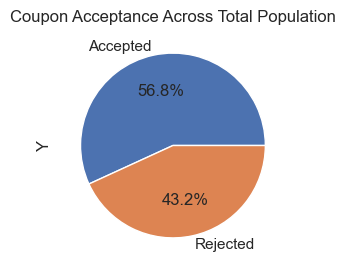

In [27]:
# First, let's identify how many customers (total population) accepted or rejected a coupon
coupon_acceptance = data["Y"].value_counts(normalize=True)

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_acceptance.plot(labels=["Accepted", "Rejected"], kind="pie", autopct='%1.1f%%')\
        .set_title("Coupon Acceptance Across Total Population");

print("Proportion of total observations that have accepted the coupon: " 
      + str(round(coupon_acceptance[1]*100)) + "%")


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Number of Coupons Offered')

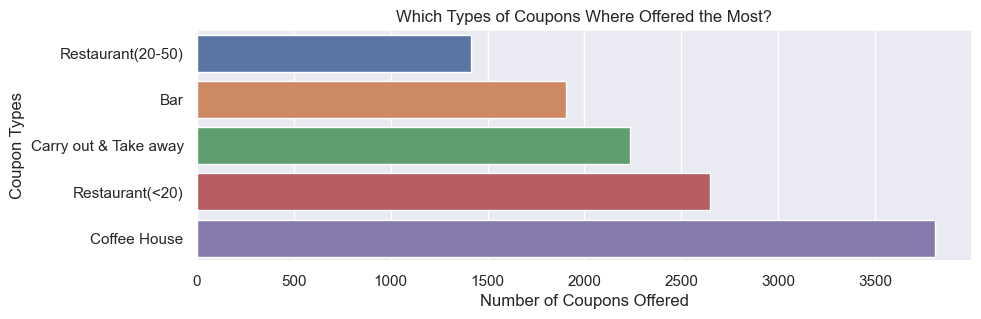

In [28]:
# Following the same procedure as above for iterative univariate analysis, focusing on `coupon` feature
# 1. get the unique value counts for the feature
# 2. push it into a dataframe
# 3. reset the index such that the values are plottable
# 4. sort values by counts to maintain visual reading consistency in each plot (ascending value counts)
coupon_values = pd.DataFrame(data["coupon"].value_counts()).reset_index().sort_values("coupon")

# Generate the plot representing value counts
plt.figure(figsize = (10,3))
sns.barplot(x="coupon", y="index", data=coupon_values, orient='h').set_title('Which Types of Coupons Where Offered the Most?')
plt.ylabel("Coupon Types")
plt.xlabel("Number of Coupons Offered")


Accepted  Rejected  Percent Accepted  Percent Rejected
coupon                                                                       
Bar                         785      1121              41.0              59.0
Carry out & Take away      1643       590              74.0              26.0
Coffee House               1888      1921              50.0              50.0
Restaurant(20-50)           631       782              45.0              55.0
Restaurant(<20)            1878       768              71.0              29.0

<Figure size 1000x800 with 0 Axes>

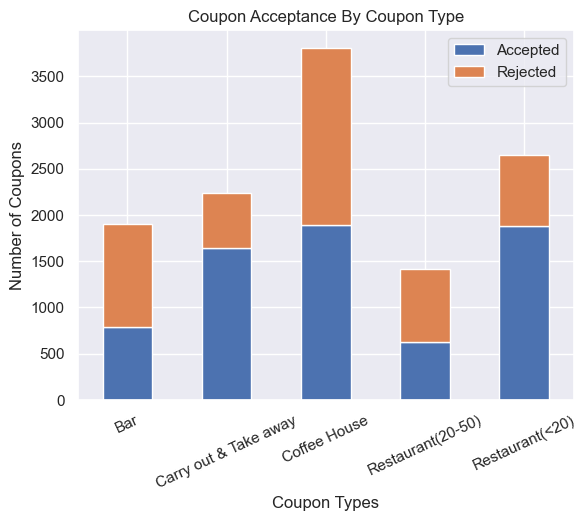

In [29]:
# Then, let's add context of how many offered, were accepted for each coupon type
# Our approach varies for Seaborn vs. Matplotlib

plt.figure(figsize = (10,8))

#/--------------- Seaborn approach -----------------/#

# Seaborn: We'll segment the data by:
# 1. Group by both `coupon` and `Y`
# 2. get the size() of each grouping as our frequency/count value to
# 3. Transform ambiguous column name for the Count
# 4. Reset the index so `coupon` types are plottable
# 5. Sort by coupon type and acceptance to keep data visually consistent
#coupon_values_accepted = pd.DataFrame(data.groupby(["coupon", "Y"]).size()).rename(columns={0:"Counts"}).reset_index().sort_values(["coupon", "Y"])

# Generate the plot representing Counts for each grouping, using Y as the *hue*
#sns.barplot(x="Counts", y="coupon", hue="Y", data=coupon_values_accepted, orient='h')\
#    .set_title('Which Types of Coupons Where Offered the Most?')

##==> No stacked barplots in Seaborn, abandoning for Matplotlib

#/--------------- Matplotlib approach ----------------/#

# Matplotlib: We'll segment the data by:
# 1. Create one dataframe querying dataset for accepted coupons, grouped by coupon
# 2. Create another dataframe querying dataset for rejected coupons, grouped by coupon
# 3. get value counts for each as the accepted and rejected frequency/counts
# 3. Transform ambiguous column name for the Accepted/Rejected, respectively
# 4. Merge both dataframes into a new dataframe to create a plottable set (merged on shared index, coupon type)
# 5. Plot as stacked bar chart, add labeling details

# Amount accepted, by coupon type
coupon_values_accepted_only = pd.DataFrame(data.query("Y == 1").groupby("coupon")["Y"].value_counts())\
                                .rename(columns={"Y":"Accepted"})

# Amount rejected, by coupon type
coupon_values_rejected_only = pd.DataFrame(data.query("Y == 0").groupby("coupon")["Y"].value_counts())\
                                .rename(columns={"Y":"Rejected"})

# Merge the temporary dataframes
coupon_values_acceptance = coupon_values_accepted_only.merge(coupon_values_rejected_only, on="coupon")
coupon_values_acceptance.plot.bar(stacked=True, title='Coupon Acceptance By Coupon Type')
plt.xlabel("Coupon Types")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=25)

# let's also look at the percentages for accepted/rejected
coupon_values_acceptance.insert(2, "Percent Accepted", round(coupon_values_acceptance["Accepted"]/(coupon_values_acceptance["Accepted"] + coupon_values_acceptance["Rejected"])*100))
coupon_values_acceptance.insert(3, "Percent Rejected", round(coupon_values_acceptance["Rejected"]/(coupon_values_acceptance["Accepted"] + coupon_values_acceptance["Rejected"])*100))
coupon_values_acceptance


6. Use a histogram to visualize the temperature column.

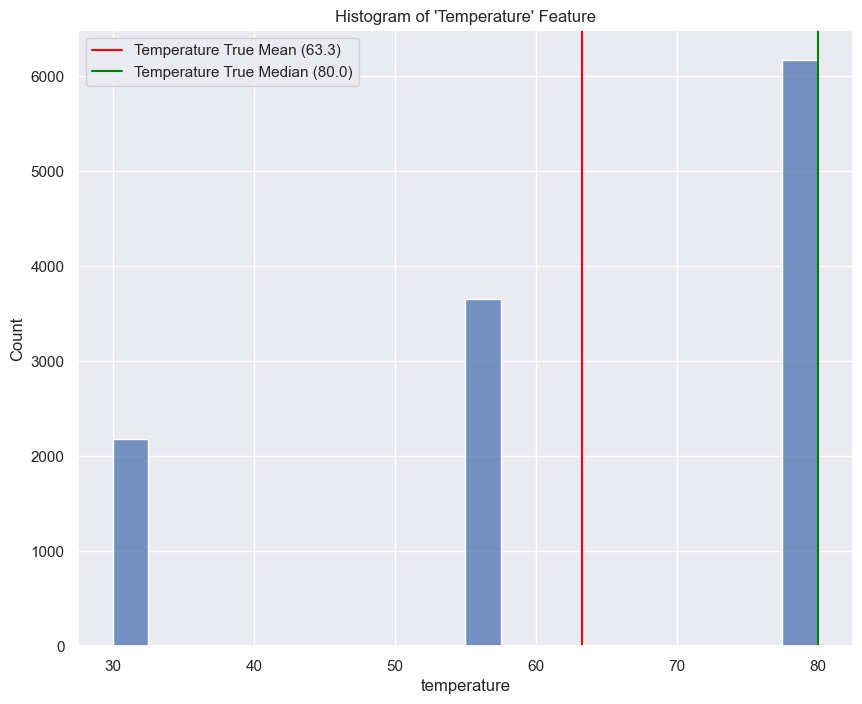

In [30]:
# Calculate the true Mean and Median for Temperature feature
hist_temperature_mean = round(data["temperature"].mean(),2)
hist_temperature_median = data["temperature"].median()

# plot histogram of 'temperature' values
plt.figure(figsize = (10,8))
sns.histplot(data["temperature"], bins=20);
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature")

plt.legend()
plt.show();

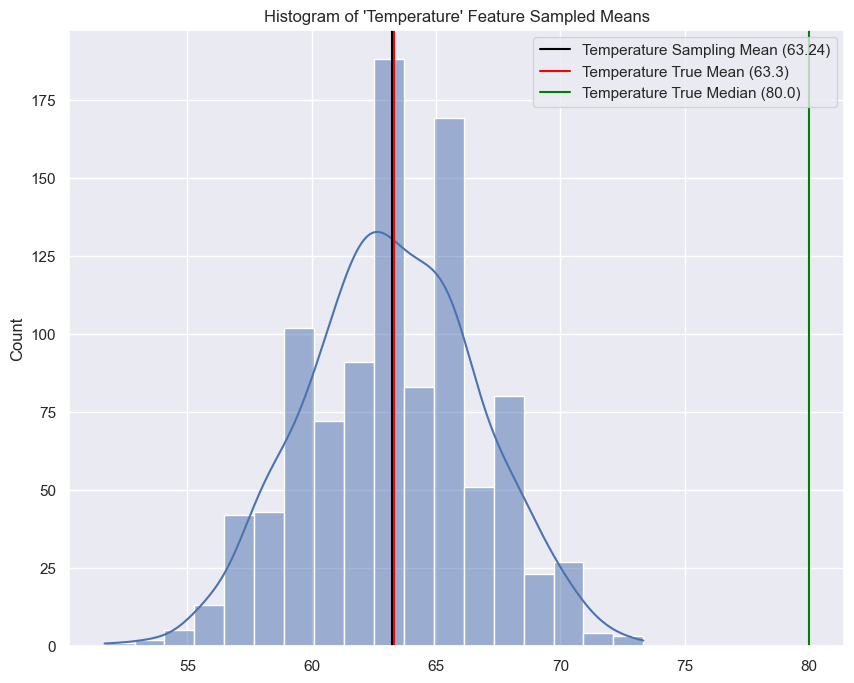

In [31]:
# defining an empty list to sample temperature means
hist_temperature_mean_list = []

# Iterate over a range to determine the sampled mean for Temperature feature (in this case, 1000 observations)
for temp_sample in range(1,1000):
        # append the mean of a sampling from the Temperature feature, 
        # in this case, 30 samples from the set
        
        hist_temperature_mean_list.append(round(data["temperature"].sample(30, random_state = temp_sample, 
            replace=True).mean(),3))
        
        
# print the mean
temp_sample_mean = round(np.mean(hist_temperature_mean_list),2)


plt.figure(figsize = (10,8))
sns.histplot(hist_temperature_mean_list, kde = True, bins = 18);
plt.axvline(x = temp_sample_mean, color = "black", label = "Temperature Sampling Mean (" + str(temp_sample_mean) + ")")
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature Sampled Means")

plt.legend()
plt.show();

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
coupon_bar = data.query('coupon == "Bar"')
coupon_bar.head()

destination  passenger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  has_children                 education  \
24   Male  21        Single             0          Bachelors degree   
35   Male  21        Single             0          Bachelors degree   
39   Male  21        Single             0          Bachelors degree   
46   Male  46        Single             0  Some college - no degree   
57   Male  46        Single             0  Some college - no degree   

                    occupation           income  car    Bar Bar_Cohort  \
24  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
35  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
39  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
46                     Student  $12500 - $24999  NaN  never       <= 3   
57                     Student  $12500 - $24999  NaN  never       <= 3   

   CoffeeHouse CoffeeHouse_Cohort CarryAway CarryAway_Cohort  \
24       less1               <= 3       4~8              > 3   
35       less1               <= 3       4~8              > 3   
39       less1               <= 3       4~8              > 3   
46         4~8                > 3       1~3             <= 3   
57         4~8                > 3       1~3             <= 3   

   RestaurantLessThan20 RestaurantLessThan20_Cohort Restaurant20To50  \
24                  4~8                         > 3            less1   
35                  4~8                         > 3            less1   
39                  4~8                         > 3            less1   
46                  1~3                        <= 3            never   
57                  1~3                        <= 3            never   

   Restaurant20To50_Cohort  toCoupon_GEQ5min  toCoupon_GEQ15min  \
24                    <= 3                 1                  0   
35                    <= 3                 1                  0   
39                    <= 3                 1                  1   
46                    <= 3                 1                  0   
57                    <= 3                 1                  0   

    toCoupon_GEQ25min  direction_same  direction_opp distanceDirection  Y  \
24                  0               0              1       5min behind  1   
35                  0               1              0        5min ahead  1   
39                  1               0              1      25min behind  1   
46                  0               0              1       5min behind  0   
57                  0               1              0        5min ahead  0   

   distanceDirectionTime distanceDirectionTimeExpiration  \
24      5min behind 10AM             5min behind 10AM 1d   
35        5min ahead 6PM               5min ahead 6PM 1d   
39      25min behind 7AM             25min behind 7AM 1d   
46      5min behind 10AM             5min behind 10AM 1d   
57        5min ahead 6PM               5min ahead 6PM 1d   

   distanceDirectionTimePassenger distanceDirectionTimePassengerCoupon  \
24     5min behind 10AM Friend(s)       5min behind 10AM Friend(s) Bar   
35           5min ahead 6PM Alone             5min ahead 6PM Alone Bar   
39         25min behind 7AM Alone           25min behind 7AM Alone Bar   
46     5min behind 10AM Friend(s)       5min behind 10AM Friend(s) Bar   
57           5min ahead 6PM Alone             5min ahead 6PM Alone Bar   

   distanceDirectionTimePassengerCouponExpiration  
24              5min behind 10AM Friend(s) Bar 1d  
35                    5min ahead 6PM Alone Bar 1d  
39             

2. What proportion of bar coupons were accepted?


---
> ##### Presumption: 
> The question asks to determine the acceptance rate for bar coupons offered to the entire data population 
---

Proportion of observations that have accepted a `Bar` coupon: 41%


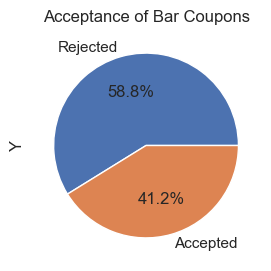

In [33]:
# As in Question (#4), let's evaluate the value distribution for coupon acceptance ("Y")
coupon_bar_accepted = coupon_bar["Y"].value_counts(normalize=True)

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_bar_accepted.plot(labels=["Rejected", "Accepted"], kind="pie", autopct='%1.1f%%')\
        .set_title("Acceptance of Bar Coupons");

print("Proportion of observations that have accepted a `Bar` coupon: " 
      + str(round(coupon_bar_accepted[1]*100)) + "%")

---
> ##### Insight:
Of the total population of drivers that were served a bar coupon, *less than half (~41%) accepted the coupon*
---

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

---
> ##### Presumption: 
> While not explicitly stated above, the approaches below presume all `Bar` visit ranges are in the context of a ___"monthly"___ time frame
>
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 3 or less bar visits/month
---

In [34]:
# First let's remind ourselves what the "Bar" column looks like:
coupon_bar["Bar"].value_counts()

never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

Ratio of coupon acceptance rates for those that visited a bar '> 3' versus '<= 3' is: 2


Cohort  Accepted  Total  Acceptance Percentage
0   <= 3       638   1713              37.244600
1    > 3       147    193              76.165803

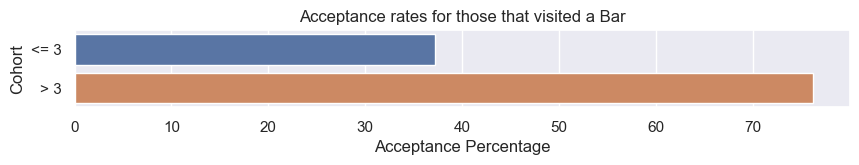

In [35]:
# Using the `Bar_Cohorts` column created above,
# query the bar coupon data for acceptance rate for "> 3" population
bar_cohorts_gt3_accepted = len(coupon_bar.query("Bar_Cohort == '> 3' and Y == 1"))
bar_cohorts_gt3_total = len(coupon_bar.query("Bar_Cohort == '> 3'"))
bar_cohorts_gt3_acceptance_rate = bar_cohorts_gt3_accepted / bar_cohorts_gt3_total * 100

# Query the bar coupon data for acceptance rate for "<= 3" population
bar_cohorts_lte3_accepted = len(coupon_bar.query("Bar_Cohort == '<= 3' and Y == 1"))
bar_cohorts_lte3_total = len(coupon_bar.query("Bar_Cohort == '<= 3'"))
bar_cohorts_lte3_acceptance_rate = bar_cohorts_lte3_accepted / bar_cohorts_lte3_total * 100

# Create a new dataframe with accepted, total, and acceptance rate 
# for both populations to understand how they compare

bar_cohorts_compare_acceptance = pd.DataFrame(
            data = {"Cohort":["<= 3", "> 3"],
                    "Accepted":[bar_cohorts_lte3_accepted, bar_cohorts_gt3_accepted],
                    "Total":[bar_cohorts_lte3_total, bar_cohorts_gt3_total],
                    "Acceptance Percentage":[bar_cohorts_lte3_acceptance_rate, bar_cohorts_gt3_acceptance_rate]
                   })

plt.figure(figsize=(10,1))
sns.barplot(data=bar_cohorts_compare_acceptance, y="Cohort", x="Acceptance Percentage", orient="h").set_title("Acceptance rates for those that visited a Bar")
print("Ratio of coupon acceptance rates for those that visited a bar '> 3' versus '<= 3' is: " + str(round(bar_cohorts_gt3_acceptance_rate/bar_cohorts_lte3_acceptance_rate)))
bar_cohorts_compare_acceptance


---
> ##### Insight:
Drivers that visit a bar more than three times per month are **twice as likely to accept a "bar" coupon** than those that visit a bar three or less times a month.
---

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 1+ bar visits/month
> * 25+ years old
---

In [36]:
# Let's remind ourselves what unique values we have for `age`:
coupon_bar["age"].value_counts().sort_index()

21         397
26         368
31         321
36         196
41         171
46          99
50plus     273
below21     81
Name: age, dtype: int64

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 2.0


Y           Total Coupons Offered  Coupons Rejected  Coupons Accepted  \
Cohort                        403               125               278   
Non-Cohort                   1503               996               507   
Total                        1906              1121               785   

Y           Acceptance Rate (%)  
Cohort                     69.0  
Non-Cohort                 33.7  
Total                      41.2

<Figure size 1500x600 with 0 Axes>

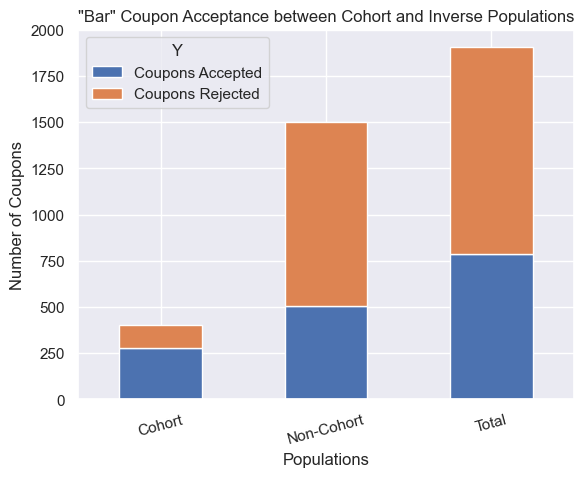

In [37]:
# Instead of creating a new column for this cohort, let's just query the parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"
cohort_age_lt25 = ["below21", "21"] # values that should be *excluded* as "25yo or less"

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_gt1_25 = coupon_bar.query("Bar in @cohort_bar_gte1 and age not in @cohort_age_lt25")\
        .groupby("Y").size()
bar_cohorts_gt1_25 = pd.DataFrame(list_bar_cohorts_gt1_25).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts_gt1_25
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts_gt1_25, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 0)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers over 25 years of age that visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that are younger than 25 and visit a bar less frequently.
---

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 1+ bar visits/month
> * passenger was not a "Kid"
> * occupation was not "farming, fishing, forestry"
---

In [38]:
# Let's remind ourselves of the unique values for `passenger`
coupon_bar["passenger"].value_counts()

Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: passenger, dtype: int64

In [39]:
# Let's remind ourselves of the unique values for `occupation`
coupon_bar["occupation"].value_counts()

Unemployed                                   292
Student                                      237
Computer & Mathematical                      222
Sales & Related                              175
Education&Training&Library                   125
Management                                   104
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 2.0


Y           Total Coupons Offered  Coupons Rejected  Coupons Accepted  \
Cohort                        189                54               135   
Non-Cohort                   1717              1067               650   
Total                        1906              1121               785   

Y           Acceptance Rate (%)  
Cohort                     71.4  
Non-Cohort                 37.9  
Total                      41.2

<Figure size 1500x600 with 0 Axes>

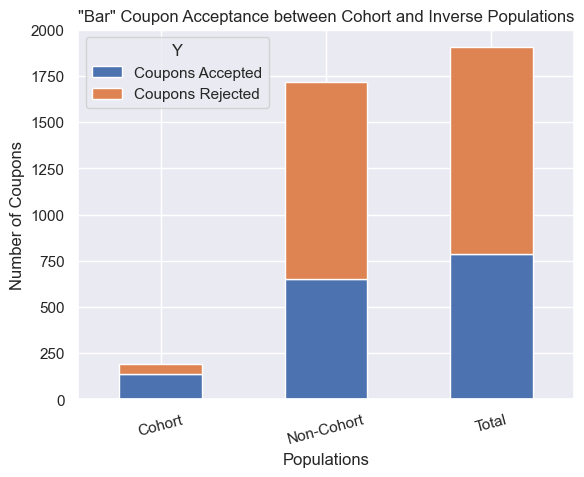

In [40]:
# As before, let's just query the cohort parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"r less"
cohort_passenger_adult = ["Friend(s)", "Partner"] # exclude kid, and also "Alone" as a passenger is indicated
cohort_occupation_not_fff = ["Farming Fishing & Forestry"] # exclusion list for occupation

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts = coupon_bar.query("Bar in @cohort_bar_gte1 \
        and passenger in @cohort_passenger_adult \
        and occupation not in @cohort_occupation_not_fff")\
        .groupby("Y").size()

bar_cohorts = pd.DataFrame(list_bar_cohorts).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 0)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers who didn't work in Farming/Fishing/Forestry, were travelling with an adult passenger, and visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that worked in Farming/Fishing/Forestry, were travelling either alone or with kids, and visited a bar less than once a month.
---

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population (an aggregation of three sub-populations, "or"), against it's inverse set:
> * sub-population 1:
>   * 1+ bar visits/month
>   * passenger was not a "Kid"
>   * marital status was not widowed
> * sub-population 2:
>   * 1+ bar visits/month
>   * less than 30 years of age
> * sub-population 3:
>   * 5+ visits/month to cheap restaurants (RestaurantLessThan20)
>   * Makes less than 50K income
---

In [41]:
# Let's remind ourselves of the unique values for `maritalStatus`
coupon_bar["maritalStatus"].value_counts()

Married partner      826
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [42]:
# Let's remind ourselves of the unique values for `RestaurantLessThan20`
coupon_bar["RestaurantLessThan20"].value_counts()

1~3      839
4~8      545
less1    308
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

In [43]:
# Let's remind ourselves of the unique values for `income`
coupon_bar["income"].value_counts().sort_index()

$100000 or More     279
$12500 - $24999     271
$25000 - $37499     300
$37500 - $49999     247
$50000 - $62499     249
$62500 - $74999     129
$75000 - $87499     143
$87500 - $99999     129
Less than $12500    159
Name: income, dtype: int64

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 1.43


Y           Total Coupons Offered  Coupons Rejected  Coupons Accepted  \
Cohort                        995               516               479   
Non-Cohort                    911               605               306   
Total                        1906              1121               785   

Y           Acceptance Rate (%)  
Cohort                     48.1  
Non-Cohort                 33.6  
Total                      41.2

<Figure size 1500x600 with 0 Axes>

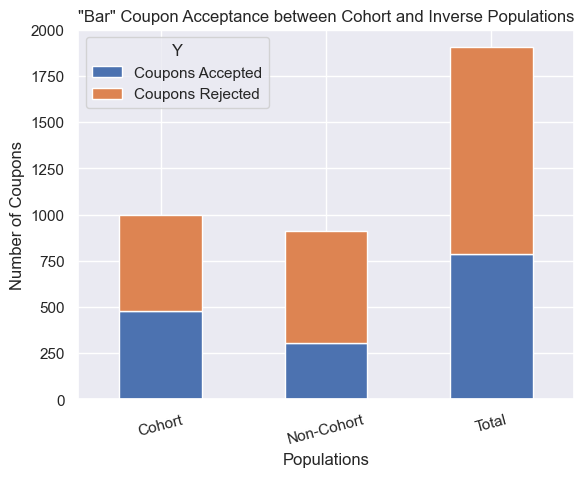

In [44]:
# As before, let's just query the cohort parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"r less"
cohort_passenger_adult = ["Friend(s)", "Partner"] # exclude kid, and also "Alone" as a passenger is indicated
cohort_marital_widow = ["Widowed"] # exclusion list for maritalStatus
cohort_age_lt30 = ["below21", "21", "26"] # inclusion list for age
cohort_cheap_eats_gt4 = ["1~3", "4~8", "gt8"] # values included as more than 4 visits to RestaurantLessThan20
# values included income less than 50K
cohort_income_lt50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"] 

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts = coupon_bar.query(
    "(Bar in @cohort_bar_gte1 \
        and passenger in @cohort_passenger_adult \
        and maritalStatus not in @cohort_marital_widow) \
    or \
     (Bar in @cohort_bar_gte1 \
         and age in @cohort_age_lt30) \
    or \
     (RestaurantLessThan20 in @cohort_cheap_eats_gt4 \
         and income in @cohort_income_lt50k)")\
        .groupby("Y").size()

bar_cohorts = pd.DataFrame(list_bar_cohorts).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)
bar_cohorts_acceptance.rename({"Y":"Populations"}, inplace=True)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 2)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers who fit any of the three cohorts were **1.4 times as likely to accept a "bar" coupon** than those that were not in any.
---

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

---
> * Of the total population of drivers that were served a bar coupon, *less than half (~41%) accepted the coupon.*
> * Drivers that visit a bar more than three times per month are **twice as likely to accept a "bar" coupon** than those that visit a bar three or less times a month.
> * Drivers over 25 years of age that visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that are younger than 25 and visit a bar less frequently.
> * Drivers who didn't work in Farming/Fishing/Forestry, were travelling with an adult passenger, and visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that worked in Farming/Fishing/Forestry, were travelling either alone or with kids, and visited a bar less than once a month.
> * Drivers who fit any of the following three cohorts were **1.4 times as likely to accept a "bar" coupon** than those that were not in any.
>   * go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
>   * go to bars more than once a month and are under the age of 30 OR
>   * go to cheap restaurants more than 4 times a month and income is less than 50K.
---

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

---
> ##### Coupon Group Selection:
From our bivariate and multivariate analyses above, the "Carry out / Take away" and "Restaurant(<20)" coupon types appear to have higher acceptance rates, let's pick "Restaurant(<20)" to explore further.
---

In [45]:
# Create new dataframe for cheap restaurants
#coupon_cheap_eats = data.query('coupon == "Restaurant(<20)"')
coupon_cheap_eats = data.query('coupon == "Bar"')
coupon_cheap_eats.head()

destination  passenger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  has_children                 education  \
24   Male  21        Single             0          Bachelors degree   
35   Male  21        Single             0          Bachelors degree   
39   Male  21        Single             0          Bachelors degree   
46   Male  46        Single             0  Some college - no degree   
57   Male  46        Single             0  Some college - no degree   

                    occupation           income  car    Bar Bar_Cohort  \
24  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
35  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
39  Architecture & Engineering  $62500 - $74999  NaN  never       <= 3   
46                     Student  $12500 - $24999  NaN  never       <= 3   
57                     Student  $12500 - $24999  NaN  never       <= 3   

   CoffeeHouse CoffeeHouse_Cohort CarryAway CarryAway_Cohort  \
24       less1               <= 3       4~8              > 3   
35       less1               <= 3       4~8              > 3   
39       less1               <= 3       4~8              > 3   
46         4~8                > 3       1~3             <= 3   
57         4~8                > 3       1~3             <= 3   

   RestaurantLessThan20 RestaurantLessThan20_Cohort Restaurant20To50  \
24                  4~8                         > 3            less1   
35                  4~8                         > 3            less1   
39                  4~8                         > 3            less1   
46                  1~3                        <= 3            never   
57                  1~3                        <= 3            never   

   Restaurant20To50_Cohort  toCoupon_GEQ5min  toCoupon_GEQ15min  \
24                    <= 3                 1                  0   
35                    <= 3                 1                  0   
39                    <= 3                 1                  1   
46                    <= 3                 1                  0   
57                    <= 3                 1                  0   

    toCoupon_GEQ25min  direction_same  direction_opp distanceDirection  Y  \
24                  0               0              1       5min behind  1   
35                  0               1              0        5min ahead  1   
39                  1               0              1      25min behind  1   
46                  0               0              1       5min behind  0   
57                  0               1              0        5min ahead  0   

   distanceDirectionTime distanceDirectionTimeExpiration  \
24      5min behind 10AM             5min behind 10AM 1d   
35        5min ahead 6PM               5min ahead 6PM 1d   
39      25min behind 7AM             25min behind 7AM 1d   
46      5min behind 10AM             5min behind 10AM 1d   
57        5min ahead 6PM               5min ahead 6PM 1d   

   distanceDirectionTimePassenger distanceDirectionTimePassengerCoupon  \
24     5min behind 10AM Friend(s)       5min behind 10AM Friend(s) Bar   
35           5min ahead 6PM Alone             5min ahead 6PM Alone Bar   
39         25min behind 7AM Alone           25min behind 7AM Alone Bar   
46     5min behind 10AM Friend(s)       5min behind 10AM Friend(s) Bar   
57           5min ahead 6PM Alone             5min ahead 6PM Alone Bar   

   distanceDirectionTimePassengerCouponExpiration  
24              5min behind 10AM Friend(s) Bar 1d  
35                    5min ahead 6PM Alone Bar 1d  
39             


/────────────────────────────────────────  Feature: DESTINATION  ────────────────────────────────────────/

|    | Values for "destination"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  0 | Home                       |        217 |        263 |             480 |                    45 |
|  1 | No Urgent Place            |        398 |        566 |             964 |                    41 |
|  2 | Work                       |        170 |        292 |             462 |                    37 |


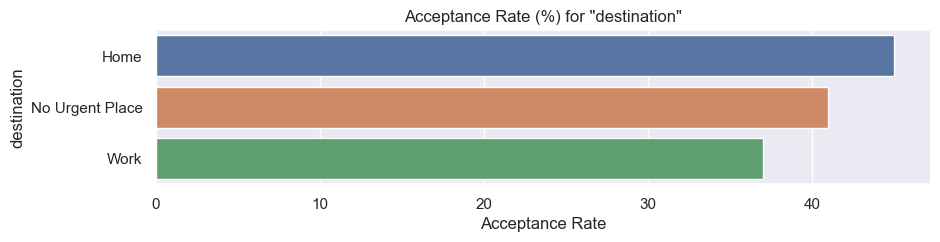

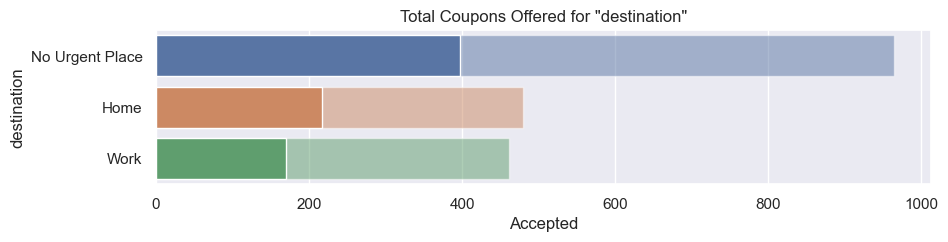


/────────────────────────────────────────  Feature: PASSENGER  ────────────────────────────────────────/

|    | Values for "passenger"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------+------------+------------+-----------------+-----------------------|
|  1 | Friend(s)                |        179 |        137 |             316 |                    57 |
|  0 | Alone                    |        466 |        673 |            1139 |                    41 |
|  3 | Partner                  |        100 |        159 |             259 |                    39 |
|  2 | Kid(s)                   |         40 |        152 |             192 |                    21 |


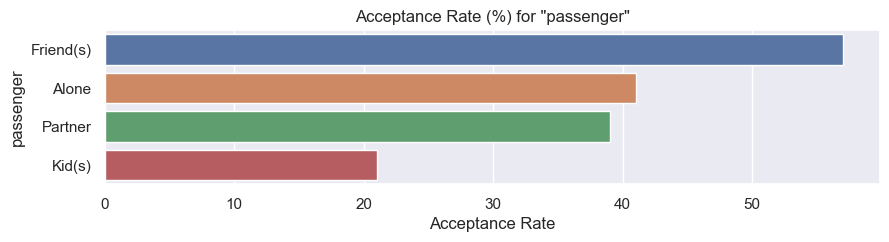

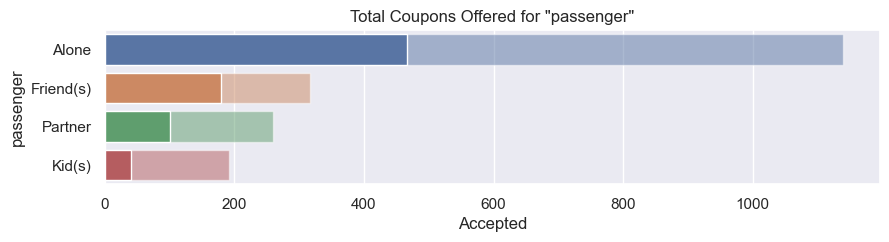


/────────────────────────────────────────  Feature: WEATHER  ────────────────────────────────────────/

|    | Values for "weather"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------+------------+------------+-----------------+-----------------------|
|  2 | Sunny                  |        565 |        711 |            1276 |                    44 |
|  0 | Rainy                  |        147 |        258 |             405 |                    36 |
|  1 | Snowy                  |         73 |        152 |             225 |                    32 |


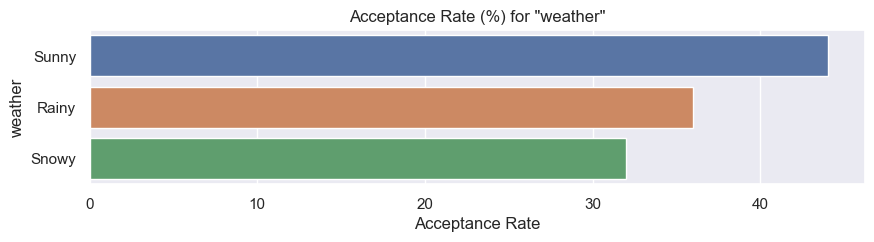

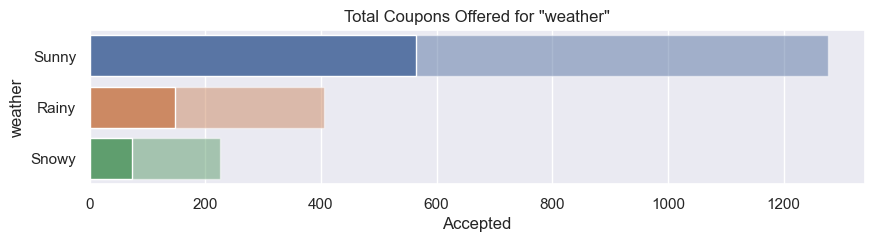


/────────────────────────────────────────  Feature: TEMPERATURE  ────────────────────────────────────────/

|    |   Values for "temperature" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  1 |                         55 |        409 |        501 |             910 |                    45 |
|  2 |                         80 |        245 |        353 |             598 |                    41 |
|  0 |                         30 |        131 |        267 |             398 |                    33 |


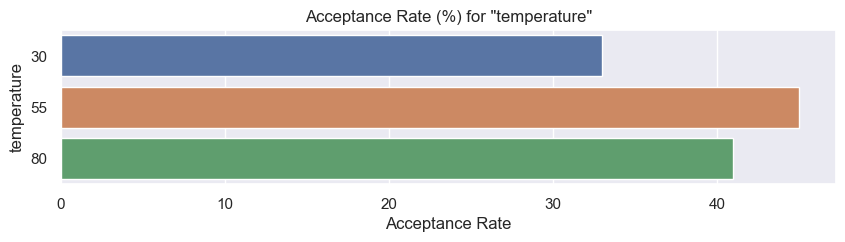

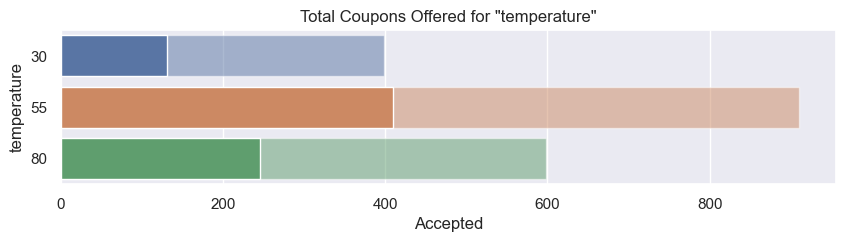


/────────────────────────────────────────  Feature: TIME  ────────────────────────────────────────/

|    | Values for "time"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------+------------+------------+-----------------+-----------------------|
|  1 | 10PM                |        176 |        203 |             379 |                    46 |
|  3 | 6PM                 |        248 |        288 |             536 |                    46 |
|  0 | 10AM                |        153 |        263 |             416 |                    37 |
|  4 | 7AM                 |        170 |        292 |             462 |                    37 |
|  2 | 2PM                 |         38 |         75 |             113 |                    34 |


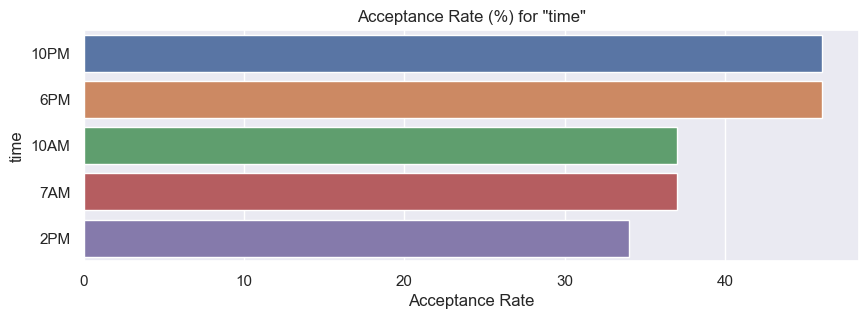

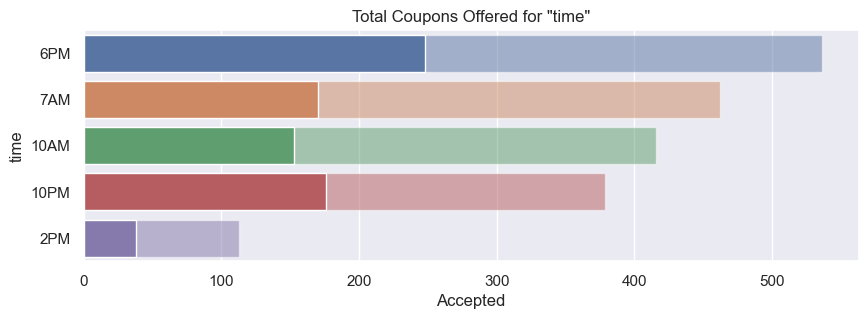


/────────────────────────────────────────  Feature: COUPON  ────────────────────────────────────────/

|    | Values for "coupon"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  0 | Bar                   |        785 |       1121 |            1906 |                    41 |


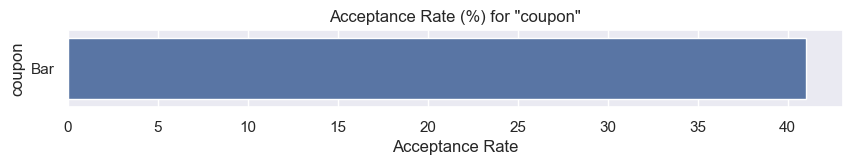

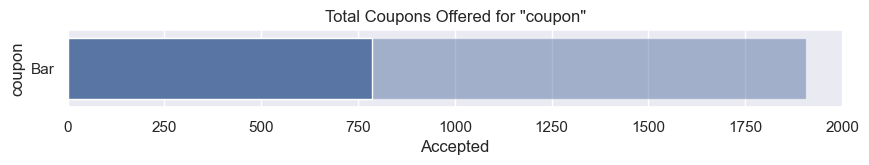


/────────────────────────────────────────  Feature: EXPIRATION  ────────────────────────────────────────/

|    | Values for "expiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------+------------+------------+-----------------+-----------------------|
|  0 | 1d                        |        612 |        861 |            1473 |                    42 |
|  1 | 2h                        |        173 |        260 |             433 |                    40 |


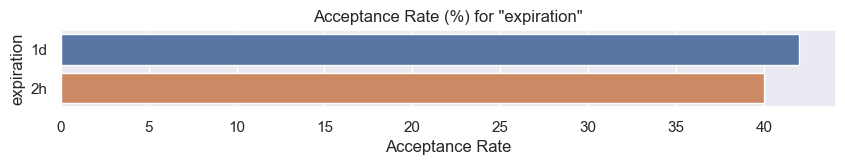

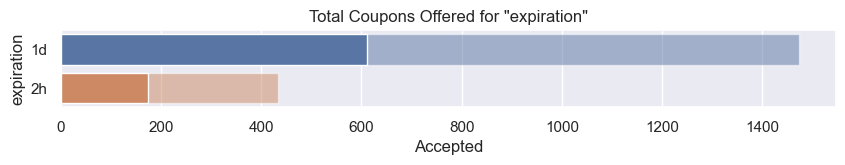


/────────────────────────────────────────  Feature: GENDER  ────────────────────────────────────────/

|    | Values for "gender"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  1 | Male                  |        447 |        470 |             917 |                    49 |
|  0 | Female                |        338 |        651 |             989 |                    34 |


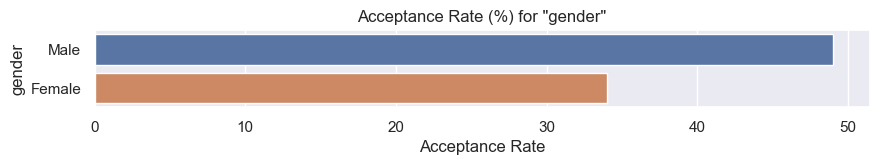

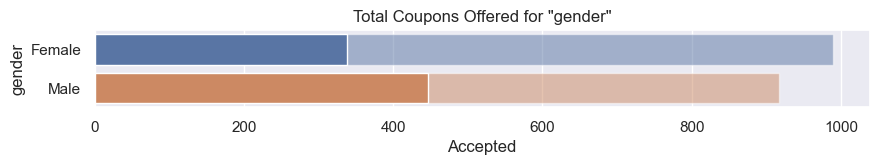


/────────────────────────────────────────  Feature: AGE  ────────────────────────────────────────/

|    | Values for "age"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------+------------+------------+-----------------+-----------------------|
|  0 | 21                 |        200 |        197 |             397 |                    50 |
|  1 | 26                 |        179 |        189 |             368 |                    49 |
|  4 | 41                 |         75 |         96 |             171 |                    44 |
|  7 | below21            |         34 |         47 |              81 |                    42 |
|  2 | 31                 |        121 |        200 |             321 |                    38 |
|  5 | 46                 |         36 |         63 |              99 |                    36 |
|  3 | 36                 |         60 |        136 |             196 |                    31 |
|  6 | 50plus             |        

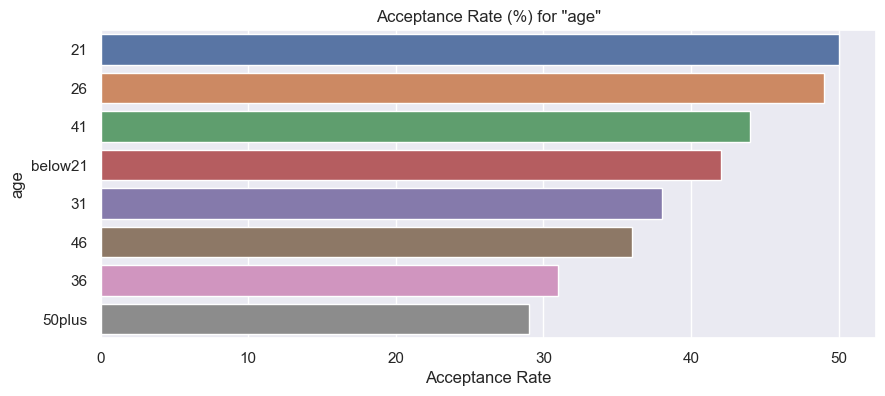

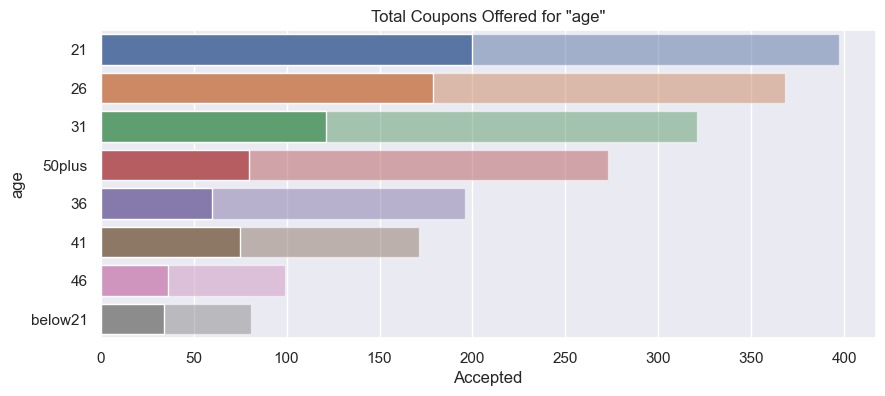


/────────────────────────────────────────  Feature: MARITALSTATUS  ────────────────────────────────────────/

|    | Values for "maritalStatus"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------+------------+------------+-----------------+-----------------------|
|  2 | Single                       |        353 |        285 |             638 |                    55 |
|  4 | Widowed                      |          7 |         10 |              17 |                    41 |
|  3 | Unmarried partner            |        140 |        212 |             352 |                    40 |
|  1 | Married partner              |        268 |        558 |             826 |                    32 |
|  0 | Divorced                     |         17 |         56 |              73 |                    23 |


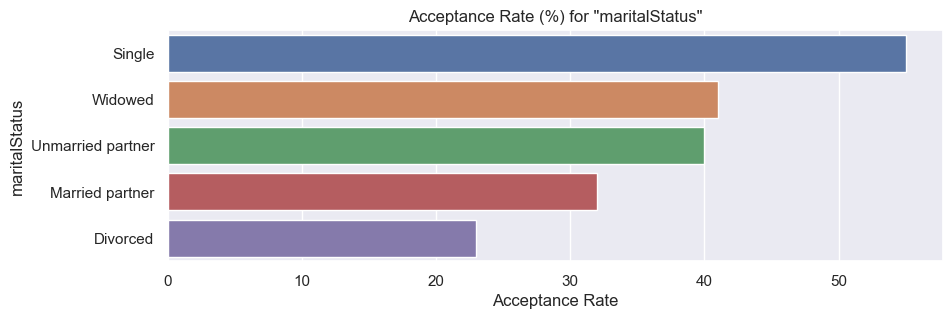

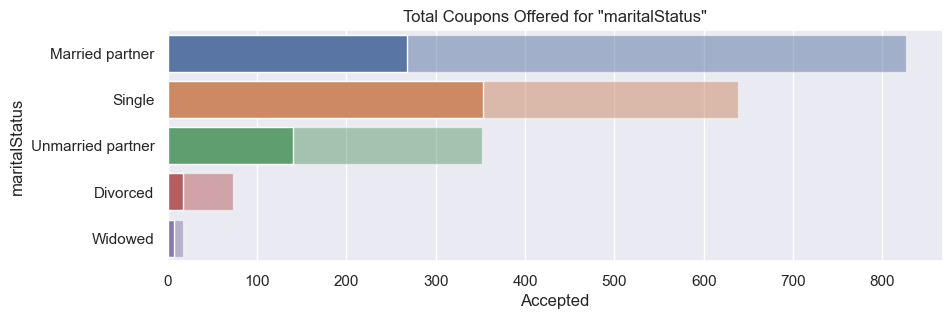


/────────────────────────────────────────  Feature: HAS_CHILDREN  ────────────────────────────────────────/

|    |   Values for "has_children" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------+------------+------------+-----------------+-----------------------|
|  0 |                           0 |        544 |        548 |            1092 |                    50 |
|  1 |                           1 |        241 |        573 |             814 |                    30 |


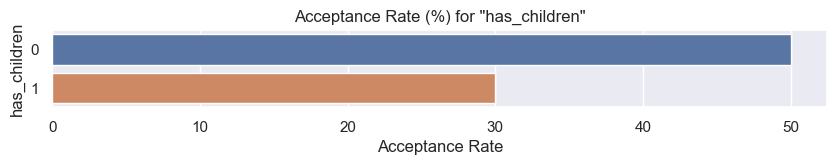

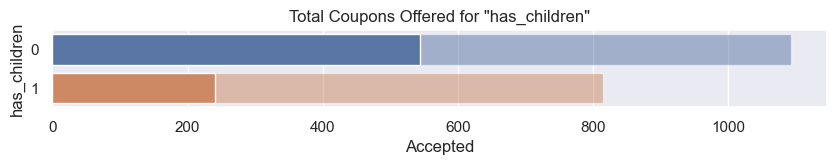


/────────────────────────────────────────  Feature: EDUCATION  ────────────────────────────────────────/

|    | Values for "education"                 |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------------+------------+------------+-----------------+-----------------------|
|  4 | Some High School                       |         11 |          3 |              14 |                    79 |
|  5 | Some college - no degree               |        306 |        377 |             683 |                    45 |
|  1 | Bachelors degree                       |        262 |        369 |             631 |                    42 |
|  3 | High School Graduate                   |         58 |         85 |             143 |                    41 |
|  2 | Graduate degree (Masters or Doctorate) |         95 |        163 |             258 |                    37 |
|  0 | Associates degree                      |         53 |        124 |        

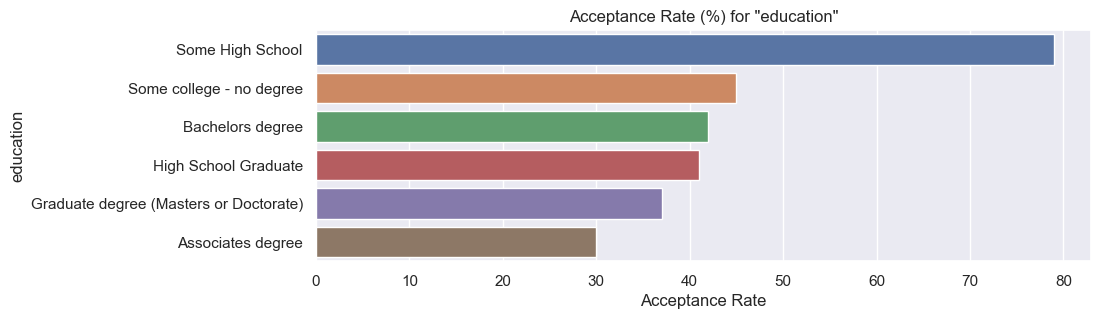

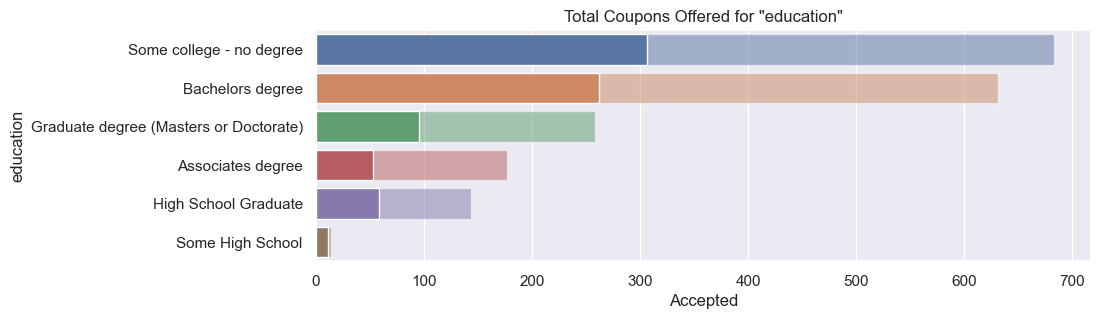


/────────────────────────────────────────  Feature: OCCUPATION  ────────────────────────────────────────/

|    | Values for "occupation"                   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------------------+------------+------------+-----------------+-----------------------|
| 18 | Production Occupations                    |         11 |          5 |              16 |                    69 |
|  0 | Architecture & Engineering                |         18 |          9 |              27 |                    67 |
| 11 | Healthcare Support                        |         29 |         15 |              44 |                    66 |
| 14 | Life Physical Social Science              |         15 |          9 |              24 |                    62 |
| 15 | Management                                |         58 |         46 |             104 |                    56 |
|  6 | Construction & Extraction                 |         

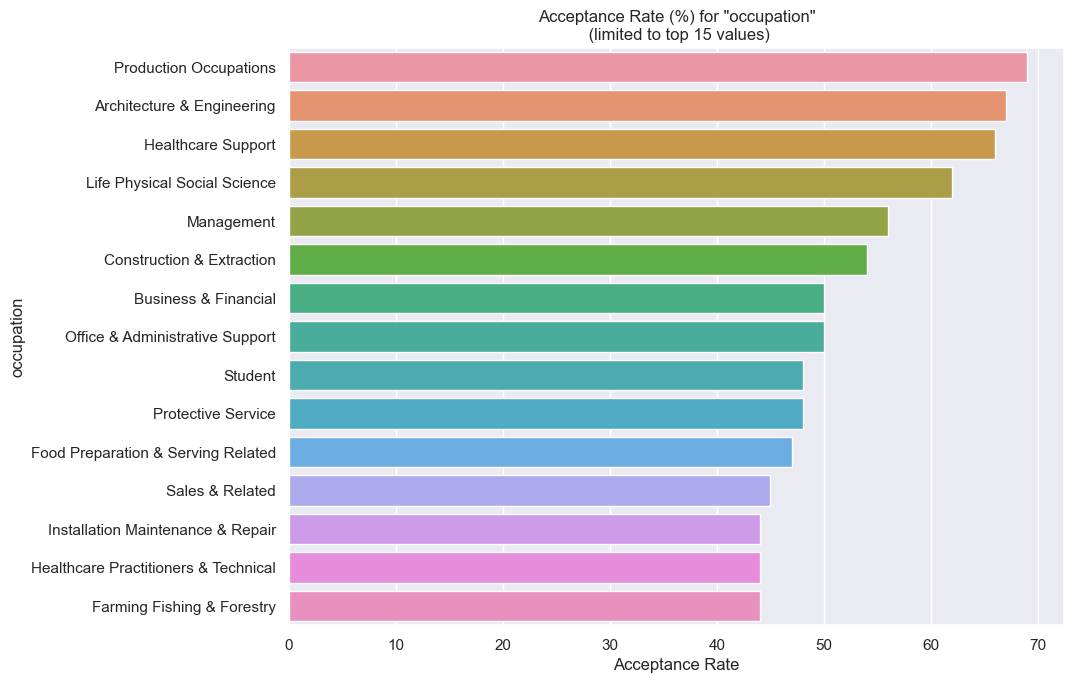

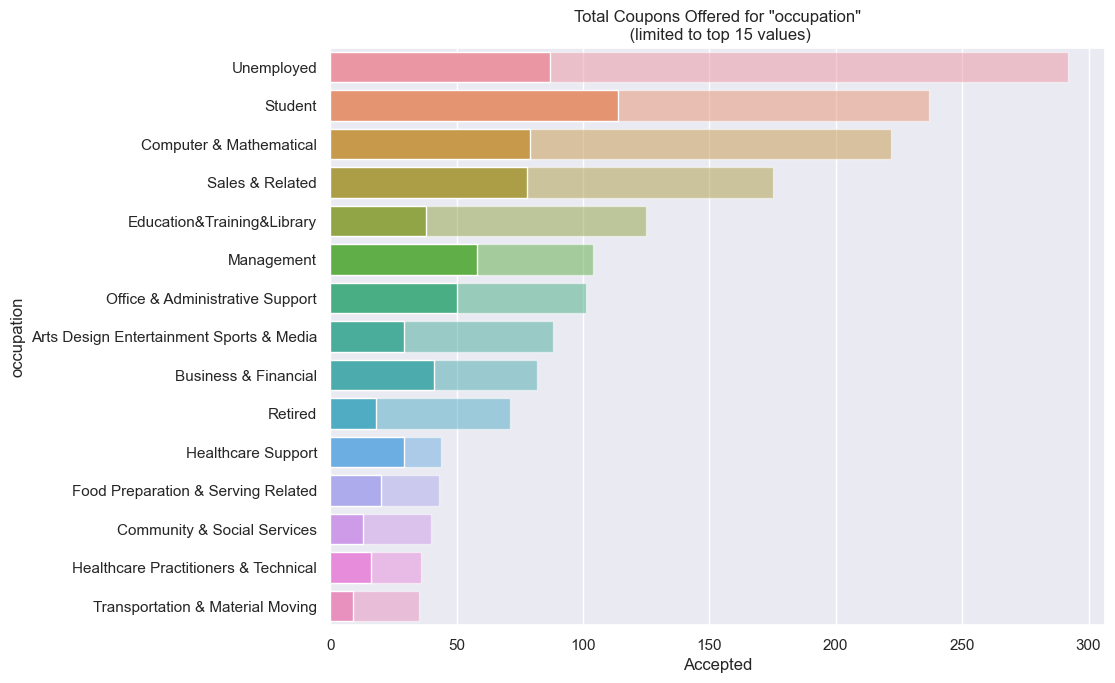


/────────────────────────────────────────  Feature: INCOME  ────────────────────────────────────────/

|    | Values for "income"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------+------------+------------+-----------------+-----------------------|
|  0 | $100000 or More       |        134 |        145 |             279 |                    48 |
|  8 | Less than $12500      |         73 |         86 |             159 |                    46 |
|  2 | $25000 - $37499       |        136 |        164 |             300 |                    45 |
|  1 | $12500 - $24999       |        114 |        157 |             271 |                    42 |
|  4 | $50000 - $62499       |        101 |        148 |             249 |                    41 |
|  6 | $75000 - $87499       |         54 |         89 |             143 |                    38 |
|  3 | $37500 - $49999       |         90 |        157 |             247 |                    36 |
|  5 

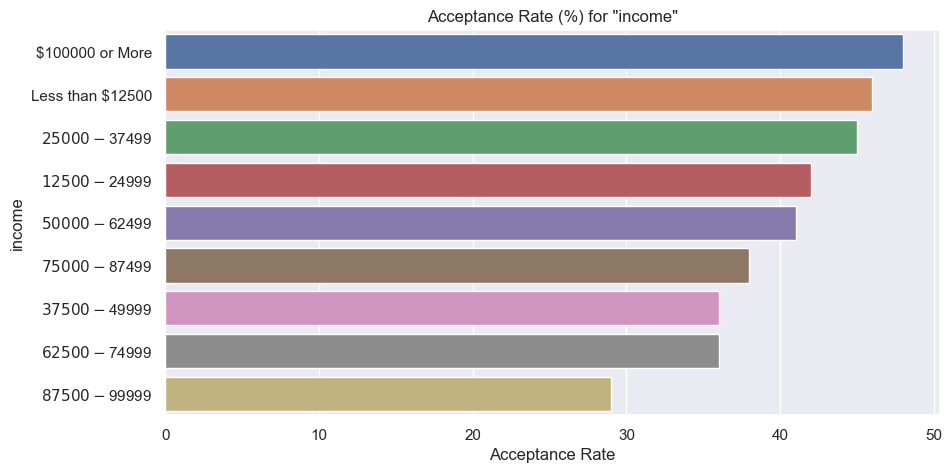

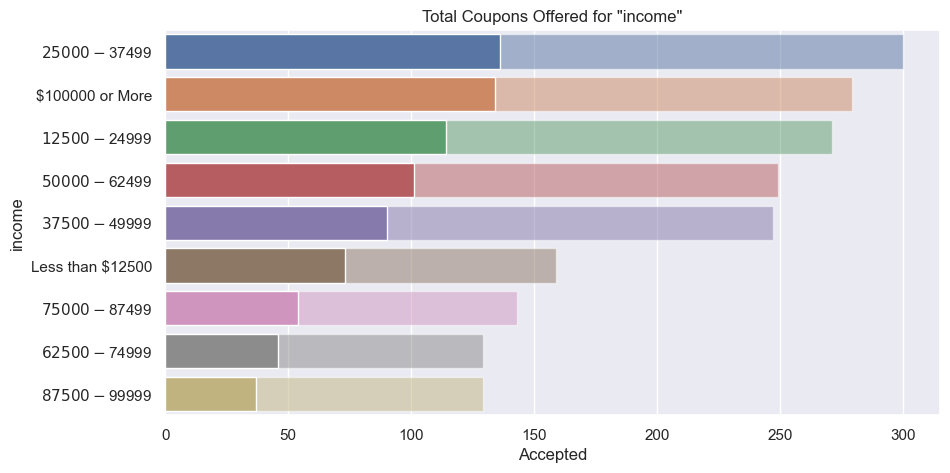


/────────────────────────────────────────  Feature: CAR  ────────────────────────────────────────/

|    | Values for "car"       |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------+------------+------------+-----------------+-----------------------|
|  0 | Scooter and motorcycle |          1 |          2 |               3 |                    33 |


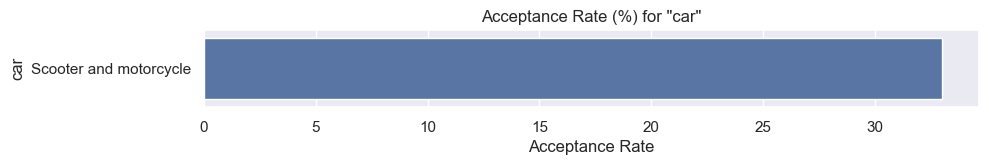

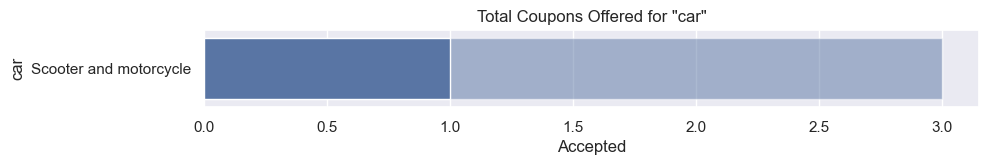


/────────────────────────────────────────  Feature: BAR  ────────────────────────────────────────/

|    | Values for "Bar"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------+------------+------------+-----------------+-----------------------|
|  1 | 4~8                |        114 |         33 |             147 |                    78 |
|  2 | gt8                |         33 |         13 |              46 |                    72 |
|  0 | 1~3                |        245 |        134 |             379 |                    65 |
|  3 | less1              |        244 |        302 |             546 |                    45 |
|  4 | never              |        149 |        639 |             788 |                    19 |


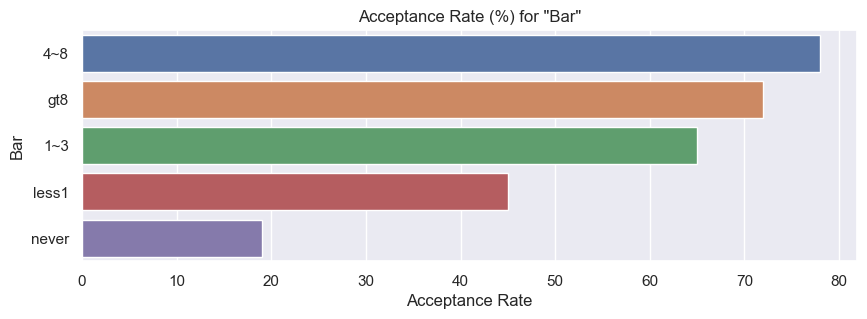

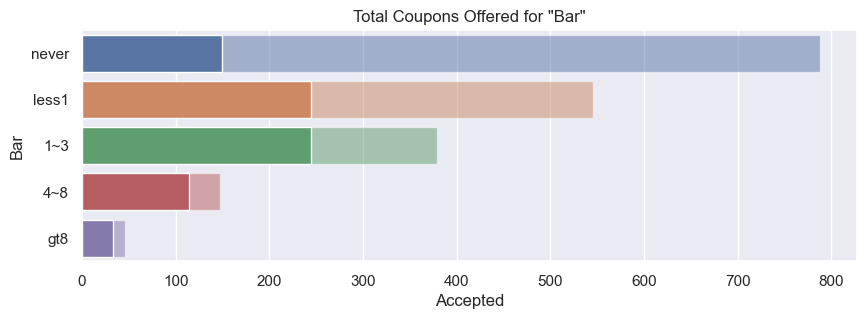


/────────────────────────────────────────  Feature: BAR_COHORT  ────────────────────────────────────────/

|    | Values for "Bar_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                       |        147 |         46 |             193 |                    76 |
|  0 | <= 3                      |        638 |       1075 |            1713 |                    37 |


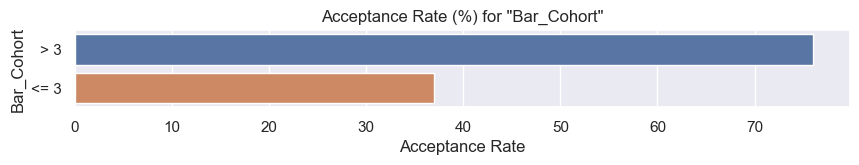

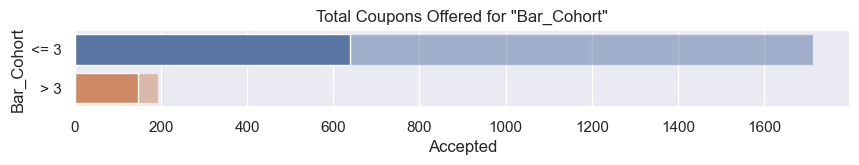


/────────────────────────────────────────  Feature: COFFEEHOUSE  ────────────────────────────────────────/

|    | Values for "CoffeeHouse"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------+------------+------------+-----------------+-----------------------|
|  0 | 1~3                        |        224 |        262 |             486 |                    46 |
|  1 | 4~8                        |        122 |        145 |             267 |                    46 |
|  2 | gt8                        |         78 |         96 |             174 |                    45 |
|  3 | less1                      |        201 |        331 |             532 |                    38 |
|  4 | never                      |        160 |        287 |             447 |                    36 |


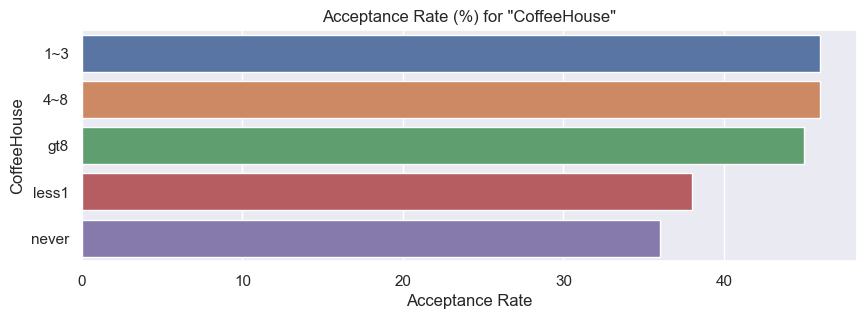

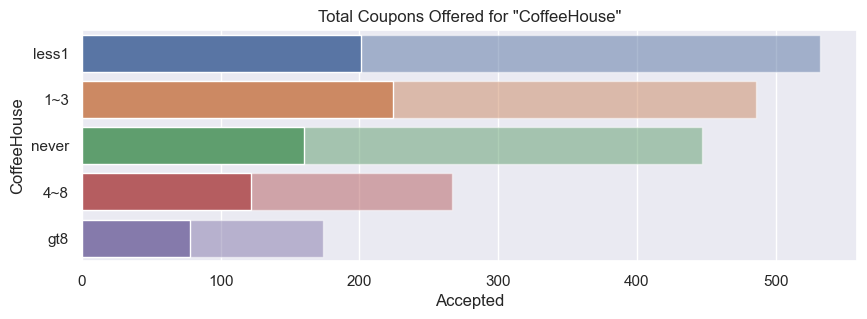


/────────────────────────────────────────  Feature: COFFEEHOUSE_COHORT  ────────────────────────────────────────/

|    | Values for "CoffeeHouse_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                               |        200 |        241 |             441 |                    45 |
|  0 | <= 3                              |        585 |        880 |            1465 |                    40 |


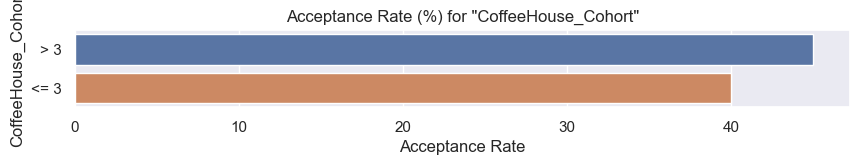

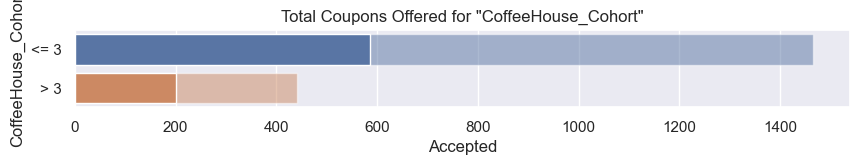


/────────────────────────────────────────  Feature: CARRYAWAY  ────────────────────────────────────────/

|    | Values for "CarryAway"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------+------------+------------+-----------------+-----------------------|
|  2 | gt8                      |        109 |        143 |             252 |                    43 |
|  1 | 4~8                      |        271 |        369 |             640 |                    42 |
|  0 | 1~3                      |        292 |        413 |             705 |                    41 |
|  3 | less1                    |        109 |        177 |             286 |                    38 |
|  4 | never                    |          4 |         19 |              23 |                    17 |


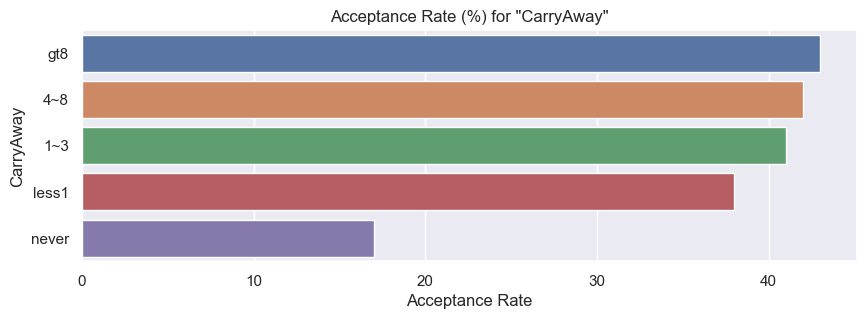

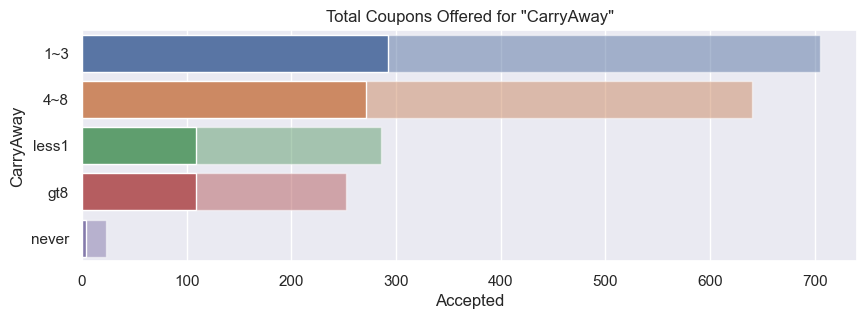


/────────────────────────────────────────  Feature: CARRYAWAY_COHORT  ────────────────────────────────────────/

|    | Values for "CarryAway_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                             |        380 |        512 |             892 |                    43 |
|  0 | <= 3                            |        405 |        609 |            1014 |                    40 |


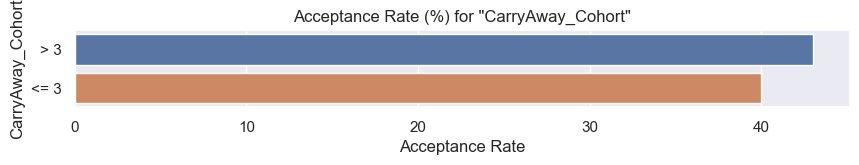

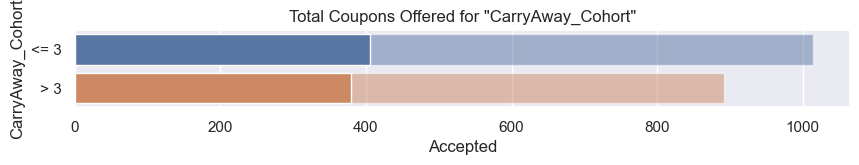


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20  ────────────────────────────────────────/

|    | Values for "RestaurantLessThan20"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------------+------------+------------+-----------------+-----------------------|
|  4 | never                               |         16 |         12 |              28 |                    57 |
|  2 | gt8                                 |         85 |        101 |             186 |                    46 |
|  1 | 4~8                                 |        229 |        316 |             545 |                    42 |
|  0 | 1~3                                 |        338 |        501 |             839 |                    40 |
|  3 | less1                               |        117 |        191 |             308 |                    38 |


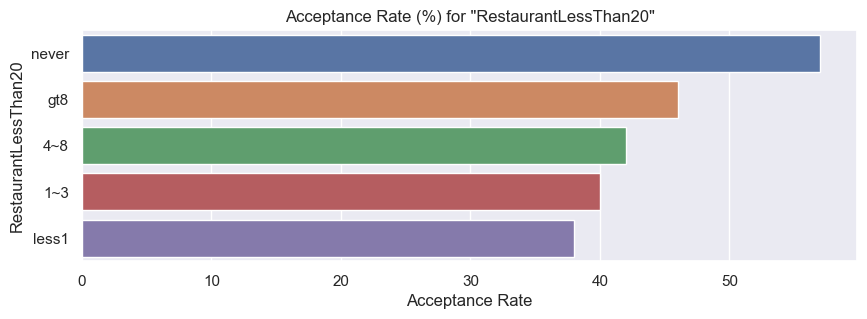

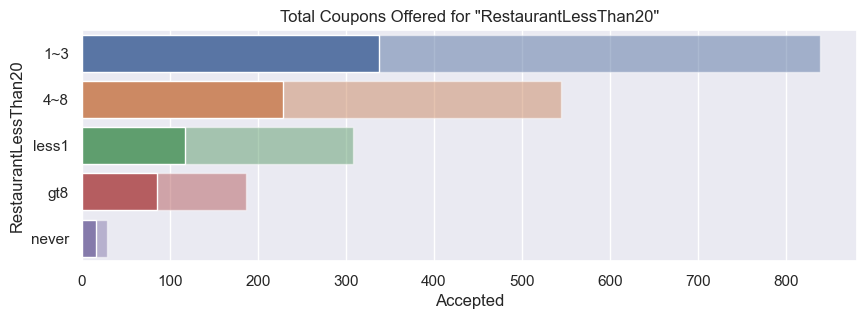


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20_COHORT  ────────────────────────────────────────/

|    | Values for "RestaurantLessThan20_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                                        |        314 |        417 |             731 |                    43 |
|  0 | <= 3                                       |        471 |        704 |            1175 |                    40 |


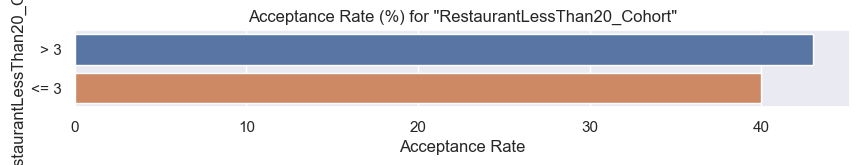

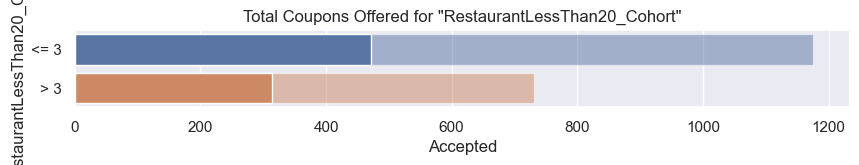


/────────────────────────────────────────  Feature: RESTAURANT20TO50  ────────────────────────────────────────/

|    | Values for "Restaurant20To50"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  1 | 4~8                             |         70 |         41 |             111 |                    63 |
|  2 | gt8                             |         22 |         13 |              35 |                    63 |
|  0 | 1~3                             |        224 |        288 |             512 |                    44 |
|  3 | less1                           |        366 |        583 |             949 |                    39 |
|  4 | never                           |        103 |        196 |             299 |                    34 |


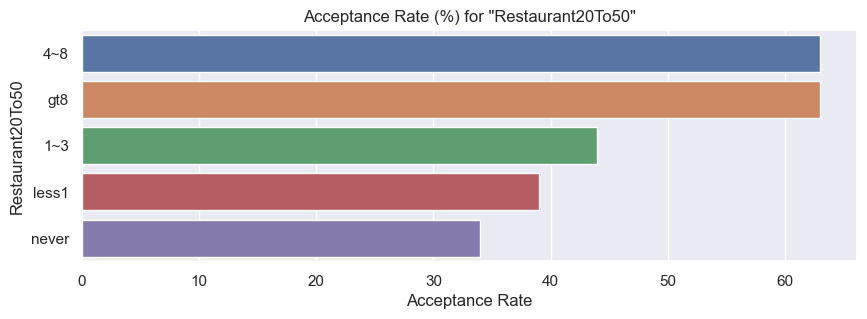

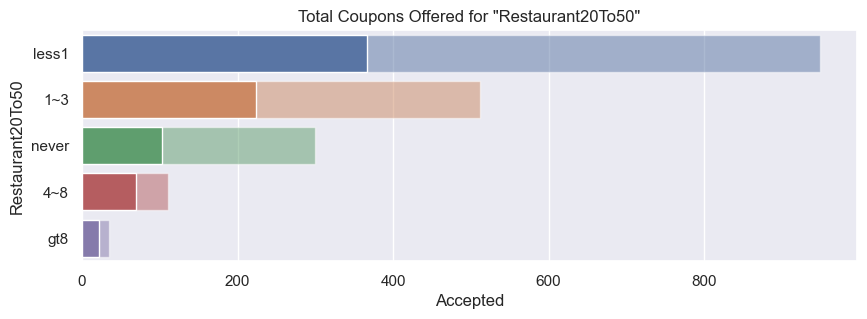


/────────────────────────────────────────  Feature: RESTAURANT20TO50_COHORT  ────────────────────────────────────────/

|    | Values for "Restaurant20To50_Cohort"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------------+------------+------------+-----------------+-----------------------|
|  1 | > 3                                    |         92 |         54 |             146 |                    63 |
|  0 | <= 3                                   |        693 |       1067 |            1760 |                    39 |


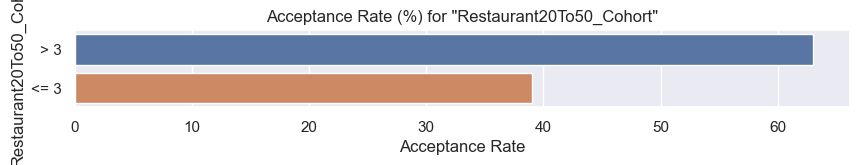

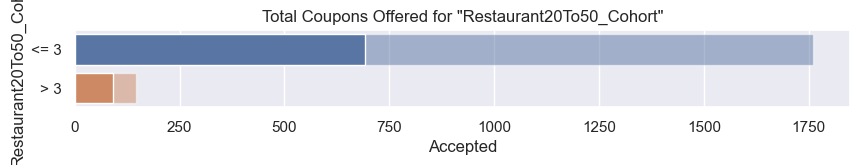


/────────────────────────────────────────  Feature: TOCOUPON_GEQ5MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ5min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                               1 |        785 |       1121 |            1906 |                    41 |


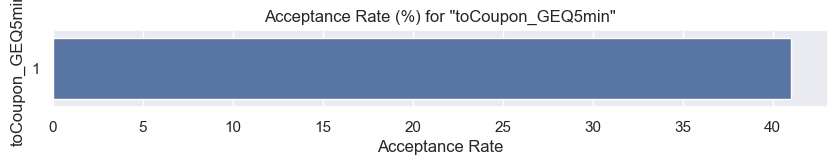

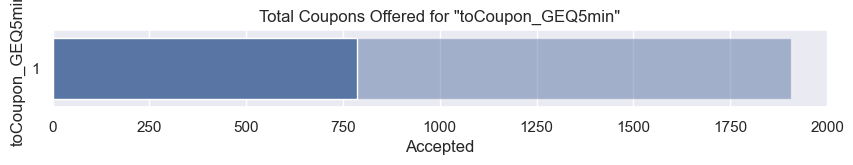


/────────────────────────────────────────  Feature: TOCOUPON_GEQ15MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ15min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                                0 |        282 |        362 |             644 |                    44 |
|  1 |                                1 |        503 |        759 |            1262 |                    40 |


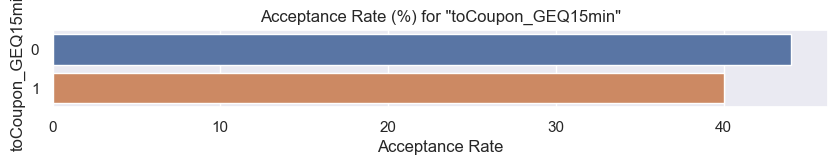

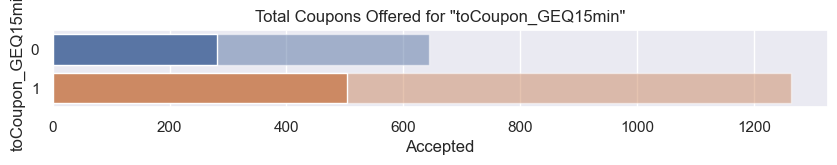


/────────────────────────────────────────  Feature: TOCOUPON_GEQ25MIN  ────────────────────────────────────────/

|    |   Values for "toCoupon_GEQ25min" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                                0 |        596 |        825 |            1421 |                    42 |
|  1 |                                1 |        189 |        296 |             485 |                    39 |


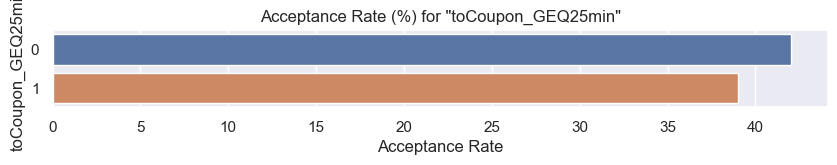

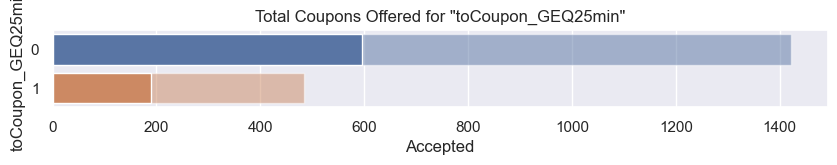


/────────────────────────────────────────  Feature: DIRECTION_SAME  ────────────────────────────────────────/

|    |   Values for "direction_same" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-------------------------------+------------+------------+-----------------+-----------------------|
|  1 |                             1 |        182 |        218 |             400 |                    46 |
|  0 |                             0 |        603 |        903 |            1506 |                    40 |


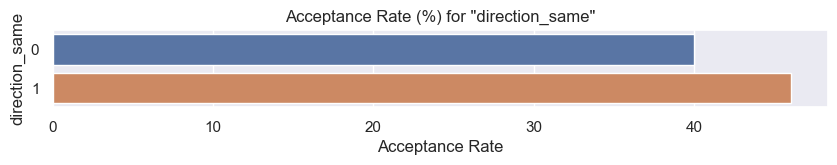

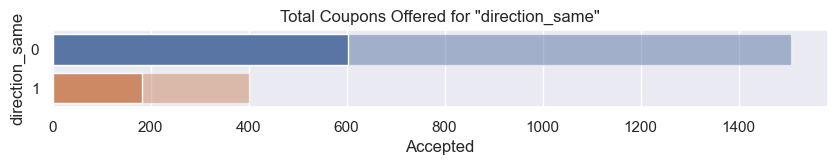


/────────────────────────────────────────  Feature: DIRECTION_OPP  ────────────────────────────────────────/

|    |   Values for "direction_opp" |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------+------------+------------+-----------------+-----------------------|
|  0 |                            0 |        182 |        218 |             400 |                    46 |
|  1 |                            1 |        603 |        903 |            1506 |                    40 |


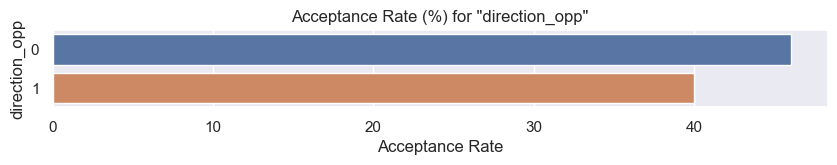

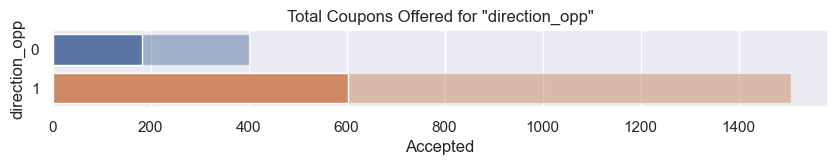


/────────────────────────────────────────  Feature: DISTANCEDIRECTION  ────────────────────────────────────────/

|    | Values for "distanceDirection"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+----------------------------------+------------+------------+-----------------+-----------------------|
|  3 | 5min ahead                       |        135 |        119 |             254 |                    53 |
|  1 | 15min behind                     |        267 |        364 |             631 |                    42 |
|  2 | 25min behind                     |        189 |        296 |             485 |                    39 |
|  4 | 5min behind                      |        147 |        243 |             390 |                    38 |
|  0 | 15min ahead                      |         47 |         99 |             146 |                    32 |


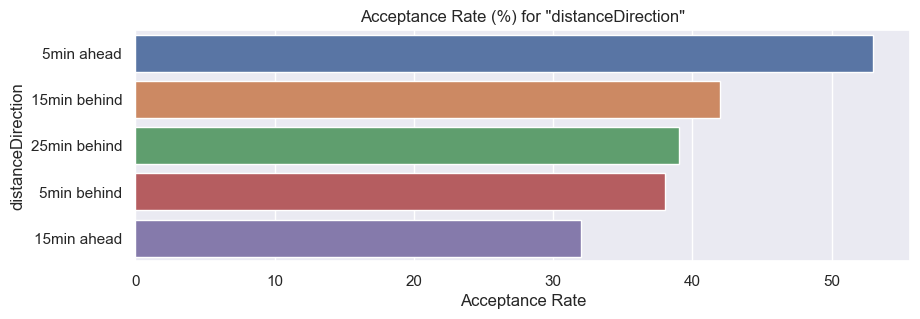

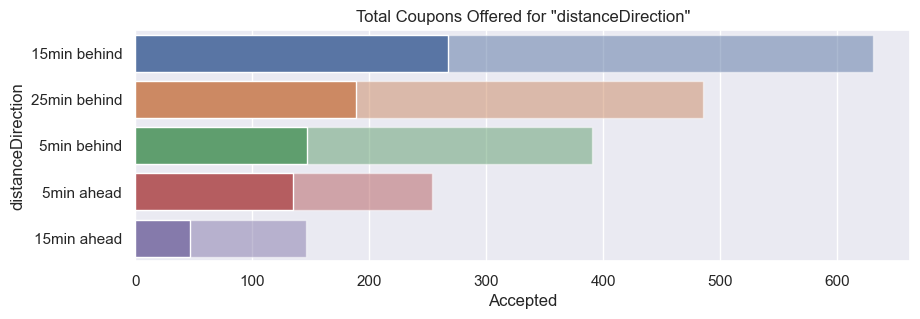


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIME  ────────────────────────────────────────/

|    | Values for "distanceDirectionTime"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+--------------------------------------+------------+------------+-----------------+-----------------------|
|  9 | 5min ahead 6PM                       |        135 |        119 |             254 |                    53 |
|  4 | 15min behind 10PM                    |        139 |        137 |             276 |                    50 |
|  5 | 15min behind 6PM                     |         71 |         89 |             160 |                    44 |
| 10 | 5min behind 10AM                     |         96 |        129 |             225 |                    43 |
|  0 | 15min ahead 10PM                     |         20 |         29 |              49 |                    41 |
|  8 | 25min behind 7AM                     |        141 |        210 |            

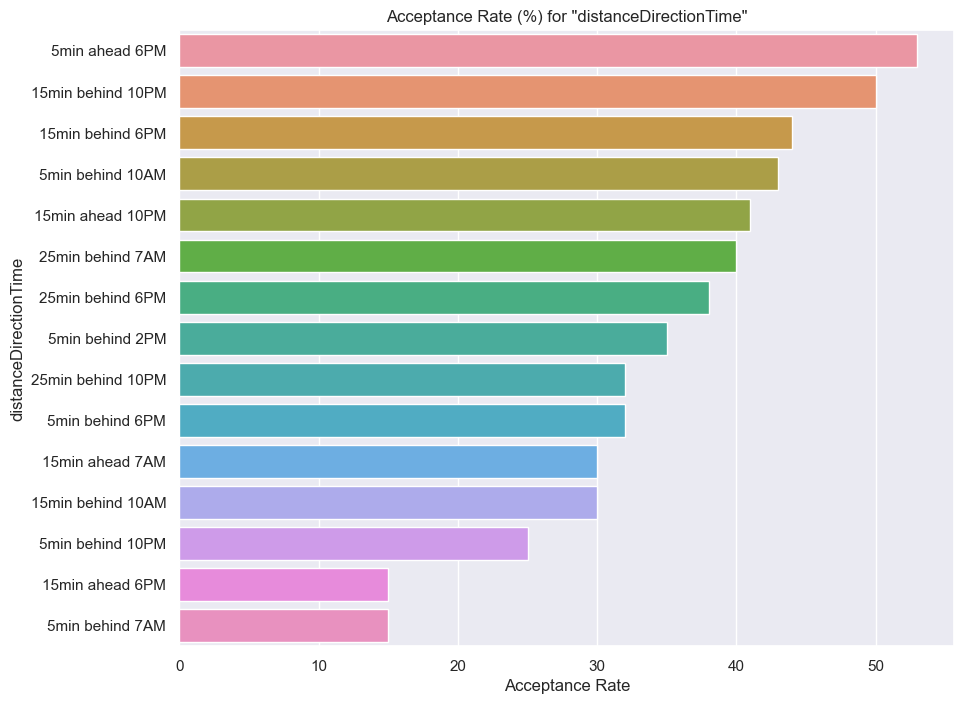

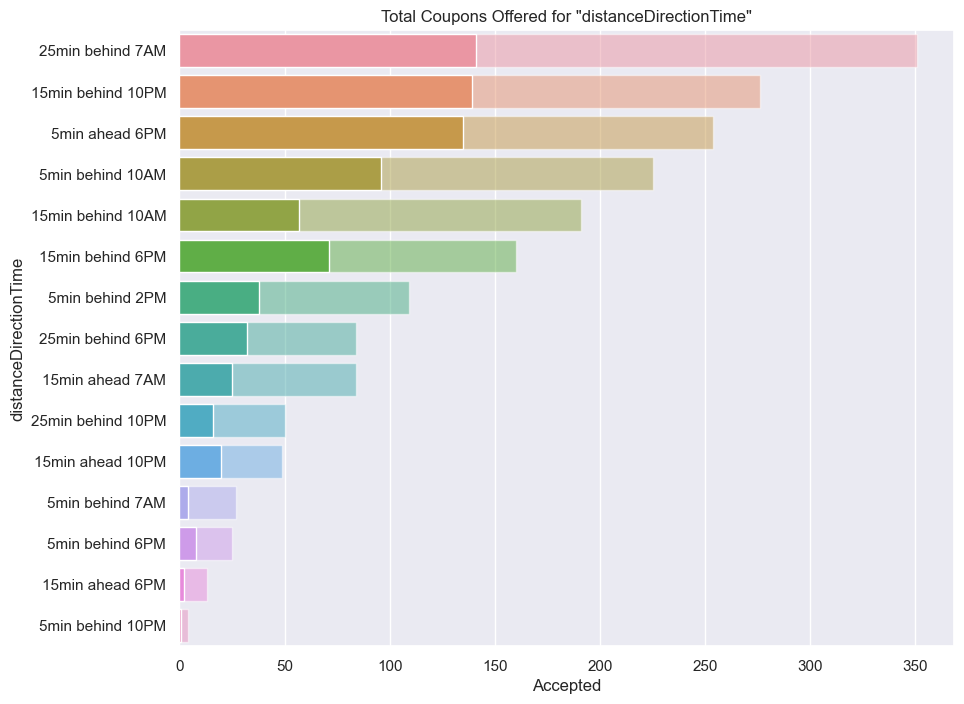


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEEXPIRATION  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimeExpiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+------------------------------------------------+------------+------------+-----------------+-----------------------|
| 13 | 5min ahead 6PM 1d                              |        110 |         63 |             173 |                    64 |
|  6 | 15min behind 10PM 2h                           |         87 |         74 |             161 |                    54 |
| 15 | 5min behind 10AM 1d                            |         90 |         97 |             187 |                    48 |
|  8 | 15min behind 6PM 2h                            |         42 |         50 |              92 |                    46 |
|  5 | 15min behind 10PM 1d                           |         52 |         63 |             115 |                    45 |
|  

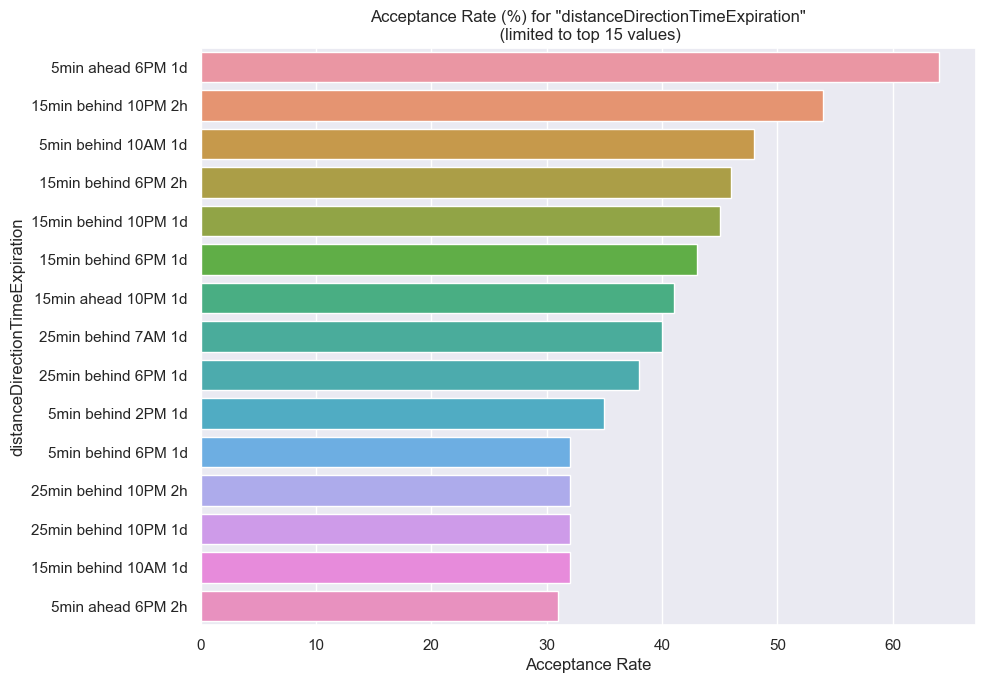

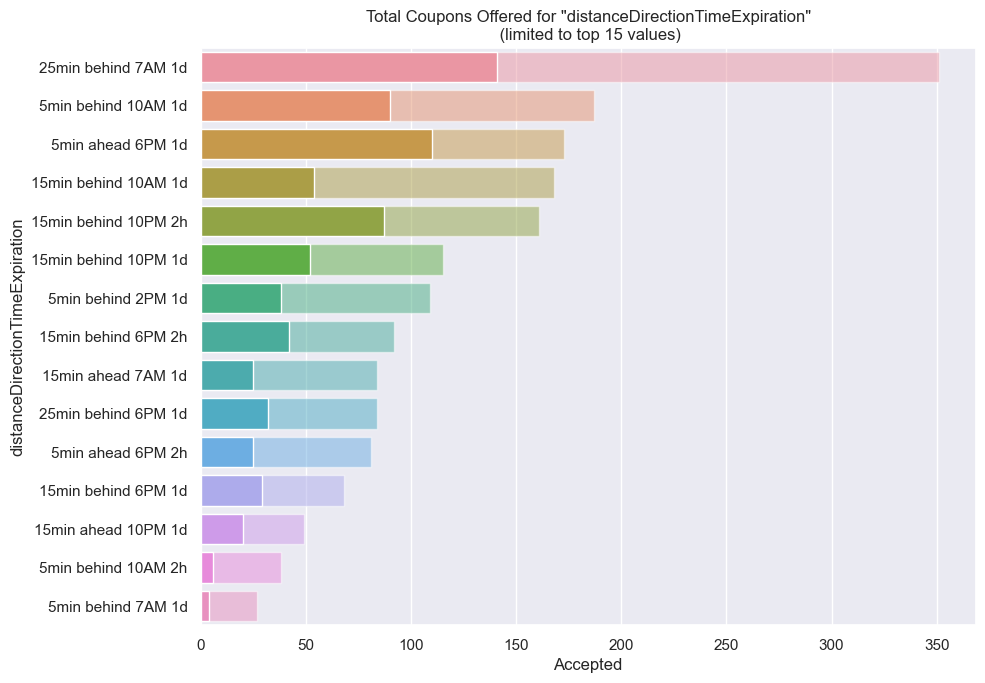


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGER  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimePassenger"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------------------------+------------+------------+-----------------+-----------------------|
| 15 | 5min behind 10AM Friend(s)                    |         44 |         31 |              75 |                    59 |
|  6 | 15min behind 10PM Friend(s)                   |        135 |        106 |             241 |                    56 |
| 13 | 5min ahead 6PM Alone                          |        135 |        119 |             254 |                    53 |
|  9 | 15min behind 6PM Partner                      |         55 |         52 |             107 |                    51 |
|  5 | 15min behind 10AM Partner                     |         12 |         16 |              28 |                    43 |
| 19 | 5min

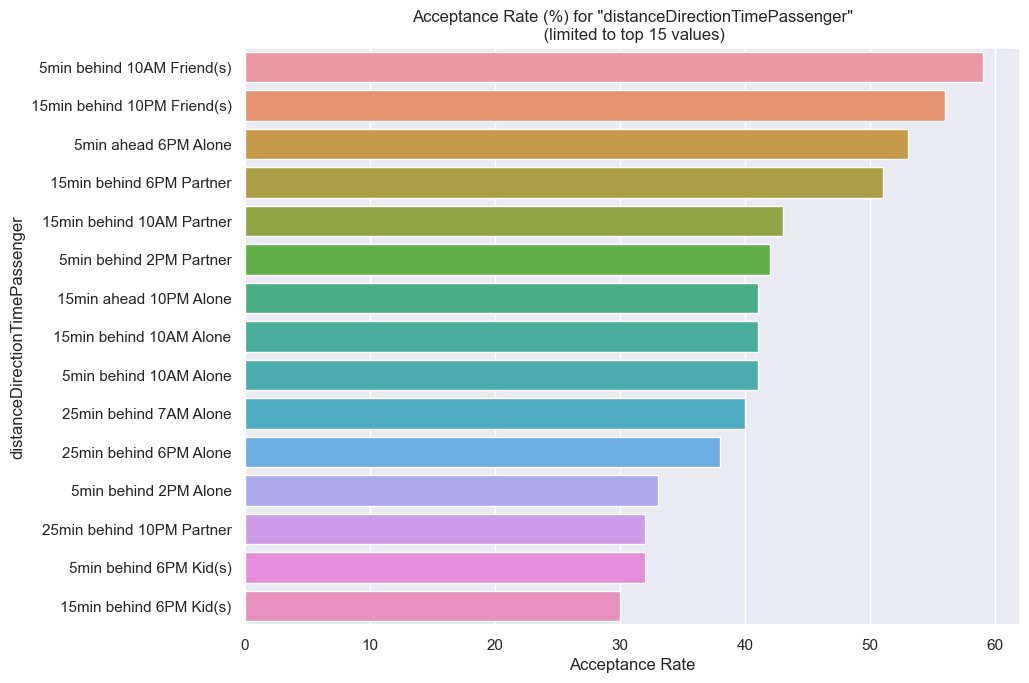

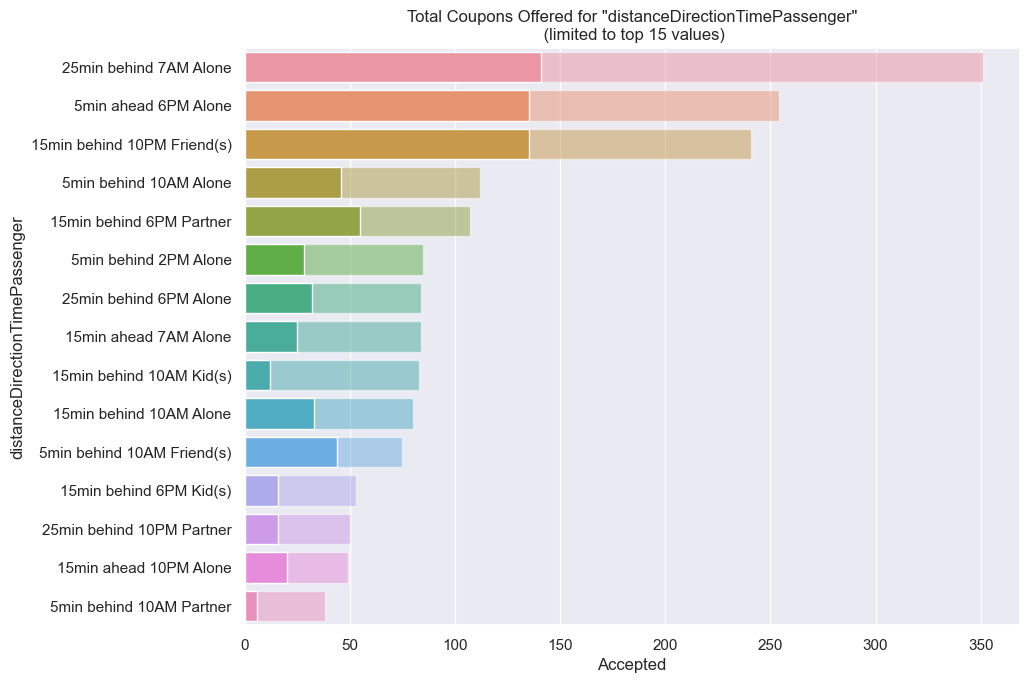


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGERCOUPON  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimePassengerCoupon"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+-----------------------------------------------------+------------+------------+-----------------+-----------------------|
| 15 | 5min behind 10AM Friend(s) Bar                      |         44 |         31 |              75 |                    59 |
|  6 | 15min behind 10PM Friend(s) Bar                     |        135 |        106 |             241 |                    56 |
| 13 | 5min ahead 6PM Alone Bar                            |        135 |        119 |             254 |                    53 |
|  9 | 15min behind 6PM Partner Bar                        |         55 |         52 |             107 |                    51 |
|  5 | 15min behind 10AM Partner Bar                       |         12 |         16 |      

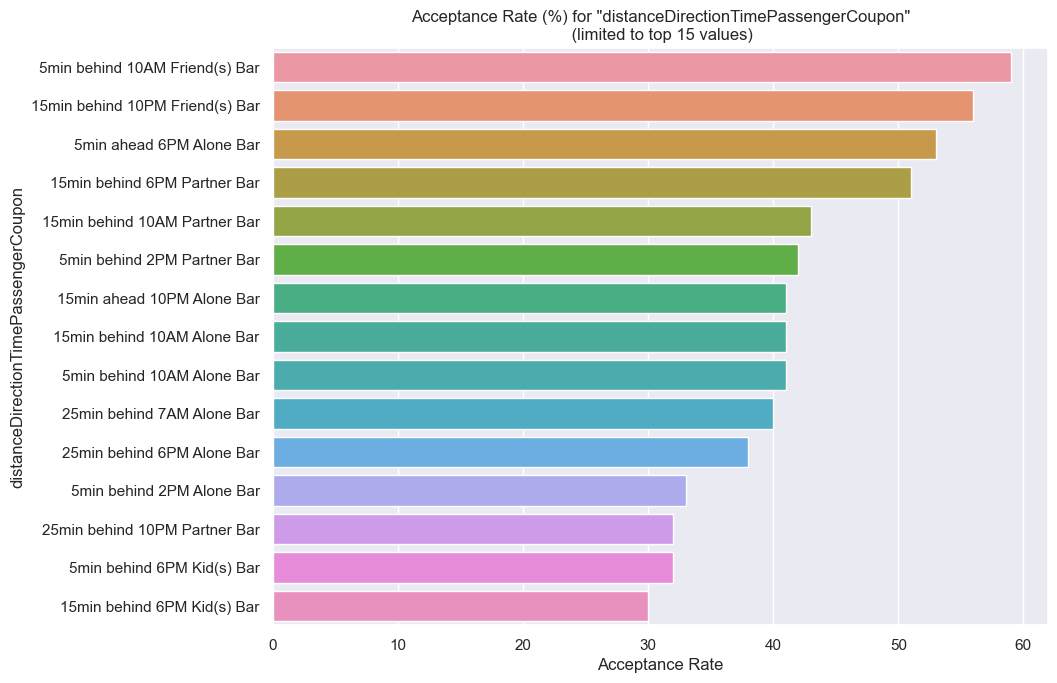

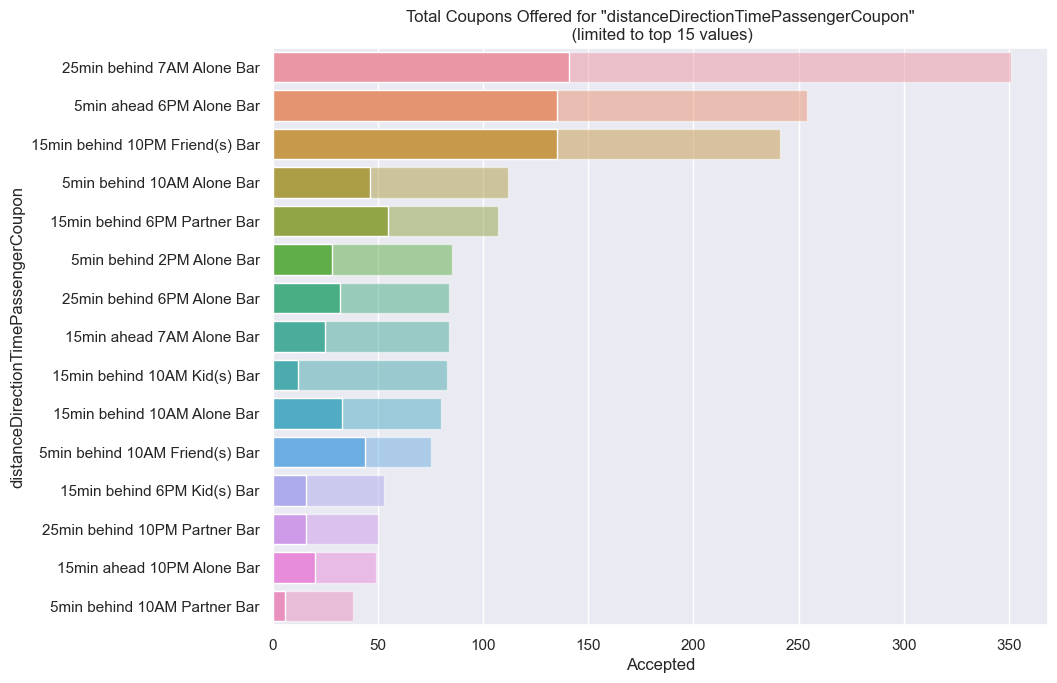


/────────────────────────────────────────  Feature: DISTANCEDIRECTIONTIMEPASSENGERCOUPONEXPIRATION  ────────────────────────────────────────/

|    | Values for "distanceDirectionTimePassengerCouponExpiration"   |   Accepted |   Rejected |   Total Offered |   Acceptance Rate (%) |
|----+---------------------------------------------------------------+------------+------------+-----------------+-----------------------|
| 12 | 15min behind 6PM Partner Bar 1d                               |         24 |         13 |              37 |                    65 |
| 18 | 5min ahead 6PM Alone Bar 1d                                   |        110 |         63 |             173 |                    64 |
|  7 | 15min behind 10PM Friend(s) Bar 1d                            |         48 |         32 |              80 |                    60 |
| 21 | 5min behind 10AM Friend(s) Bar 1d                             |         44 |         31 |              75 |                    59 |
|  8 | 15min behind 10

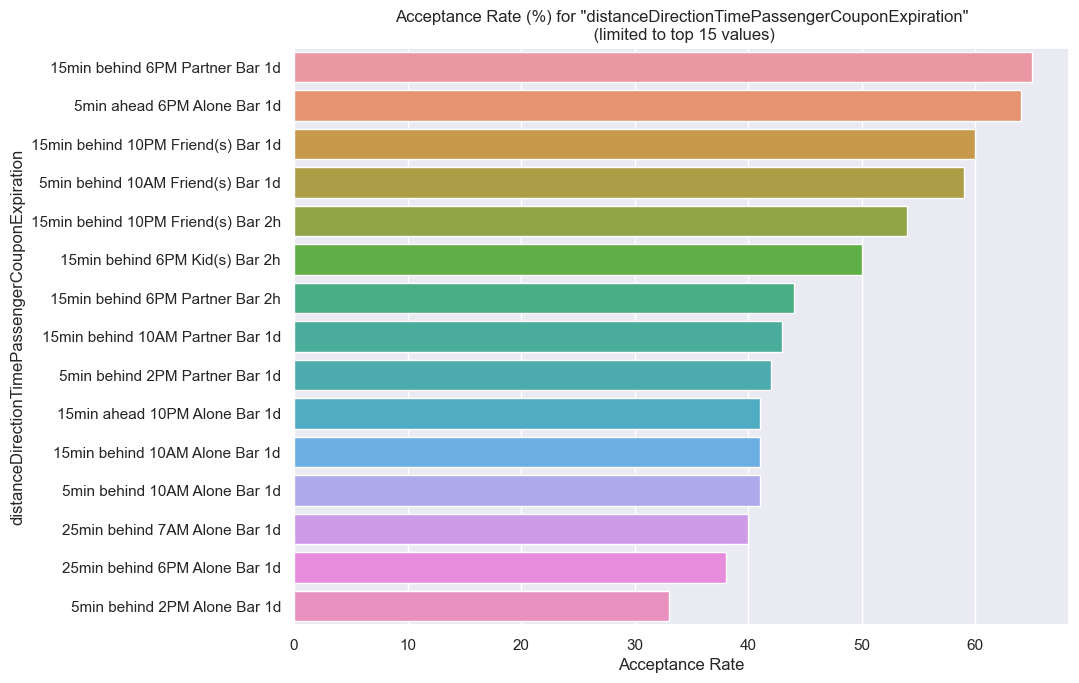

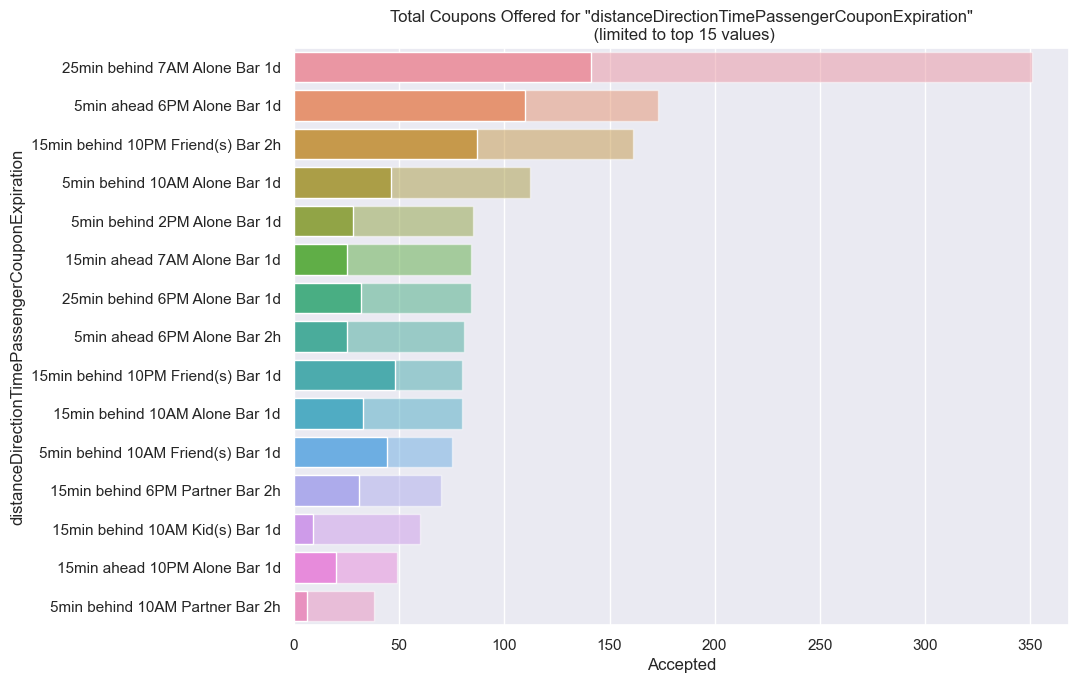

In [46]:
# Discovery -- Evaluate bivariate plots for coupon type "Restaurant<20"

# TODO - set up the following code snippet as a reusable function

for i in coupon_cheap_eats.columns:
    
    # Since we'll group by "Y", skip when we're evaluating "Y" as a feature column
    if i == "Y":
        continue
    
    # For each column:
    # 1. Visual separation between iterated columns/features
    print('\n/' + ('─' * 40) + f'  Feature: {i.upper()}  ' + ('─' * 40) + "/\n")

    # 2. create temporary dataframes subsetting accepted and rejected counts by unique feature value
    data_value_accept = pd.DataFrame(coupon_cheap_eats.query("Y == 1").groupby([i]).size()).reset_index()\
                .rename(columns={0:"Accepted"})
    data_value_reject = pd.DataFrame(coupon_cheap_eats.query("Y == 0").groupby([i]).size()).reset_index()\
                .rename(columns={0:"Rejected"})
    
    # 3. merge databases on feature value index
    data_values = pd.merge(data_value_accept, data_value_reject, on=i)
    
    # 4. create new columns for "total offered" (as a count) and "acceptance rate" (as a percentage)
    data_values["Total Offered"] = data_values["Accepted"] + data_values["Rejected"]
    data_values["Acceptance Rate"] = round(data_values["Accepted"] / ( data_values["Accepted"] + data_values["Rejected"]) * 100)
    
    # 5. sort values by `Acceptance Rate` to maintain visual reading consistency in each plot (descending)
    data_values.sort_values("Acceptance Rate", ascending=False, inplace=True)
    
    # 6. print the values and their occurrence counts for tabular reference
    print(tabulate(data_values, headers=[f'Values for "{i}"', 'Accepted', 'Rejected','Total Offered','Acceptance Rate (%)'], tablefmt="orgtbl"))
    
    # 7. reset the index such that the values are plottable
    data_values = data_values.reset_index()

    # 8. generate the plot for each feature value counts and acceptance rates
    #    limit to top 15 for larger cohorts
    value_limit = 15
    plot_width = np.ceil(len(data_values.index)/2)
    data_title_rate = 'Acceptance Rate (%) for "' + i + '"'
    data_title_count = 'Total Coupons Offered for "' + i + '"'
    
    # tune plot with and added disclaimer if we're limiting the set to top "value_limit" accepted values
    if (len(data_values.index) > value_limit):
        plot_width = value_limit / 2
        append_title = '\n (limited to top 15 values)'
        data_title_rate += append_title
        data_title_count += append_title
        
    # plot the acceptance rate
    plt.figure(figsize=(10,plot_width))
    sns.barplot(data=data_values[0:value_limit], y=i, x="Acceptance Rate", orient='h').set_title(data_title_rate)
    #plt.savefig(f'images/pa1-cheapeats-{i.lower()}-acceptance-rates.svg', format="svg")
    plt.show()

    # resort for `Total Offered`
    data_values.sort_values("Total Offered", ascending=False, inplace=True)

    # plot the total offered
    plt.figure(figsize=(10,plot_width))
    sns.barplot(data=data_values[0:value_limit], y=i, x="Total Offered", orient='h', alpha=0.5).set_title(data_title_count)
    sns.barplot(data=data_values[0:value_limit], y=i, x="Accepted", orient='h')
    #plt.savefig(f'images/pa1-cheapeats-{i.lower()}-counts.svg', format="svg")
    plt.show()
    
# Clean up: Release the plots from memory
plt.close()

---
> ##### Insights/Observations:
> Generally, less expensive restaurant coupons have a reasonably good acceptance rate.  Time of day and who's in the car with the driver does play a role in acceptance.  For instance, when with friends or partner, acceptance of these coupons at 6pm is very strong (aligning with dinner time for many). When driving with kids in the vehicle, mid afternoon and evening times show higher acceptance rates, aligning with after-school pickups and dinner time. Interestingly, when driving alone in the evening, coupon acceptence is very low, perhaps suggesting many survey recipients did not prefer to eat dinner alone.
---

---
> ##### Next Steps:
> * **Interpolating missing data:**
>   * Seek any additional data/correlations to interpolate values for `car`
>   * Can the missing data for visits (`CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20`, `Bar`) be interpolated some correlative means, as statistical interpolation would not be appropriate for the categorical values (converting category values to numerical representation would be incorrect, based on the implied ranges)
> * **Legislative/Regulation adherence:**
>   * Review any existing laws within each geographical region this coupon product would target a driver, e.g. [US' "Distracted Driving | Cellphone Use" laws](https://www.ncsl.org/transportation/distracted-driving-cellphone-use#:~:text=Hand%2Dheld%20cellphone%20use%20ban,hand%2Dheld%20cellphones%20while%20driving. "Source: ncsl.org"), indicating 29 states/regions prohibit the use of cell phones while driving
>   * Consider adjusting *geo-fencing* whitelist/blacklist to comply with any discovered restrictions, as we can infer it unlikely for a solo driver to *legally* act on a coupon notification while driving. Is there a means to know if the recipient is a non-driver, and therefore may more readily see the coupon offer in a timely manner?
> * **Ethnographic Influences on Coupon Targeting:** 
>   * While target regions for the survey was not indicated in the dataset provided, anonymized **ethnographic information or preferences by region** may be available through other datasets to explore how it may encourage greater coupon acceptance.  
>   * For example, a driver known to reside in an area with a high Muslim population (or potentially self-identifies as Muslim) would be inlikely to accept a coupon to a bar (alcohol consumption).
> * **Modeling and Evaluation:**
>   * Continue to review different cohorts for any new insights and recommendations to influence the model's algorithm.
> * **Product/Technology considerations:**
>   * The analysis suggests most coupons are being delivered to the customer's cell phone after they have passed the coupon's location, adding "going backwards" as a consideration in detouring from the intended travel.  Perhaps the technology and product "geo-fencing" trigger rulesets can be made more efficient to send more coupons "ahead of" the driver's current location (somewhat predictively).
--- 


In [47]:
print("No errors! Thank you for digesting this analysis")

No errors! Thank you for digesting this analysis
